In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob
import hashlib

pd.options.display.max_rows = 400
pd.options.display.max_colwidth = 4000

In [10]:
jsons = []

for filename in glob('/Users/remim/tmp/cdtn-2020/*.json'):
    print(filename)
    jsons.append(pd.read_json(filename))

#actions = pd.read_json("/Users/remim/dev/cdtn/cdtn-monolog/weeks_1-4_2020.json")
#actions = pd.read_json("/Users/remim/tmp/catherine-logs.json")
#actions = pd.read_json("/Users/remim/tmp/all-2020.json")

actions = pd.concat(jsons, ignore_index=True)


/Users/remim/tmp/cdtn-2020/2020-01-18.json
/Users/remim/tmp/cdtn-2020/2020-02-08.json
/Users/remim/tmp/cdtn-2020/2020-01-22.json
/Users/remim/tmp/cdtn-2020/2020-02-04.json
/Users/remim/tmp/cdtn-2020/2020-01-14.json
/Users/remim/tmp/cdtn-2020/2020-02-12.json
/Users/remim/tmp/cdtn-2020/2020-01-02.json
/Users/remim/tmp/cdtn-2020/2020-01-03.json
/Users/remim/tmp/cdtn-2020/2020-02-13.json
/Users/remim/tmp/cdtn-2020/2020-01-15.json
/Users/remim/tmp/cdtn-2020/2020-02-05.json
/Users/remim/tmp/cdtn-2020/2020-01-23.json
/Users/remim/tmp/cdtn-2020/2020-02-09.json
/Users/remim/tmp/cdtn-2020/2020-01-19.json
/Users/remim/tmp/cdtn-2020/2020-02-02.json
/Users/remim/tmp/cdtn-2020/2020-01-12.json
/Users/remim/tmp/cdtn-2020/2020-02-14.json
/Users/remim/tmp/cdtn-2020/2020-01-04.json
/Users/remim/tmp/cdtn-2020/2020-01-28.json
/Users/remim/tmp/cdtn-2020/2020-01-08.json
/Users/remim/tmp/cdtn-2020/2020-02-18.json
/Users/remim/tmp/cdtn-2020/2020-01-24.json
/Users/remim/tmp/cdtn-2020/2020-01-25.json
/Users/remi

/Users/remim/dev/cdtn/.python-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


In [ ]:
#actions = pd.read_json('/Users/remim/tmp/cdtn-2020/2020-01-28.json')
def hash_visit(s):
    return np.uint32(int(hashlib.sha256(s.encode('utf-8')).hexdigest(), 16) % 10**10)

In [12]:
# reset idVisit in order to ensure unicity
actions['concat'] = actions['idVisit'].astype(str) + actions["lastActionDateTime"].astype(str)
actions['idVisit'] = actions['concat'].apply(lambda x: hash_visit(x))

In [5]:
#actions = pd.read_json("/Users/remim/dev/cdtn/cdtn-monolog/2weeks.json")
actions.idVisit.unique().shape

(160998,)

In [57]:
actions.concat.unique().shape

(158899,)

In [58]:
actions.idVisit[:10]

0    4097225578
1    4097225578
2    4097225578
3    4097225578
4    4097225578
5    4097225578
6    4097225578
7    4097225578
8    4097225578
9    4097225578
Name: idVisit, dtype: int64

In [ ]:
#actions = pd.read_json("/Users/remim/tmp/logs-1912.json")
#actions = pd.read_json("/Users/remim/data/cdtn-logs/daily/2019-12-19-log.json")

# Check visits and action per date : assert no issues during collection

In [13]:
actions_dates = actions.drop_duplicates(subset=['idVisit'])['timestamp'].apply(lambda x : x.strftime("%d/%m/%y"))

In [14]:
# we retrieve the sorted dates
import datetime
dates = [datetime.datetime.strptime(ts, "%d/%m/%y") for ts in actions_dates.unique()]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%d/%m/%y") for ts in dates]

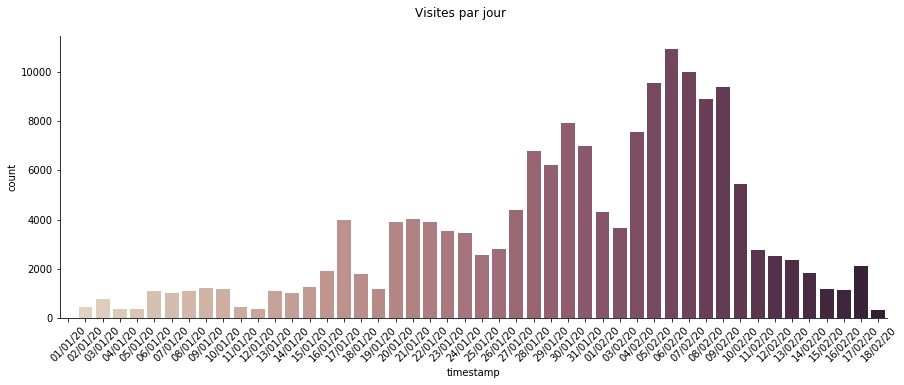

In [8]:
plot = sns.catplot(x="timestamp", kind="count", palette="ch:.25", aspect=25.7/10.27, data=pd.DataFrame(actions_dates), order=sorteddates);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Visites par jour")
#plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
#[sns.setp(ax.get_xticklabels(), rotation=45) for ax in plot.axes.flat]
for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

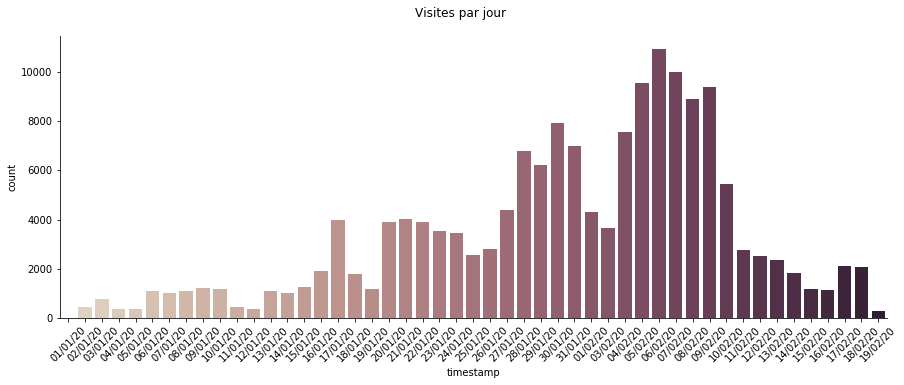

In [15]:
plot = sns.catplot(x="timestamp", kind="count", palette="ch:.25", aspect=25.7/10.27, data=pd.DataFrame(actions_dates), order=sorteddates);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Visites par jour")
#plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
#[sns.setp(ax.get_xticklabels(), rotation=45) for ax in plot.axes.flat]
for ax in plot.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

# Most popular contents

In [7]:
actions[actions.type == 'visit_content'][actions.url.apply(lambda x : x.startswith("https://code.travail.gouv.fr/"))]["url"]\
.apply(lambda x : x.split("gouv.fr/")[1])\
.value_counts()[:70]


/Users/remim/dev/cdtn/.python-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


outils/simulateur-embauche                                                                                                       13141
outils/preavis-demission                                                                                                         10570
outils/indemnite-licenciement                                                                                                     7416
?xtor=ES-29-[BIE_202_20200130]-20200130-[https://code.travail.                                                                    6858
fiche-ministere-travail/la-demission                                                                                              6562
droit-du-travail                                                                                                                  5466
modeles-de-courriers/demande-de-paiement-de-salaire                                                                               4304
fiche-service-public/arret-maladie-pendant-le-preavis-q

# Datafiller : generer variantes pour ajout aux suggestions

In [ ]:
# import json
# with open('request.datafiller-1712.json') as fd:
#      df_reqs_json = json.load(fd)

In [ ]:
# titles_col = []
# variant_col = []
# is_title = []
# to_keep = []

# for entry in df_reqs_json['data']:
#     title = entry['title']
    
#     # first we add the title
#     titles_col.append(title)
#     variant_col.append(title)
#     is_title.append(True)

#     # then we add the variants
#     variants = entry['variants'].split('\n') if 'variants' in entry else []
#     for variant in variants :
#         titles_col.append(title)
#         variant_col.append(variant)
#         is_title.append(False)

# to_keep = np.ones([len(titles_col)], dtype=bool)        
# weight = [5] * len(titles_col)
         
# df_reqs_df = pd.DataFrame({'Candidat':variant_col, 'Entrée':titles_col, 'Titre':is_title, 'Conserver':to_keep, 'Poids': weight})

In [ ]:
#df_reqs_df.to_excel("df_suggestion_qualification.xlsx")
#df_reqs_df.to_csv("df_suggestion_qualification-1712.csv")

# Rank and scoring

In [59]:
result_candidates_actions = actions[actions.type == "result_candidates"]
result_candidates_actions['documents'] = result_candidates_actions.result_candidates.apply(lambda x : x['documents'])

/Users/remim/dev/cdtn/.python-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [60]:
unique_search_visit = result_candidates_actions.idVisit.unique()

In [61]:
unique_search_visit.shape

(38878,)

In [ ]:
#one_visit = unique_search_visit[0]
#actions[actions.idVisit == 125978]

# here we could compare select_result and visit content in order to 
# add time spent (and categorize visits : short / medium / long ...)
actions[actions.type == "select_result"][:10]
actions[actions.type == "visit_content"][:10]

In [62]:
# for each visit containing candidates actions
# we want to associate candidates and select result

# check if selection in previous candidates
def in_candidates(select_action, candidates):
    selected_url = select_action.res_selection['url']
    candidate_urls = [c['slug'] for c in candidates['documents']]
    
    if selected_url in candidate_urls:
        return (True, candidate_urls.index(selected_url))
    else :
        # elif : here we can be in different cases :
        # query undefined : theme results
        # selection resultat code du travail ou theme
        return (False, -1)

def analyze_visit(id_visit) :
    visit = actions[actions.idVisit == id_visit]

    last_candidates = {}
    last_query = ''
    consumed = False
    
    logs = []

    for _, action in visit.iterrows():
        if action.type == 'result_candidates':
            if last_candidates != action.result_candidates and last_query != action.query:
                last_candidates = action.result_candidates
                last_query = action.query
                consumed = False

        if (action.type == 'select_result'):
            
            # case no current candidates and selection
            if not(last_candidates):
                print('Selection before candidates ' + str(id_visit))
                continue;
            
#             selection = action.res_selection['url']
#             split = selection.split("/");
#             transformed = split[1].replace('-', "_").replace("fiche", "fiches") + "/" + split[2];                        
    
            (found, index) = in_candidates(action, last_candidates)
    
            if not found:
                print('Selection not in candidates ' + str(id_visit))
                #print(action.res_selection)
                #print([c['slug'] for c in last_candidates['documents']])
                
            # we keep track of the fact that candidates were "consumed"
            if index >= 0:  
                consumed = True
                
            logs.append({
                'docs_res': last_candidates['documents'],
                'articles_res': last_candidates['articles'],
                'themes_res': last_candidates['themes'],
                'idVisit': id_visit,
                'rank': index,
                'selection': action.res_selection['url'],
                'query': last_query
            })
                                

    if not consumed :
        print("Not consumed " + str(id_visit))
        logs.append({
                    'docs_res': last_candidates['documents'],
                    'articles_res': last_candidates['articles'],
                    'themes_res': last_candidates['themes'],
                    'idVisit': id_visit,
                    'rank': -2,
                    'selection': np.NaN,
                    'query': last_query
                })
        
    return logs


In [63]:
logs = []
for i in unique_search_visit:
    print(i)
    logs += analyze_visit(i)

4097225578
Selection not in candidates 4097225578
Selection not in candidates 4097225578
Selection not in candidates 4097225578
Not consumed 4097225578
1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Selection not in candidates 1509606970
Not consumed 1509606970
1336981494
Selection not in candi

Not consumed 2804722829
3148371386
2923048405
Not consumed 2923048405
1518165034
Not consumed 1518165034
546547118
1947942605
Selection not in candidates 1947942605
870909136
1101396950
Not consumed 1101396950
255518634
71561933
Selection not in candidates 71561933
Selection not in candidates 71561933
Not consumed 71561933
533644862
1895901305
Selection not in candidates 1895901305
Selection not in candidates 1895901305
Selection not in candidates 1895901305
Selection not in candidates 1895901305
Not consumed 1895901305
2153196381
3976164926
209975367
Selection not in candidates 209975367
184534183
Selection before candidates 184534183
Selection not in candidates 184534183
Selection not in candidates 184534183
Selection not in candidates 184534183
Selection not in candidates 184534183
Selection not in candidates 184534183
Selection not in candidates 184534183
Selection not in candidates 184534183
Selection not in candidates 184534183
Selection not in candidates 184534183
Selection not 

Selection not in candidates 492815438
Selection not in candidates 492815438
Selection not in candidates 492815438
Not consumed 492815438
1190471661
1356603409
Selection not in candidates 1356603409
Selection not in candidates 1356603409
1644860840
785074552
Not consumed 785074552
2280225112
Not consumed 2280225112
1095823229
1390303641
86376564
533676999
3483758729
Selection not in candidates 3483758729
Not consumed 3483758729
4051578090
3036226518
Not consumed 3036226518
1377019912
Not consumed 1377019912
3938288488
Not consumed 3938288488
988877802
Selection not in candidates 988877802
Selection not in candidates 988877802
Selection not in candidates 988877802
1923649755
3152118850
3103527264
673973508
206038815
Selection not in candidates 206038815
3673317243
187770986
317209383
41303712
4079841365
1912258351
2080494623
4191659670
960260659
Not consumed 960260659
2206999737
Not consumed 2206999737
4118372373
695000997
2583158916
Selection before candidates 2583158916
Not consumed 25

Selection not in candidates 2232623826
Not consumed 2232623826
1468746170
4266227591
Not consumed 4266227591
906178082
3938110000
Selection before candidates 3938110000
Selection not in candidates 3938110000
Selection not in candidates 3938110000
Selection not in candidates 3938110000
3455919955
3444946602
Selection not in candidates 3444946602
1129016316
2415049255
Selection not in candidates 2415049255
Selection not in candidates 2415049255
Not consumed 2415049255
2746534695
Selection not in candidates 2746534695
Selection not in candidates 2746534695
Selection not in candidates 2746534695
Selection not in candidates 2746534695
2703387329
2398823935
2386471607
Selection not in candidates 2386471607
Selection not in candidates 2386471607
Selection not in candidates 2386471607
Not consumed 2386471607
459473675
Not consumed 459473675
1668276407
Selection not in candidates 1668276407
Selection not in candidates 1668276407
4149284427
Selection not in candidates 4149284427
2318569007
Not c

Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidates 3698711728
Selection not in candidat

Selection not in candidates 365399326
Not consumed 365399326
2729812008
Selection before candidates 2729812008
Selection before candidates 2729812008
Selection before candidates 2729812008
Selection before candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 2729812008
Selection not in candidates 272

3721200135
3309736826
1831262577
Selection before candidates 1831262577
Selection before candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
Selection not in candidates 1831262577
2901817870
Selection before candidates 2901817870
Selection before candidates 2901817870
Selection before candidates 2901817870
Selection before candidates 2901817870
Selection before candidates 2901817870
Selection not in candidates 2901817870
Selection not in candidates 2901817870
Selection not in candidates 2901817870
Selection not in candidates 2901817870
Selection not in candidates 2901817870
Selection not in candidates 2901817870
Selection not in candidates 2901817870
Selection not in can

Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
Selection not in candidates 2449997002
4178697688
Selection not in candidates 4178697688
Not consumed 4178697688
3070546591
Selection before candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in candidates 3070546591
Selection not in c

Selection not in candidates 1406663292
1960848682
Not consumed 1960848682
3442403817
Not consumed 3442403817
2657411925
Selection not in candidates 2657411925
Not consumed 2657411925
327741659
3464842204
Not consumed 3464842204
1045966319
Not consumed 1045966319
803552385
Selection before candidates 803552385
Not consumed 803552385
1835920250
Selection before candidates 1835920250
Selection before candidates 1835920250
Selection not in candidates 1835920250
Selection not in candidates 1835920250
Not consumed 1835920250
783737413
Not consumed 783737413
647817691
2623023074
1229336158
Selection before candidates 1229336158
Not consumed 1229336158
950884450
3964652056
3813583317
Not consumed 3813583317
730857694
Selection not in candidates 730857694
4070327461
2358500936
Selection before candidates 2358500936
1080428405
3820622549
Not consumed 3820622549
393400412
3211855560
Not consumed 3211855560
3342672036
Selection before candidates 3342672036
Selection before candidates 3342672036
18

Not consumed 2993105187
3967883803
761809511
Selection not in candidates 761809511
Not consumed 761809511
4098633033
Not consumed 4098633033
247283026
Selection not in candidates 247283026
Selection not in candidates 247283026
Selection not in candidates 247283026
27580467
Selection not in candidates 27580467
Not consumed 27580467
4288114303
Selection before candidates 4288114303
Selection not in candidates 4288114303
Not consumed 4288114303
174309543
Selection not in candidates 174309543
Selection not in candidates 174309543
Selection not in candidates 174309543
Not consumed 174309543
2136311493
Not consumed 2136311493
1068247631
Selection before candidates 1068247631
234727894
Selection before candidates 234727894
Not consumed 234727894
1277151481
Not consumed 1277151481
2999139918
Not consumed 2999139918
2993764287
Selection not in candidates 2993764287
Selection not in candidates 2993764287
Not consumed 2993764287
681966364
Selection not in candidates 681966364
Selection not in can

Selection not in candidates 3670953360
Selection not in candidates 3670953360
Not consumed 3670953360
1638942476
2713554533
Not consumed 2713554533
4103812873
3916326141
Not consumed 3916326141
3384167389
Not consumed 3384167389
979506886
Selection before candidates 979506886
Selection not in candidates 979506886
Selection not in candidates 979506886
Selection not in candidates 979506886
Selection not in candidates 979506886
74949554
Selection before candidates 74949554
Selection before candidates 74949554
Not consumed 74949554
3695508107
Not consumed 3695508107
2145717475
Not consumed 2145717475
1276708569
474982594
Selection before candidates 474982594
Not consumed 474982594
815616789
1778665789
Not consumed 1778665789
1235329630
Not consumed 1235329630
2823690462
2413376131
Not consumed 2413376131
1159046231
1256619443
626903321
Selection before candidates 626903321
Not consumed 626903321
1354892873
1936227596
Selection before candidates 1936227596
Selection before candidates 193622

Not consumed 2167650477
3506991039
Selection before candidates 3506991039
Selection not in candidates 3506991039
Not consumed 3506991039
1099363607
2887939790
2573271818
Not consumed 2573271818
1656893679
750410533
407512760
Not consumed 407512760
1408336313
Selection not in candidates 1408336313
Selection not in candidates 1408336313
Selection not in candidates 1408336313
Selection not in candidates 1408336313
Selection not in candidates 1408336313
Selection not in candidates 1408336313
Selection not in candidates 1408336313
Selection not in candidates 1408336313
Not consumed 1408336313
3428007098
Selection before candidates 3428007098
Selection before candidates 3428007098
3180226538
Not consumed 3180226538
3324303772
833671019
Selection not in candidates 833671019
Selection not in candidates 833671019
Selection not in candidates 833671019
Selection not in candidates 833671019
Selection not in candidates 833671019
Selection not in candidates 833671019
Selection not in candidates 8336

Selection not in candidates 4288537386
Selection not in candidates 4288537386
Not consumed 4288537386
2169302196
Not consumed 2169302196
1223390967
Selection before candidates 1223390967
Selection before candidates 1223390967
Selection not in candidates 1223390967
Selection not in candidates 1223390967
Selection not in candidates 1223390967
Selection not in candidates 1223390967
Selection not in candidates 1223390967
3713479772
Selection not in candidates 3713479772
Selection not in candidates 3713479772
Not consumed 3713479772
1129441736
Selection before candidates 1129441736
Not consumed 1129441736
3968684139
Selection not in candidates 3968684139
Selection not in candidates 3968684139
Selection not in candidates 3968684139
Selection not in candidates 3968684139
Selection not in candidates 3968684139
2960333847
590591134
776588267
Selection not in candidates 776588267
787944149
Selection not in candidates 787944149
Selection not in candidates 787944149
Selection not in candidates 787

Not consumed 772012407
150637950
3499497656
Selection not in candidates 3499497656
Not consumed 3499497656
3334908037
Selection not in candidates 3334908037
Selection not in candidates 3334908037
Selection not in candidates 3334908037
Selection not in candidates 3334908037
Not consumed 3334908037
1427239999
819401222
Selection before candidates 819401222
4057046950
612317283
Not consumed 612317283
997101598
Not consumed 997101598
1220826450
Not consumed 1220826450
3950668290
308755222
Selection not in candidates 308755222
3386365147
Selection before candidates 3386365147
Not consumed 3386365147
1396270403
3084947173
Not consumed 3084947173
2768198371
3301863857
976198167
Not consumed 976198167
4020272006
1486838693
2782600024
Not consumed 2782600024
4071460131
Selection not in candidates 4071460131
Selection not in candidates 4071460131
Selection not in candidates 4071460131
Selection not in candidates 4071460131
Selection not in candidates 4071460131
Selection not in candidates 407146

2344594529
Selection before candidates 2344594529
Selection before candidates 2344594529
Selection not in candidates 2344594529
Not consumed 2344594529
2391531518
1374887879
4053443033
Selection not in candidates 4053443033
Selection not in candidates 4053443033
Selection not in candidates 4053443033
Selection not in candidates 4053443033
Selection not in candidates 4053443033
3476795050
Selection not in candidates 3476795050
2267946431
Not consumed 2267946431
3635004857
3877164275
2298318679
Not consumed 2298318679
1299061798
221624712
332757721
3840021993
Selection not in candidates 3840021993
Selection not in candidates 3840021993
Selection not in candidates 3840021993
Selection not in candidates 3840021993
Selection not in candidates 3840021993
Selection not in candidates 3840021993
Selection not in candidates 3840021993
Selection not in candidates 3840021993
Selection not in candidates 3840021993
685739620
Not consumed 685739620
1390956817
Not consumed 1390956817
1413385547
250210

1249252296
Selection not in candidates 1249252296
Selection not in candidates 1249252296
Not consumed 1249252296
1979503995
Selection not in candidates 1979503995
Selection not in candidates 1979503995
Not consumed 1979503995
915835118
Selection before candidates 915835118
Selection before candidates 915835118
Selection not in candidates 915835118
Not consumed 915835118
2839477183
Selection not in candidates 2839477183
1103266874
Selection before candidates 1103266874
Selection not in candidates 1103266874
Not consumed 1103266874
1226693487
Selection before candidates 1226693487
Selection before candidates 1226693487
Selection not in candidates 1226693487
1842602092
3572191976
Selection not in candidates 3572191976
Selection not in candidates 3572191976
Selection not in candidates 3572191976
357988892
Selection before candidates 357988892
Selection not in candidates 357988892
2596585583
2702923639
Selection before candidates 2702923639
1989244631
Selection not in candidates 1989244631


Selection not in candidates 3301621137
Selection not in candidates 3301621137
Selection not in candidates 3301621137
Selection not in candidates 3301621137
Selection not in candidates 3301621137
Not consumed 3301621137
2668368029
Not consumed 2668368029
1880778033
Selection not in candidates 1880778033
Selection not in candidates 1880778033
Not consumed 1880778033
303779543
Not consumed 303779543
15824705
2637378453
Not consumed 2637378453
208596612
Selection not in candidates 208596612
Selection not in candidates 208596612
Selection not in candidates 208596612
Selection not in candidates 208596612
2140887292
Selection not in candidates 2140887292
Not consumed 2140887292
3442344343
Not consumed 3442344343
2430093007
3924642354
Not consumed 3924642354
292032181
Selection before candidates 292032181
Selection not in candidates 292032181
Selection not in candidates 292032181
Not consumed 292032181
1557062446
Selection not in candidates 1557062446
Selection not in candidates 1557062446
Sel

Not consumed 3797650073
3814784066
Selection before candidates 3814784066
Selection not in candidates 3814784066
Selection not in candidates 3814784066
Selection not in candidates 3814784066
Selection not in candidates 3814784066
Selection not in candidates 3814784066
Selection not in candidates 3814784066
Not consumed 3814784066
2022482611
Not consumed 2022482611
2389132076
Selection not in candidates 2389132076
Selection not in candidates 2389132076
Selection not in candidates 2389132076
Selection not in candidates 2389132076
Selection not in candidates 2389132076
Selection not in candidates 2389132076
Not consumed 2389132076
2827050164
Selection not in candidates 2827050164
Selection not in candidates 2827050164
Not consumed 2827050164
1288001724
Not consumed 1288001724
748715844
3982827502
Selection not in candidates 3982827502
821514609
Selection not in candidates 821514609
Selection not in candidates 821514609
Selection not in candidates 821514609
Not consumed 821514609
319654356

Not consumed 1286367346
3217692373
Selection not in candidates 3217692373
Selection not in candidates 3217692373
Selection not in candidates 3217692373
Not consumed 3217692373
1610685646
Selection before candidates 1610685646
Not consumed 1610685646
1747825063
Not consumed 1747825063
1056450647
Not consumed 1056450647
319983566
1502802229
Selection not in candidates 1502802229
Selection not in candidates 1502802229
Selection not in candidates 1502802229
Not consumed 1502802229
2277044178
166801664
Selection before candidates 166801664
Not consumed 166801664
805872571
Selection before candidates 805872571
Selection not in candidates 805872571
Not consumed 805872571
1793546347
2774527206
Selection not in candidates 2774527206
Selection not in candidates 2774527206
Not consumed 2774527206
796373752
Not consumed 796373752
1961313193
4167729852
Selection before candidates 4167729852
Not consumed 4167729852
385310883
Not consumed 385310883
2901900936
Selection not in candidates 2901900936
Se

Selection not in candidates 2150123708
Selection not in candidates 2150123708
Selection not in candidates 2150123708
Selection not in candidates 2150123708
Selection not in candidates 2150123708
Selection not in candidates 2150123708
Selection not in candidates 2150123708
Selection not in candidates 2150123708
Not consumed 2150123708
3732350202
Selection not in candidates 3732350202
Selection not in candidates 3732350202
Selection not in candidates 3732350202
Selection not in candidates 3732350202
3664052153
Selection not in candidates 3664052153
Selection not in candidates 3664052153
Selection not in candidates 3664052153
Selection not in candidates 3664052153
Selection not in candidates 3664052153
Selection not in candidates 3664052153
Selection not in candidates 3664052153
Selection not in candidates 3664052153
Selection not in candidates 3664052153
Not consumed 3664052153
2019089629
Selection not in candidates 2019089629
Selection not in candidates 2019089629
Not consumed 201908962

Selection not in candidates 1000012815
Not consumed 1000012815
2352765366
Selection not in candidates 2352765366
Selection not in candidates 2352765366
Selection not in candidates 2352765366
Selection not in candidates 2352765366
Selection not in candidates 2352765366
Selection not in candidates 2352765366
Selection not in candidates 2352765366
Not consumed 2352765366
1304455961
3501804918
Not consumed 3501804918
3973670330
Selection not in candidates 3973670330
Selection not in candidates 3973670330
Selection not in candidates 3973670330
Not consumed 3973670330
2535647341
Selection not in candidates 2535647341
Selection not in candidates 2535647341
Selection not in candidates 2535647341
Selection not in candidates 2535647341
Not consumed 2535647341
3651142147
Selection not in candidates 3651142147
Selection not in candidates 3651142147
Selection not in candidates 3651142147
Selection not in candidates 3651142147
168382535
Not consumed 168382535
3953589570
1022092572
Selection not in c

Selection not in candidates 1925917169
Selection not in candidates 1925917169
Not consumed 1925917169
931403525
3710108478
Selection not in candidates 3710108478
Selection not in candidates 3710108478
Not consumed 3710108478
2581491325
Not consumed 2581491325
3905948906
Selection before candidates 3905948906
2412608766
Selection not in candidates 2412608766
Selection not in candidates 2412608766
3017439719
Not consumed 3017439719
2494670437
4871917
Not consumed 4871917
501250038
Not consumed 501250038
2563780193
3380316662
766720960
Not consumed 766720960
1452164985
Selection not in candidates 1452164985
Selection not in candidates 1452164985
Selection not in candidates 1452164985
Selection not in candidates 1452164985
Not consumed 1452164985
204944437
1246533774
Selection not in candidates 1246533774
Selection not in candidates 1246533774
Not consumed 1246533774
1108118722
Not consumed 1108118722
3135422257
999248330
Not consumed 999248330
690455380
Not consumed 690455380
1394485792
S

Not consumed 4189511011
2295203403
Selection before candidates 2295203403
Selection not in candidates 2295203403
Not consumed 2295203403
3911329699
Selection before candidates 3911329699
Selection before candidates 3911329699
Selection before candidates 3911329699
661095468
3239392781
1961287520
Selection not in candidates 1961287520
Selection not in candidates 1961287520
Selection not in candidates 1961287520
Selection not in candidates 1961287520
Selection not in candidates 1961287520
Selection not in candidates 1961287520
Selection not in candidates 1961287520
Not consumed 1961287520
1995456877
Selection not in candidates 1995456877
Not consumed 1995456877
1312819153
48933469
Not consumed 48933469
3208908782
Selection not in candidates 3208908782
2531532649
Selection not in candidates 2531532649
Selection not in candidates 2531532649
534285760
Not consumed 534285760
2511778570
Selection before candidates 2511778570
Selection before candidates 2511778570
Selection not in candidates 2

Selection not in candidates 3540665931
Selection not in candidates 3540665931
Not consumed 3540665931
3549881780
Not consumed 3549881780
407275726
Selection not in candidates 407275726
4159806875
Not consumed 4159806875
3479851890
2859138393
Selection before candidates 2859138393
624285707
2431576905
64796949
Not consumed 64796949
962333021
Not consumed 962333021
1393041057
Not consumed 1393041057
3243879955
Not consumed 3243879955
3238025365
7120743
Not consumed 7120743
2428487140
Selection not in candidates 2428487140
Selection not in candidates 2428487140
Selection not in candidates 2428487140
Not consumed 2428487140
511849017
Selection before candidates 511849017
Selection before candidates 511849017
Selection before candidates 511849017
Not consumed 511849017
953514966
Not consumed 953514966
3320956442
4003664878
Selection not in candidates 4003664878
Selection not in candidates 4003664878
Not consumed 4003664878
3494772147
1845940116
Selection not in candidates 1845940116
Not con

Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Selection not in candidates 1933698275
Not consumed 1933698275
3537934774
Selection not in candidates 3537934774
128046371
Not consumed 128046371
3333569299
Selection before candidates 3333569299
2321501840
Selection before candidates 2321501840
Not consumed 2321501840
2644833331
539876941
Not consumed 539876941
903575913
2404167500
Selection before candidates 2404167500
Not consumed 2404167500
632598029
Selection not in candidates 632598029
1968132020
Not consumed 1968132020
2522856608
N

Not consumed 947801767
156685840
1205135226
Selection before candidates 1205135226
Not consumed 1205135226
2503990823
Selection before candidates 2503990823
Selection before candidates 2503990823
Selection before candidates 2503990823
Selection not in candidates 2503990823
Selection not in candidates 2503990823
284486271
Selection before candidates 284486271
Selection not in candidates 284486271
Selection not in candidates 284486271
Selection not in candidates 284486271
Selection not in candidates 284486271
Selection not in candidates 284486271
Selection not in candidates 284486271
Selection not in candidates 284486271
Not consumed 284486271
3687376055
923113485
3841481044
2272294496
3556196946
Selection before candidates 3556196946
Selection before candidates 3556196946
Selection before candidates 3556196946
Selection before candidates 3556196946
Selection before candidates 3556196946
Not consumed 3556196946
3512912695
Selection before candidates 3512912695
Selection before candidates

Selection before candidates 1190600102
Selection not in candidates 1190600102
Selection not in candidates 1190600102
1463246777
Not consumed 1463246777
1271644230
Selection before candidates 1271644230
Selection not in candidates 1271644230
4088319659
Not consumed 4088319659
3491908079
1096322288
Selection before candidates 1096322288
Selection not in candidates 1096322288
Selection not in candidates 1096322288
Not consumed 1096322288
745803968
14501794
Selection not in candidates 14501794
Not consumed 14501794
4121556440
Selection before candidates 4121556440
Selection before candidates 4121556440
Selection before candidates 4121556440
Selection not in candidates 4121556440
Not consumed 4121556440
2734313835
Selection not in candidates 2734313835
Not consumed 2734313835
2690589680
Not consumed 2690589680
3852234965
Not consumed 3852234965
1110016441
Not consumed 1110016441
871838549
Not consumed 871838549
2945059067
1244502753
Selection before candidates 1244502753
Selection not in ca

Selection not in candidates 1765049454
Selection not in candidates 1765049454
Selection not in candidates 1765049454
Selection not in candidates 1765049454
Selection not in candidates 1765049454
485722385
Selection not in candidates 485722385
Not consumed 485722385
1401867706
Not consumed 1401867706
2821301040
3615686138
3376264457
Not consumed 3376264457
2972129346
Selection before candidates 2972129346
Not consumed 2972129346
62497989
Not consumed 62497989
1223966376
Selection before candidates 1223966376
Selection before candidates 1223966376
Selection not in candidates 1223966376
3043306741
Not consumed 3043306741
52021628
4010843068
Selection before candidates 4010843068
Selection before candidates 4010843068
Selection not in candidates 4010843068
Selection not in candidates 4010843068
Not consumed 4010843068
1955521023
Not consumed 1955521023
236619865
2129277368
Not consumed 2129277368
82062385
1078776359
Not consumed 1078776359
3039855601
Selection not in candidates 3039855601


Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Selection not in candidates 3785183458
Not consumed 3785183458
4181393128
Selection not in candidates 4181393128
Selection not in candidates 4181393128
2709105051
Selection before candidates 2709105051
324777867
4001239769
Selection not in candidates 4001239769
Selection not in candidates 4001239769
Selection not in candidates 4001239769
Selection not in candidates 4001239769
Selection not in candidates 40012397

Not consumed 141452184
1618775863
Selection not in candidates 1618775863
Not consumed 1618775863
2134961061
Selection not in candidates 2134961061
Selection not in candidates 2134961061
3073756615
Selection not in candidates 3073756615
484029835
Selection before candidates 484029835
Selection not in candidates 484029835
Selection not in candidates 484029835
Selection not in candidates 484029835
4219294903
Not consumed 4219294903
2290792713
Selection before candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection not in candidates 2290792713
Selection 

Selection not in candidates 3792543415
Selection not in candidates 3792543415
Selection not in candidates 3792543415
61255929
Not consumed 61255929
4050308478
760595907
Not consumed 760595907
440603982
Selection before candidates 440603982
3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
Selection not in candidates 3647944497
647635538
972759545
Selection before candidates 972759545
3079998360
Selection not in candidates 3079998360
Not consumed 3079

Not consumed 907857201
4199967702
Selection before candidates 4199967702
3225430943
167379055
Selection not in candidates 167379055
Selection not in candidates 167379055
Selection not in candidates 167379055
Selection not in candidates 167379055
Selection not in candidates 167379055
Not consumed 167379055
167344172
Not consumed 167344172
2354242481
Selection before candidates 2354242481
Selection not in candidates 2354242481
Not consumed 2354242481
3274046675
Not consumed 3274046675
678681590
Selection before candidates 678681590
Not consumed 678681590
1931064584
Not consumed 1931064584
356954212
Not consumed 356954212
3101435059
Selection not in candidates 3101435059
Not consumed 3101435059
1935317891
Selection not in candidates 1935317891
Selection not in candidates 1935317891
Selection not in candidates 1935317891
Not consumed 1935317891
3119953837
Not consumed 3119953837
3834213985
2358288639
2745875351
Not consumed 2745875351
2378567854
Not consumed 2378567854
1620886413
Not consu

Selection before candidates 1986089895
Selection before candidates 1986089895
Selection not in candidates 1986089895
Not consumed 1986089895
4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Selection not in candidates 4168190354
Not consumed 4168190354
1369977164
647324714
1722559413
Not consumed 1722559413
4019975065
Selection before candidates 4019975065
Selection before candidates 4019975065
Selection not in candidates 4019975065
Selection not in candidates 4019975065
Selection not in candidates 4019975065
Selection not in candidates 4019975065
Selection not in candidates 4019975065
Selection not in candidates 4019975065
Selection not in

Selection not in candidates 2902893488
Selection not in candidates 2902893488
Selection not in candidates 2902893488
Selection not in candidates 2902893488
Selection not in candidates 2902893488
Not consumed 2902893488
1426302727
Selection not in candidates 1426302727
Selection not in candidates 1426302727
3589107178
2016961511
934972168
1765661170
Selection not in candidates 1765661170
Not consumed 1765661170
277269365
Not consumed 277269365
2066102915
Not consumed 2066102915
3770397997
Selection before candidates 3770397997
Selection not in candidates 3770397997
Selection not in candidates 3770397997
379968651
1434649330
Selection not in candidates 1434649330
1973630763
Selection not in candidates 1973630763
Not consumed 1973630763
4271193924
Selection not in candidates 4271193924
Selection not in candidates 4271193924
Not consumed 4271193924
477695846
Selection not in candidates 477695846
Selection not in candidates 477695846
Selection not in candidates 477695846
Selection not in ca

Selection not in candidates 115197816
Selection not in candidates 115197816
Selection not in candidates 115197816
Selection not in candidates 115197816
Selection not in candidates 115197816
Selection not in candidates 115197816
Not consumed 115197816
2941126211
Selection not in candidates 2941126211
Not consumed 2941126211
810854400
Not consumed 810854400
3376822826
Not consumed 3376822826
2819558479
Selection not in candidates 2819558479
4282103349
Selection before candidates 4282103349
Selection not in candidates 4282103349
Selection not in candidates 4282103349
Selection not in candidates 4282103349
Selection not in candidates 4282103349
Selection not in candidates 4282103349
Not consumed 4282103349
1977919072
Not consumed 1977919072
2896426724
Selection before candidates 2896426724
Selection before candidates 2896426724
Selection not in candidates 2896426724
Selection not in candidates 2896426724
Selection not in candidates 2896426724
Selection not in candidates 2896426724
29608772

Selection not in candidates 1214629306
Selection not in candidates 1214629306
Selection not in candidates 1214629306
Selection not in candidates 1214629306
Not consumed 1214629306
3231693543
Not consumed 3231693543
2436658431
Selection not in candidates 2436658431
Selection not in candidates 2436658431
Selection not in candidates 2436658431
2362692968
Selection not in candidates 2362692968
Selection not in candidates 2362692968
1127436782
Selection not in candidates 1127436782
Selection not in candidates 1127436782
Selection not in candidates 1127436782
Selection not in candidates 1127436782
Selection not in candidates 1127436782
Selection not in candidates 1127436782
Selection not in candidates 1127436782
1376435670
Selection not in candidates 1376435670
Selection not in candidates 1376435670
Not consumed 1376435670
634429357
Selection before candidates 634429357
Selection before candidates 634429357
Selection not in candidates 634429357
Selection not in candidates 634429357
Selection

604845715
1239200185
Not consumed 1239200185
161117378
Not consumed 161117378
107919542
Selection not in candidates 107919542
Not consumed 107919542
4217353710
Selection before candidates 4217353710
Not consumed 4217353710
1813547731
1028915352
Selection not in candidates 1028915352
Not consumed 1028915352
3670322917
Not consumed 3670322917
137675827
2329118717
Not consumed 2329118717
1861601595
Not consumed 1861601595
1979880223
Not consumed 1979880223
1191735009
Not consumed 1191735009
2333375479
Selection before candidates 2333375479
Selection before candidates 2333375479
Selection not in candidates 2333375479
Selection not in candidates 2333375479
Selection not in candidates 2333375479
Not consumed 2333375479
2025739385
Not consumed 2025739385
1875464140
Selection not in candidates 1875464140
Selection not in candidates 1875464140
Selection not in candidates 1875464140
Not consumed 1875464140
1033141515
Not consumed 1033141515
922924408
Selection not in candidates 922924408
Not con

1199955438
Selection not in candidates 1199955438
Selection not in candidates 1199955438
Selection not in candidates 1199955438
Selection not in candidates 1199955438
Not consumed 1199955438
421143459
Not consumed 421143459
1173195285
Not consumed 1173195285
415878800
Not consumed 415878800
978595078
Not consumed 978595078
3514451643
Not consumed 3514451643
2106844256
Not consumed 2106844256
167115998
Selection not in candidates 167115998
1836820011
2372708241
Selection before candidates 2372708241
Selection not in candidates 2372708241
3610614969
2485911952
490621378
Selection not in candidates 490621378
Not consumed 490621378
3883140203
Not consumed 3883140203
2150930240
Selection not in candidates 2150930240
103897338
Selection not in candidates 103897338
3517103566
2916315983
Not consumed 2916315983
1293634995
3084071750
Not consumed 3084071750
1098545449
Not consumed 1098545449
447919066
Not consumed 447919066
2301180312
Not consumed 2301180312
2748297373
Selection not in candidat

Selection before candidates 284966828
Selection not in candidates 284966828
Selection not in candidates 284966828
Not consumed 284966828
683830439
48659889
1999161634
Not consumed 1999161634
2029420340
Not consumed 2029420340
206674011
Not consumed 206674011
2925644878
Selection not in candidates 2925644878
Selection not in candidates 2925644878
Not consumed 2925644878
3267174437
Not consumed 3267174437
4239930018
Selection not in candidates 4239930018
Not consumed 4239930018
2479391274
3906960855
Not consumed 3906960855
2078630100
2829720895
Not consumed 2829720895
2372009420
Selection not in candidates 2372009420
102760319
Not consumed 102760319
778580210
Not consumed 778580210
1546317929
Not consumed 1546317929
2098324333
2458479932
424819936
Not consumed 424819936
1360556046
Selection before candidates 1360556046
Not consumed 1360556046
3168348911
Selection not in candidates 3168348911
Not consumed 3168348911
3727326378
Not consumed 3727326378
2467508474
Selection not in candidates

233724888
Selection before candidates 233724888
Selection not in candidates 233724888
Not consumed 233724888
1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
Selection not in candidates 1694864319
889984550
Selection not in candidates 889984550
Selection not in candidates 889984550
Selection not in candidates 889984550
Selection not in candidates 889984550
Selection not in candidates 889984550
Selection not in candidates 889984550
Selection not in candidates 889984550
Selection not in ca

1047628669
1270082152
Selection not in candidates 1270082152
Selection not in candidates 1270082152
Selection not in candidates 1270082152
1257813011
Not consumed 1257813011
3347996093
1103141382
2949270740
Selection not in candidates 2949270740
1382999142
Selection before candidates 1382999142
Selection not in candidates 1382999142
Selection not in candidates 1382999142
Not consumed 1382999142
363603255
Not consumed 363603255
2532499323
Not consumed 2532499323
2479776840
Not consumed 2479776840
1461244687
1674135684
Not consumed 1674135684
686440159
Selection not in candidates 686440159
Selection not in candidates 686440159
680927322
Selection before candidates 680927322
Not consumed 680927322
4250659424
Selection not in candidates 4250659424
Selection not in candidates 4250659424
Selection not in candidates 4250659424
Selection not in candidates 4250659424
Not consumed 4250659424
1656841093
Selection before candidates 1656841093
Selection not in candidates 1656841093
Not consumed 165

Selection not in candidates 2212787653
Selection not in candidates 2212787653
Selection not in candidates 2212787653
Selection not in candidates 2212787653
Not consumed 2212787653
899491919
1155835192
Selection before candidates 1155835192
Selection before candidates 1155835192
Selection not in candidates 1155835192
Not consumed 1155835192
3861898756
Selection before candidates 3861898756
Selection not in candidates 3861898756
Selection not in candidates 3861898756
3286925443
Not consumed 3286925443
3659016509
Selection before candidates 3659016509
3744478676
Selection not in candidates 3744478676
Not consumed 3744478676
2695687902
3007381020
2195899209
2606896291
Selection before candidates 2606896291
Selection before candidates 2606896291
Selection before candidates 2606896291
Not consumed 2606896291
3300131782
Selection not in candidates 3300131782
Not consumed 3300131782
3276359722
Selection not in candidates 3276359722
1291347096
389525592
Not consumed 389525592
1725084956
1050035

Selection not in candidates 2495007824
Selection not in candidates 2495007824
Not consumed 2495007824
456244034
808953619
3129439089
202723161
Not consumed 202723161
3897526647
Selection before candidates 3897526647
Selection before candidates 3897526647
Not consumed 3897526647
2371169358
Not consumed 2371169358
3935851056
Selection before candidates 3935851056
Selection not in candidates 3935851056
Selection not in candidates 3935851056
Selection not in candidates 3935851056
Selection not in candidates 3935851056
Selection not in candidates 3935851056
Selection not in candidates 3935851056
Selection not in candidates 3935851056
Not consumed 3935851056
3559937275
1151346426
Selection not in candidates 1151346426
Not consumed 1151346426
1535568850
3245654925
Selection before candidates 3245654925
Selection not in candidates 3245654925
534531414
Selection not in candidates 534531414
1115504753
765349316
Not consumed 765349316
3574378496
Selection before candidates 3574378496
124250214
Se

1928984426
Not consumed 1928984426
4151188478
Selection not in candidates 4151188478
Selection not in candidates 4151188478
Selection not in candidates 4151188478
Selection not in candidates 4151188478
Selection not in candidates 4151188478
1332308430
Selection before candidates 1332308430
Not consumed 1332308430
4028945412
Selection not in candidates 4028945412
4086192104
Not consumed 4086192104
991081224
Not consumed 991081224
3281895306
Not consumed 3281895306
4050455967
Selection before candidates 4050455967
Selection not in candidates 4050455967
Selection not in candidates 4050455967
Selection not in candidates 4050455967
Selection not in candidates 4050455967
Selection not in candidates 4050455967
Selection not in candidates 4050455967
2674601206
Selection not in candidates 2674601206
Selection not in candidates 2674601206
Selection not in candidates 2674601206
Selection not in candidates 2674601206
Selection not in candidates 2674601206
Selection not in candidates 2674601206
Sel

Not consumed 2884790849
439259713
3927339134
Not consumed 3927339134
923069342
Selection before candidates 923069342
Selection before candidates 923069342
Not consumed 923069342
4259838315
505587060
Not consumed 505587060
1204229930
2236944684
Selection before candidates 2236944684
Selection before candidates 2236944684
Selection before candidates 2236944684
Not consumed 2236944684
2565479438
Not consumed 2565479438
2276096798
Selection not in candidates 2276096798
Not consumed 2276096798
3961348153
Not consumed 3961348153
3210802283
Not consumed 3210802283
3825835432
Selection before candidates 3825835432
Selection before candidates 3825835432
Not consumed 3825835432
1561041975
Not consumed 1561041975
711023262
1218275238
Not consumed 1218275238
2842514577
Selection before candidates 2842514577
Selection not in candidates 2842514577
Selection not in candidates 2842514577
Selection not in candidates 2842514577
Selection not in candidates 2842514577
Not consumed 2842514577
3268186106
97

Selection not in candidates 3320807327
Selection not in candidates 3320807327
Selection not in candidates 3320807327
Selection not in candidates 3320807327
Selection not in candidates 3320807327
Not consumed 3320807327
2553229038
Selection not in candidates 2553229038
412279519
3289876560
Not consumed 3289876560
1040796610
1355189896
Not consumed 1355189896
3846032535
981694862
2420153359
Not consumed 2420153359
542875397
Not consumed 542875397
3151689952
Not consumed 3151689952
2403022481
1072808107
Selection not in candidates 1072808107
2062919869
801936101
Selection not in candidates 801936101
Selection not in candidates 801936101
Selection not in candidates 801936101
Selection not in candidates 801936101
Selection not in candidates 801936101
Not consumed 801936101
1697016542
Selection before candidates 1697016542
Selection not in candidates 1697016542
Selection not in candidates 1697016542
535215424
Not consumed 535215424
423338459
156856489
Selection not in candidates 156856489
28

1963808069
2312647557
40901013
Not consumed 40901013
172038793
Not consumed 172038793
2385990288
Not consumed 2385990288
812110895
1148619538
Selection before candidates 1148619538
Selection before candidates 1148619538
Not consumed 1148619538
2451070122
Selection not in candidates 2451070122
Not consumed 2451070122
1613541853
182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
Selection not in candidates 182202552
358282798
Selection not in candidates 358282798
Selection not in candidates 358282798
Selection not in candidates 358282798
Selection not in candidates 358282798
Selection not in candidates 358282798
Selection not in candidates 358282798
Not c

374197046
Not consumed 374197046
1976154166
Not consumed 1976154166
613569634
Not consumed 613569634
1758975137
4080795975
Not consumed 4080795975
3040586676
Selection not in candidates 3040586676
Not consumed 3040586676
1268946569
Not consumed 1268946569
1891985010
Not consumed 1891985010
1960463111
Not consumed 1960463111
3573869223
2004933735
Selection not in candidates 2004933735
Not consumed 2004933735
3310519740
2237593243
Selection not in candidates 2237593243
Selection not in candidates 2237593243
Selection not in candidates 2237593243
Not consumed 2237593243
499395869
2111277520
Not consumed 2111277520
3295396374
729292452
4116301257
Selection not in candidates 4116301257
631569682
Selection not in candidates 631569682
Selection not in candidates 631569682
Selection not in candidates 631569682
Selection not in candidates 631569682
Selection not in candidates 631569682
Selection not in candidates 631569682
Selection not in candidates 631569682
Selection not in candidates 631569

Not consumed 1203221201
3563441523
Not consumed 3563441523
3142754571
Not consumed 3142754571
2300964026
Selection not in candidates 2300964026
953010163
1159323408
Selection not in candidates 1159323408
Selection not in candidates 1159323408
Selection not in candidates 1159323408
Selection not in candidates 1159323408
Selection not in candidates 1159323408
Selection not in candidates 1159323408
Selection not in candidates 1159323408
Selection not in candidates 1159323408
Not consumed 1159323408
3180457906
Not consumed 3180457906
901766559
3928463487
2567612668
Selection not in candidates 2567612668
Selection not in candidates 2567612668
Not consumed 2567612668
3093385266
Selection not in candidates 3093385266
Not consumed 3093385266
2139271013
20576939
Not consumed 20576939
1123294330
Not consumed 1123294330
4163258314
Not consumed 4163258314
3610020497
Selection not in candidates 3610020497
Selection not in candidates 3610020497
Not consumed 3610020497
3113005343
Selection not in can

Selection not in candidates 629756110
Selection not in candidates 629756110
Not consumed 629756110
1374984216
Not consumed 1374984216
3745559225
Selection not in candidates 3745559225
Selection not in candidates 3745559225
Not consumed 3745559225
150557176
Selection not in candidates 150557176
Selection not in candidates 150557176
Selection not in candidates 150557176
Selection not in candidates 150557176
Not consumed 150557176
2489543558
Selection before candidates 2489543558
Selection before candidates 2489543558
Selection before candidates 2489543558
Selection before candidates 2489543558
Selection before candidates 2489543558
Selection before candidates 2489543558
Selection before candidates 2489543558
Selection not in candidates 2489543558
Selection not in candidates 2489543558
Not consumed 2489543558
3236746872
3587649272
1984276563
Selection before candidates 1984276563
Selection before candidates 1984276563
Selection not in candidates 1984276563
Not consumed 1984276563
21676934

Selection not in candidates 952163894
Not consumed 952163894
262131398
3602289002
Selection before candidates 3602289002
Selection before candidates 3602289002
Selection before candidates 3602289002
Selection before candidates 3602289002
Not consumed 3602289002
3998872544
Not consumed 3998872544
355656400
Selection not in candidates 355656400
Selection not in candidates 355656400
Not consumed 355656400
721147366
2511449868
3590006198
Selection before candidates 3590006198
Selection before candidates 3590006198
3568024335
777252694
2850850712
819417357
Not consumed 819417357
2764533847
530238692
788578933
Not consumed 788578933
1160244120
Not consumed 1160244120
1075439021
Not consumed 1075439021
1178653369
Selection before candidates 1178653369
Selection not in candidates 1178653369
Not consumed 1178653369
2269220340
Selection not in candidates 2269220340
Selection not in candidates 2269220340
Selection not in candidates 2269220340
Selection not in candidates 2269220340
Not consumed 22

Selection not in candidates 377557498
Selection not in candidates 377557498
Not consumed 377557498
1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Selection not in candidates 1534551087
Not consumed 1534551087
4189824931
Selection not in candidates 4189824931
Selection not in candidates 41898249

Not consumed 1533018126
221056989
Selection not in candidates 221056989
Selection not in candidates 221056989
Not consumed 221056989
3394088326
Selection not in candidates 3394088326
Selection not in candidates 3394088326
Selection not in candidates 3394088326
Selection not in candidates 3394088326
Selection not in candidates 3394088326
Selection not in candidates 3394088326
Selection not in candidates 3394088326
Not consumed 3394088326
2983910849
1647767492
Selection before candidates 1647767492
Not consumed 1647767492
1271909096
Not consumed 1271909096
1220340767
Selection before candidates 1220340767
Selection not in candidates 1220340767
2659198203
Selection not in candidates 2659198203
Selection not in candidates 2659198203
Not consumed 2659198203
624866102
Not consumed 624866102
116345246
397907001
Selection before candidates 397907001
Selection not in candidates 397907001
Selection not in candidates 397907001
Selection not in candidates 397907001
Selection not in candidates 3979

2393729435
Selection not in candidates 2393729435
Selection not in candidates 2393729435
1891490367
1747975613
Selection not in candidates 1747975613
Not consumed 1747975613
3732958635
Selection not in candidates 3732958635
Not consumed 3732958635
2797381565
Selection before candidates 2797381565
Selection not in candidates 2797381565
Selection not in candidates 2797381565
Selection not in candidates 2797381565
Selection not in candidates 2797381565
Selection not in candidates 2797381565
Selection not in candidates 2797381565
Selection not in candidates 2797381565
Not consumed 2797381565
2850460957
Selection not in candidates 2850460957
Selection not in candidates 2850460957
Not consumed 2850460957
1247198937
Not consumed 1247198937
3684259553
Selection not in candidates 3684259553
Not consumed 3684259553
877545806
3197551544
945608045
Selection not in candidates 945608045
Selection not in candidates 945608045
Not consumed 945608045
401069112
1720949350
Not consumed 1720949350
40844534

Not consumed 2016281040
2193620770
4254198283
Selection not in candidates 4254198283
Selection not in candidates 4254198283
2597852687
1318090014
656295634
3291572993
Selection before candidates 3291572993
Not consumed 3291572993
184029261
Not consumed 184029261
1161105076
Selection not in candidates 1161105076
Selection not in candidates 1161105076
2936447159
3994279118
Not consumed 3994279118
182273008
Selection not in candidates 182273008
Not consumed 182273008
1082716166
154030352
2031838140
Not consumed 2031838140
2047996935
Not consumed 2047996935
1425566000
462264798
Not consumed 462264798
3587539467
Selection not in candidates 3587539467
Selection not in candidates 3587539467
Not consumed 3587539467
3804848721
Not consumed 3804848721
4110090592
Not consumed 4110090592
144369815
3578237731
2623440014
Selection not in candidates 2623440014
Not consumed 2623440014
2898739131
2484175131
4072432965
Not consumed 4072432965
4008721831
Selection before candidates 4008721831
Selection b

Selection not in candidates 696293882
Not consumed 696293882
4119045976
Selection not in candidates 4119045976
Selection not in candidates 4119045976
Not consumed 4119045976
4061060397
Selection before candidates 4061060397
Not consumed 4061060397
1208047518
1613917661
Not consumed 1613917661
2090584494
Not consumed 2090584494
676717907
Not consumed 676717907
2116886414
Selection not in candidates 2116886414
Selection not in candidates 2116886414
Selection not in candidates 2116886414
Selection not in candidates 2116886414
Selection not in candidates 2116886414
Selection not in candidates 2116886414
Selection not in candidates 2116886414
Selection not in candidates 2116886414
Not consumed 2116886414
371664317
Not consumed 371664317
857029475
Selection not in candidates 857029475
Not consumed 857029475
860638601
Selection before candidates 860638601
Selection not in candidates 860638601
Selection not in candidates 860638601
Selection not in candidates 860638601
Selection not in candidat

Selection not in candidates 2968860621
Selection not in candidates 2968860621
Selection not in candidates 2968860621
Selection not in candidates 2968860621
Selection not in candidates 2968860621
Selection not in candidates 2968860621
Selection not in candidates 2968860621
Not consumed 2968860621
3220326098
Selection not in candidates 3220326098
Selection not in candidates 3220326098
Selection not in candidates 3220326098
Selection not in candidates 3220326098
Not consumed 3220326098
1257828081
558015089
Selection not in candidates 558015089
Selection not in candidates 558015089
Selection not in candidates 558015089
Selection not in candidates 558015089
Selection not in candidates 558015089
Selection not in candidates 558015089
Selection not in candidates 558015089
3411725813
Not consumed 3411725813
2301874
Selection not in candidates 2301874
Selection not in candidates 2301874
Selection not in candidates 2301874
Selection not in candidates 2301874
Not consumed 2301874
897020176
4066195

Selection not in candidates 3387518062
Not consumed 3387518062
4177475891
2060549426
Selection not in candidates 2060549426
3509468910
211918330
Not consumed 211918330
2769988600
Not consumed 2769988600
679122716
1115469920
Selection not in candidates 1115469920
3877516376
3365849026
Not consumed 3365849026
2308345902
2434690342
Not consumed 2434690342
3544843787
Not consumed 3544843787
3459584388
Not consumed 3459584388
512277552
3902161803
Selection before candidates 3902161803
521405258
3088513073
608936732
Selection not in candidates 608936732
Selection not in candidates 608936732
Selection not in candidates 608936732
Selection not in candidates 608936732
2167413212
Selection not in candidates 2167413212
Selection not in candidates 2167413212
Selection not in candidates 2167413212
Selection not in candidates 2167413212
Selection not in candidates 2167413212
Selection not in candidates 2167413212
Selection not in candidates 2167413212
Selection not in candidates 2167413212
Selection

Not consumed 770637289
2623908420
Selection not in candidates 2623908420
Selection not in candidates 2623908420
Selection not in candidates 2623908420
Selection not in candidates 2623908420
Selection not in candidates 2623908420
Selection not in candidates 2623908420
Not consumed 2623908420
1063430019
Selection not in candidates 1063430019
Selection not in candidates 1063430019
Not consumed 1063430019
764056127
Selection not in candidates 764056127
Not consumed 764056127
1948276852
Selection not in candidates 1948276852
Selection not in candidates 1948276852
Not consumed 1948276852
174365593
Selection not in candidates 174365593
Not consumed 174365593
2839827172
Selection not in candidates 2839827172
Selection not in candidates 2839827172
Selection not in candidates 2839827172
Selection not in candidates 2839827172
Selection not in candidates 2839827172
Selection not in candidates 2839827172
Selection not in candidates 2839827172
Selection not in candidates 2839827172
Selection not in 

245185158
Selection not in candidates 245185158
Selection not in candidates 245185158
Selection not in candidates 245185158
Selection not in candidates 245185158
Selection not in candidates 245185158
Not consumed 245185158
737372404
Selection not in candidates 737372404
Selection not in candidates 737372404
Selection not in candidates 737372404
Selection not in candidates 737372404
Not consumed 737372404
1339647125
Selection not in candidates 1339647125
Selection not in candidates 1339647125
541415720
Not consumed 541415720
3577385131
Selection before candidates 3577385131
Not consumed 3577385131
811469129
3831717499
Not consumed 3831717499
3742531266
1404012418
2918090868
Selection not in candidates 2918090868
Not consumed 2918090868
3874019790
1378557682
Selection not in candidates 1378557682
Selection not in candidates 1378557682
Not consumed 1378557682
3959718892
Selection not in candidates 3959718892
Selection not in candidates 3959718892
Selection not in candidates 3959718892
Not

Not consumed 3809723645
516472059
Not consumed 516472059
3545154633
Selection not in candidates 3545154633
2417895979
Not consumed 2417895979
835587455
Selection not in candidates 835587455
Not consumed 835587455
3834238930
Selection not in candidates 3834238930
Not consumed 3834238930
1019589662
Not consumed 1019589662
3636938585
2680632954
Selection before candidates 2680632954
Not consumed 2680632954
2738853994
Selection not in candidates 2738853994
Selection not in candidates 2738853994
1899521625
Selection not in candidates 1899521625
Not consumed 1899521625
3224656950
Selection not in candidates 3224656950
Selection not in candidates 3224656950
2445426077
Not consumed 2445426077
1007118309
Not consumed 1007118309
413852820
Selection not in candidates 413852820
Not consumed 413852820
642536003
254279066
Selection not in candidates 254279066
Selection not in candidates 254279066
Selection not in candidates 254279066
Selection not in candidates 254279066
Selection not in candidates 

Not consumed 243975787
169467873
Not consumed 169467873
4046105847
Selection not in candidates 4046105847
Selection not in candidates 4046105847
Not consumed 4046105847
444675635
Not consumed 444675635
3104399536
4023868829
Not consumed 4023868829
119750503
Selection not in candidates 119750503
1218852115
Selection not in candidates 1218852115
Not consumed 1218852115
556359539
Not consumed 556359539
2774260542
Not consumed 2774260542
2614325993
Not consumed 2614325993
3170823690
Selection before candidates 3170823690
Selection not in candidates 3170823690
Selection not in candidates 3170823690
Selection not in candidates 3170823690
Selection not in candidates 3170823690
1778275374
Not consumed 1778275374
4181204576
Selection before candidates 4181204576
611620642
Not consumed 611620642
261831140
Not consumed 261831140
1632688185
Selection not in candidates 1632688185
Selection not in candidates 1632688185
Selection not in candidates 1632688185
Selection not in candidates 1632688185
Sel

Not consumed 2061632260
4242220627
Not consumed 4242220627
4249656231
Not consumed 4249656231
1268648283
Not consumed 1268648283
781899218
4205770513
Not consumed 4205770513
460381688
Not consumed 460381688
1462934276
Not consumed 1462934276
2790275519
Selection before candidates 2790275519
Selection not in candidates 2790275519
Not consumed 2790275519
1618678104
Selection not in candidates 1618678104
Not consumed 1618678104
414686542
Not consumed 414686542
853086334
Selection not in candidates 853086334
Selection not in candidates 853086334
Not consumed 853086334
4012640049
Selection not in candidates 4012640049
Selection not in candidates 4012640049
Selection not in candidates 4012640049
325112955
Selection not in candidates 325112955
Selection not in candidates 325112955
Not consumed 325112955
407914739
Not consumed 407914739
2069426305
Not consumed 2069426305
3966548946
Selection before candidates 3966548946
3905983228
Not consumed 3905983228
2867982039
Selection before candidates 

Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Selection not in candidates 1058288056
Not consumed 1058288056
2117319997
Selection not in candidates 2117319997
Selection not in candidates 2117319997
Selection not in candidates 2117319997
Selection not in candidates 2117319997
Selection not in candidates 2117319997
Selection not in candidates 2117319997
Selection not in candidates 2117319997
Not consumed 2117319997
1994157351
Selection not in candidates 1994157351
Not consumed 1994157351
4111751338
Selection not in candidates 4111751338
Selection not in candidates 411175133

Selection not in candidates 239422590
Selection not in candidates 239422590
Not consumed 239422590
3618572670
Selection not in candidates 3618572670
Not consumed 3618572670
4234518338
Not consumed 4234518338
2976202082
Not consumed 2976202082
2831469036
Not consumed 2831469036
1244147127
Selection not in candidates 1244147127
Not consumed 1244147127
418887678
Selection not in candidates 418887678
Not consumed 418887678
588407133
942185824
Selection before candidates 942185824
3804809200
3045903934
Not consumed 3045903934
261851762
Selection not in candidates 261851762
Selection not in candidates 261851762
Not consumed 261851762
917957781
Not consumed 917957781
3563410410
235993054
1651442943
Selection before candidates 1651442943
Not consumed 1651442943
1909848075
990299466
Selection before candidates 990299466
2321816974
Not consumed 2321816974
1749609774
869026757
4248287725
Selection before candidates 4248287725
Selection not in candidates 4248287725
Selection not in candidates 4248

Selection before candidates 2251906065
Not consumed 2251906065
613934355
Not consumed 613934355
975337669
Selection not in candidates 975337669
4278330717
Not consumed 4278330717
3210139543
Selection not in candidates 3210139543
Selection not in candidates 3210139543
Selection not in candidates 3210139543
Selection not in candidates 3210139543
Not consumed 3210139543
1586875729
Selection before candidates 1586875729
Selection before candidates 1586875729
Not consumed 1586875729
1500512454
Not consumed 1500512454
2078732518
Not consumed 2078732518
2294149593
Selection not in candidates 2294149593
Not consumed 2294149593
1773980024
Not consumed 1773980024
4201264150
Selection before candidates 4201264150
Selection not in candidates 4201264150
2037280312
1606902269
Selection not in candidates 1606902269
Not consumed 1606902269
4214744885
Selection not in candidates 4214744885
Not consumed 4214744885
3494462535
Selection not in candidates 3494462535
Selection not in candidates 3494462535
S

1443526840
Selection before candidates 1443526840
Selection not in candidates 1443526840
Selection not in candidates 1443526840
Selection not in candidates 1443526840
Selection not in candidates 1443526840
Selection not in candidates 1443526840
Selection not in candidates 1443526840
Selection not in candidates 1443526840
Selection not in candidates 1443526840
Selection not in candidates 1443526840
2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Selection not in candidates 2756174690
Not consumed 2756174690
3499434267
Selection not in candidates 3499434267
Not consumed 3499434267
1457669613
Selection not in candidates 1457669613
Selection n

Not consumed 3847086129
4131912766
Not consumed 4131912766
3375238195
Selection not in candidates 3375238195
1004787987
Not consumed 1004787987
329392835
3482361616
806258876
Not consumed 806258876
3500378793
Selection before candidates 3500378793
Not consumed 3500378793
2592100418
Selection before candidates 2592100418
Selection before candidates 2592100418
Not consumed 2592100418
2675601254
Selection before candidates 2675601254
Not consumed 2675601254
2445906566
Not consumed 2445906566
3578156892
Selection before candidates 3578156892
Selection before candidates 3578156892
Selection not in candidates 3578156892
Selection not in candidates 3578156892
Selection not in candidates 3578156892
Not consumed 3578156892
4235209103
Selection before candidates 4235209103
Not consumed 4235209103
2840354755
Selection not in candidates 2840354755
1190357146
Selection before candidates 1190357146
Selection before candidates 1190357146
Selection not in candidates 1190357146
Selection not in candida

Selection not in candidates 4141969874
Not consumed 4141969874
1849207117
Not consumed 1849207117
1370121585
Not consumed 1370121585
291387277
Not consumed 291387277
3953084054
Selection before candidates 3953084054
Selection not in candidates 3953084054
Selection not in candidates 3953084054
Selection not in candidates 3953084054
Selection not in candidates 3953084054
Selection not in candidates 3953084054
Not consumed 3953084054
3006618167
Selection not in candidates 3006618167
Not consumed 3006618167
29847683
Not consumed 29847683
439287759
3826613306
Selection before candidates 3826613306
Not consumed 3826613306
3728380191
Selection before candidates 3728380191
Selection not in candidates 3728380191
Not consumed 3728380191
1169189951
Not consumed 1169189951
843002597
Selection not in candidates 843002597
727977773
Selection before candidates 727977773
Selection before candidates 727977773
2208314383
562510832
487046717
2673388310
637700660
Selection before candidates 637700660
Sele

134761337
Selection before candidates 134761337
Not consumed 134761337
515694543
Not consumed 515694543
1436410340
Not consumed 1436410340
2869930938
Not consumed 2869930938
2915756822
Not consumed 2915756822
891318018
Selection not in candidates 891318018
Selection not in candidates 891318018
4244537171
Selection not in candidates 4244537171
Not consumed 4244537171
772344997
2478652962
Selection before candidates 2478652962
Not consumed 2478652962
1691660443
Selection not in candidates 1691660443
Selection not in candidates 1691660443
Selection not in candidates 1691660443
Selection not in candidates 1691660443
Selection not in candidates 1691660443
Selection not in candidates 1691660443
Selection not in candidates 1691660443
Selection not in candidates 1691660443
2162493522
Selection before candidates 2162493522
Not consumed 2162493522
3834764403
Selection not in candidates 3834764403
Selection not in candidates 3834764403
Selection not in candidates 3834764403
Selection not in candi

Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Selection not in candidates 1452153843
Not consumed 1452153843
1997569385
Selection before candidates 1

Not consumed 801025581
941413319
Selection before candidates 941413319
Not consumed 941413319
1980620360
353052524
3492945111
3309434027
2714517542
Not consumed 2714517542
459125576
Selection not in candidates 459125576
Not consumed 459125576
870932265
Not consumed 870932265
987956344
Selection not in candidates 987956344
Not consumed 987956344
2183401832
Selection before candidates 2183401832
Not consumed 2183401832
603097924
724089162
Not consumed 724089162
915459310
Not consumed 915459310
3105370923
Not consumed 3105370923
2163493758
Not consumed 2163493758
3293844458
Selection before candidates 3293844458
Not consumed 3293844458
4214976249
Selection before candidates 4214976249
Selection not in candidates 4214976249
Selection not in candidates 4214976249
Selection not in candidates 4214976249
Selection not in candidates 4214976249
Selection not in candidates 4214976249
Selection not in candidates 4214976249
Selection not in candidates 4214976249
Selection not in candidates 42149762

Not consumed 450413353
3231988136
Selection not in candidates 3231988136
2095888865
Selection not in candidates 2095888865
3625713595
Selection not in candidates 3625713595
Selection not in candidates 3625713595
Selection not in candidates 3625713595
Not consumed 3625713595
3895275516
4266458199
Selection not in candidates 4266458199
Selection not in candidates 4266458199
Selection not in candidates 4266458199
Selection not in candidates 4266458199
Selection not in candidates 4266458199
Not consumed 4266458199
1652155555
Not consumed 1652155555
1852049165
Selection not in candidates 1852049165
Not consumed 1852049165
1602136339
Not consumed 1602136339
3406560183
Selection before candidates 3406560183
Selection not in candidates 3406560183
Selection not in candidates 3406560183
Selection not in candidates 3406560183
Selection not in candidates 3406560183
Selection not in candidates 3406560183
Selection not in candidates 3406560183
Selection not in candidates 3406560183
Selection not in 

Selection not in candidates 200474730
Selection not in candidates 200474730
Selection not in candidates 200474730
Selection not in candidates 200474730
Not consumed 200474730
2023183161
Not consumed 2023183161
1772943434
4084997008
3971425750
Selection not in candidates 3971425750
Selection not in candidates 3971425750
Not consumed 3971425750
3125982488
4201075600
Not consumed 4201075600
1808805135
Not consumed 1808805135
895256377
Selection not in candidates 895256377
Selection not in candidates 895256377
Selection not in candidates 895256377
807535145
4003708600
Selection not in candidates 4003708600
Selection not in candidates 4003708600
Selection not in candidates 4003708600
Selection not in candidates 4003708600
192567246
4021657566
27889783
Selection not in candidates 27889783
4186727575
Not consumed 4186727575
1219192106
561720341
Not consumed 561720341
1649594281
1262489362
Selection not in candidates 1262489362
Not consumed 1262489362
454754223
Selection not in candidates 4547

4082784489
527578411
4180785634
867926444
1639491473
Selection not in candidates 1639491473
Selection not in candidates 1639491473
1499245601
1748559638
Selection not in candidates 1748559638
Not consumed 1748559638
2716100208
2326311522
1408922953
Selection before candidates 1408922953
Selection before candidates 1408922953
Selection not in candidates 1408922953
Not consumed 1408922953
3011772424
Selection not in candidates 3011772424
Selection not in candidates 3011772424
Not consumed 3011772424
2414882965
Not consumed 2414882965
353326294
Not consumed 353326294
1283442064
Selection not in candidates 1283442064
Not consumed 1283442064
2257335158
Selection before candidates 2257335158
Selection not in candidates 2257335158
Selection not in candidates 2257335158
Selection not in candidates 2257335158
Selection not in candidates 2257335158
Selection not in candidates 2257335158
Selection not in candidates 2257335158
Selection not in candidates 2257335158
Selection not in candidates 2257

Selection not in candidates 2065277727
Selection not in candidates 2065277727
Selection not in candidates 2065277727
Selection not in candidates 2065277727
Selection not in candidates 2065277727
Selection not in candidates 2065277727
4266396959
2841117049
Not consumed 2841117049
2145399855
3944340997
Selection not in candidates 3944340997
Selection not in candidates 3944340997
Selection not in candidates 3944340997
Selection not in candidates 3944340997
Not consumed 3944340997
1241922382
Selection not in candidates 1241922382
Not consumed 1241922382
443037935
Not consumed 443037935
737539201
897034183
Not consumed 897034183
235994170
Selection before candidates 235994170
Selection not in candidates 235994170
Selection not in candidates 235994170
Selection not in candidates 235994170
Not consumed 235994170
3847154963
Selection not in candidates 3847154963
Selection not in candidates 3847154963
2122493224
59341085
Selection not in candidates 59341085
Selection not in candidates 59341085


Not consumed 2780010527
1481342643
790353311
1960948899
Not consumed 1960948899
1856142266
2375178717
Selection before candidates 2375178717
3040230953
3220042117
Not consumed 3220042117
1611558188
Selection not in candidates 1611558188
Not consumed 1611558188
324788595
Selection before candidates 324788595
Selection not in candidates 324788595
Selection not in candidates 324788595
Selection not in candidates 324788595
Not consumed 324788595
3465578325
3641744572
1663109729
4209269912
Not consumed 4209269912
3421106104
544041402
1486304699
Selection not in candidates 1486304699
Selection not in candidates 1486304699
3757243051
1449262842
Selection not in candidates 1449262842
1292742447
840371815
Selection not in candidates 840371815
774364590
35426143
Not consumed 35426143
1505333881
869016488
2974345008
1368454034
Not consumed 1368454034
3588162493
1612168285
Selection before candidates 1612168285
Selection before candidates 1612168285
Selection not in candidates 1612168285
Selection

2376409498
1312945154
3216903317
Not consumed 3216903317
3767413390
3092442564
2648483925
Not consumed 2648483925
3848915344
Not consumed 3848915344
4081071035
Not consumed 4081071035
219393708
Selection before candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
Selection not in candidates 219393708
35327865
Selection not in candidates 35327865
Selection not in candidates 35327865
Not consumed 35327865
1298907891
Selection not in candidates 1298907891
Selection not in candidates 1298907891
Selection not in candidates 1298907891
Selection not in candidates 1298907891
Se

Not consumed 1265100853
920547614
Selection before candidates 920547614
Selection not in candidates 920547614
Selection not in candidates 920547614
Selection not in candidates 920547614
656767864
Selection before candidates 656767864
2829813893
Selection not in candidates 2829813893
158656773
Not consumed 158656773
422103659
Not consumed 422103659
791326791
Not consumed 791326791
2844363117
Selection not in candidates 2844363117
509331750
2331925892
Not consumed 2331925892
682038888
Selection before candidates 682038888
Not consumed 682038888
1992958937
Not consumed 1992958937
3532290505
Selection not in candidates 3532290505
Selection not in candidates 3532290505
Not consumed 3532290505
723716072
Selection not in candidates 723716072
Selection not in candidates 723716072
Selection not in candidates 723716072
Selection not in candidates 723716072
Selection not in candidates 723716072
Selection not in candidates 723716072
Selection not in candidates 723716072
Selection not in candidates

Selection before candidates 1143372961
Selection not in candidates 1143372961
Not consumed 1143372961
3328535017
Selection not in candidates 3328535017
Selection not in candidates 3328535017
Selection not in candidates 3328535017
Selection not in candidates 3328535017
Not consumed 3328535017
3150209061
Not consumed 3150209061
1195196172
Not consumed 1195196172
2536267148
Selection not in candidates 2536267148
3268160866
Selection before candidates 3268160866
2699307196
2920649381
Not consumed 2920649381
3281517046
Selection before candidates 3281517046
Not consumed 3281517046
3388940570
Selection before candidates 3388940570
Selection not in candidates 3388940570
Selection not in candidates 3388940570
Selection not in candidates 3388940570
Selection not in candidates 3388940570
Selection not in candidates 3388940570
Selection not in candidates 3388940570
Selection not in candidates 3388940570
Selection not in candidates 3388940570
Selection not in candidates 3388940570
495223881
Not co

2471785028
2770732052
Selection not in candidates 2770732052
Selection not in candidates 2770732052
Selection not in candidates 2770732052
1245474005
Selection not in candidates 1245474005
1743409314
1278843216
Selection not in candidates 1278843216
Not consumed 1278843216
3746084403
77192493
Not consumed 77192493
1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Selection not in candidates 1395137209
Not consumed 1395137209
47254177
Selection not in candidates 47254177
635424387
405069404
Selection not in candidates 405069404
Selection not in candidates 405069404
Selection not in candidates 405069404
Selection not in candidates 405069404
Se

Selection not in candidates 1898096731
Selection not in candidates 1898096731
Not consumed 1898096731
4152381391
151171153
2713966766
Not consumed 2713966766
1490905273
Selection before candidates 1490905273
Selection not in candidates 1490905273
Not consumed 1490905273
786090929
Selection not in candidates 786090929
Selection not in candidates 786090929
Selection not in candidates 786090929
Selection not in candidates 786090929
Selection not in candidates 786090929
Selection not in candidates 786090929
Selection not in candidates 786090929
Selection not in candidates 786090929
Not consumed 786090929
2473565057
Selection not in candidates 2473565057
Selection not in candidates 2473565057
Selection not in candidates 2473565057
Selection not in candidates 2473565057
Selection not in candidates 2473565057
Selection not in candidates 2473565057
Selection not in candidates 2473565057
Selection not in candidates 2473565057
Selection not in candidates 2473565057
Selection not in candidates 24

4173160032
2610128149
Selection before candidates 2610128149
Selection before candidates 2610128149
Selection before candidates 2610128149
Selection not in candidates 2610128149
Selection not in candidates 2610128149
Selection not in candidates 2610128149
3119171245
Selection not in candidates 3119171245
878796301
120167811
3970679129
Selection before candidates 3970679129
Selection before candidates 3970679129
Not consumed 3970679129
360881346
1677143607
Selection not in candidates 1677143607
Not consumed 1677143607
518628884
Not consumed 518628884
1507910674
Not consumed 1507910674
960071721
3865782844
Selection before candidates 3865782844
Not consumed 3865782844
2685387638
Selection not in candidates 2685387638
Not consumed 2685387638
110690352
Selection not in candidates 110690352
Selection not in candidates 110690352
Selection not in candidates 110690352
Not consumed 110690352
2733905606
Selection before candidates 2733905606
Selection before candidates 2733905606
Not consumed 27

Not consumed 1088413808
2898958303
Selection not in candidates 2898958303
Not consumed 2898958303
1272197373
Selection not in candidates 1272197373
Selection not in candidates 1272197373
Selection not in candidates 1272197373
1964823618
3013590666
Selection not in candidates 3013590666
Not consumed 3013590666
692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 692584679
Selection not in candidates 69258

Selection not in candidates 373113572
Selection not in candidates 373113572
Selection not in candidates 373113572
Selection not in candidates 373113572
Selection not in candidates 373113572
Selection not in candidates 373113572
Selection not in candidates 373113572
3004362488
Selection not in candidates 3004362488
Not consumed 3004362488
576465541
1080727091
Not consumed 1080727091
3647229791
Not consumed 3647229791
808279041
1691686966
Not consumed 1691686966
3021936188
Selection not in candidates 3021936188
Not consumed 3021936188
395772406
Selection not in candidates 395772406
Not consumed 395772406
1132823041
Selection before candidates 1132823041
Selection not in candidates 1132823041
Selection not in candidates 1132823041
Selection not in candidates 1132823041
Not consumed 1132823041
2697573101
Selection before candidates 2697573101
Selection not in candidates 2697573101
3516693192
3410656333
Selection not in candidates 3410656333
Not consumed 3410656333
775469531
480476350
Not c

Selection not in candidates 2304848900
Selection not in candidates 2304848900
Not consumed 2304848900
3448247329
Not consumed 3448247329
1870564230
Not consumed 1870564230
3583730155
Not consumed 3583730155
1878996984
Not consumed 1878996984
84482198
Not consumed 84482198
455585329
Not consumed 455585329
83184463
Selection not in candidates 83184463
Not consumed 83184463
210335512
Selection before candidates 210335512
Not consumed 210335512
394006973
Not consumed 394006973
3941638398
Not consumed 3941638398
383504597
3088117394
Selection before candidates 3088117394
Selection not in candidates 3088117394
Selection not in candidates 3088117394
Selection not in candidates 3088117394
Selection not in candidates 3088117394
Selection not in candidates 3088117394
Not consumed 3088117394
2281333284
803743895
Selection not in candidates 803743895
Not consumed 803743895
1825772852
Not consumed 1825772852
2001500567
Not consumed 2001500567
2826931404
Not consumed 2826931404
2196940571
761352495


Selection not in candidates 487875707
740209246
2266254893
1148501301
Not consumed 1148501301
1552122701
Not consumed 1552122701
846414988
Selection before candidates 846414988
Selection not in candidates 846414988
Selection not in candidates 846414988
Not consumed 846414988
810802061
Not consumed 810802061
1329104094
Selection not in candidates 1329104094
Selection not in candidates 1329104094
Not consumed 1329104094
850990995
Not consumed 850990995
793304239
Not consumed 793304239
695333001
1344625731
Not consumed 1344625731
1312096828
4169409817
Selection before candidates 4169409817
Selection before candidates 4169409817
Selection before candidates 4169409817
1048570469
Not consumed 1048570469
2034283636
Selection not in candidates 2034283636
88043059
Not consumed 88043059
3034095298
3726016830
Not consumed 3726016830
1133168125
Selection before candidates 1133168125
Not consumed 1133168125
1829557446
3610511429
Not consumed 3610511429
3035652324
Selection not in candidates 3035652

Selection before candidates 1292416349
1107835110
Selection before candidates 1107835110
Selection not in candidates 1107835110
Selection not in candidates 1107835110
885565509
Selection before candidates 885565509
Not consumed 885565509
2142693394
Selection before candidates 2142693394
Selection before candidates 2142693394
Selection not in candidates 2142693394
Selection not in candidates 2142693394
2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Selection before candidates 2737607634
Not consumed 2737607634
1224221133
3830528112
Selection before candidates 383

Not consumed 1871534707
237421749
Selection not in candidates 237421749
Not consumed 237421749
3074184963
Selection not in candidates 3074184963
12713496
Selection before candidates 12713496
Selection before candidates 12713496
1688285719
Selection not in candidates 1688285719
3830444280
Selection before candidates 3830444280
Selection not in candidates 3830444280
Not consumed 3830444280
770140016
Selection not in candidates 770140016
2271667073
722305042
Not consumed 722305042
2111622957
Selection before candidates 2111622957
Selection before candidates 2111622957
Selection before candidates 2111622957
732551157
1939022959
Not consumed 1939022959
12345648
Selection not in candidates 12345648
Selection not in candidates 12345648
Not consumed 12345648
1499535559
Not consumed 1499535559
3370003201
Selection before candidates 3370003201
358128568
Not consumed 358128568
1104970389
Not consumed 1104970389
3395035037
611170144
Selection not in candidates 611170144
Selection not in candidates

Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Selection not in candidates 132933173
Not consumed 132933173
899218812
Selection not in candidates 899218812
Not consumed 899218812
1366769238
Not consumed 1366769238
2918010310
1465858719
1036074822
Not consumed 1036074822
455711230
Not consumed 455711230
3040751283
Not consumed 3040751283
2745487487
Not consumed 2745487487
1867102522
4025704736
1196730894
Not consumed 1196730894
30617201

Selection not in candidates 3637732391
Selection not in candidates 3637732391
Selection not in candidates 3637732391
Selection not in candidates 3637732391
475137007
Selection before candidates 475137007
Selection not in candidates 475137007
Selection not in candidates 475137007
Not consumed 475137007
3434706716
Selection before candidates 3434706716
Not consumed 3434706716
1408246283
1202085960
Not consumed 1202085960
3315370181
119118202
Not consumed 119118202
3515080779
2867361560
Not consumed 2867361560
866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Selection not in candidates 866982191
Not consumed 866982191
1538156018
Selection not in candidat

Not consumed 4276484777
1220946569
986917854
614416128
Not consumed 614416128
191424445
Not consumed 191424445
4108493197
Selection before candidates 4108493197
Selection not in candidates 4108493197
Selection not in candidates 4108493197
Not consumed 4108493197
1410720751
2556089883
3302703807
Selection not in candidates 3302703807
Selection not in candidates 3302703807
Selection not in candidates 3302703807
Not consumed 3302703807
1718327718
Selection not in candidates 1718327718
3891321163
3116649876
Not consumed 3116649876
2033415977
Selection not in candidates 2033415977
Not consumed 2033415977
1163239643
Not consumed 1163239643
2224782014
Not consumed 2224782014
842653110
Not consumed 842653110
3926451834
3138602097
Selection before candidates 3138602097
Selection not in candidates 3138602097
Not consumed 3138602097
695780673
3732442049
300102299
3405729554
1384510806
730598915
Not consumed 730598915
3862587905
2371903709
Selection not in candidates 2371903709
Selection not in ca

Selection not in candidates 3954052435
Selection not in candidates 3954052435
Selection not in candidates 3954052435
Selection not in candidates 3954052435
Not consumed 3954052435
733333133
Not consumed 733333133
1422693203
Not consumed 1422693203
2122908088
722059990
3859916850
Selection not in candidates 3859916850
Not consumed 3859916850
2269387139
Selection not in candidates 2269387139
Not consumed 2269387139
1130909578
Selection not in candidates 1130909578
Selection not in candidates 1130909578
Selection not in candidates 1130909578
Selection not in candidates 1130909578
Selection not in candidates 1130909578
140731658
Selection not in candidates 140731658
Selection not in candidates 140731658
Selection not in candidates 140731658
Selection not in candidates 140731658
Selection not in candidates 140731658
Selection not in candidates 140731658
Selection not in candidates 140731658
Selection not in candidates 140731658
3503695526
440946242
Selection not in candidates 440946242
Sele

Selection not in candidates 4108796373
Not consumed 4108796373
1057955900
1085438526
Not consumed 1085438526
520136753
2151276592
Not consumed 2151276592
3201441114
1634390544
2558654739
Not consumed 2558654739
4038643911
Not consumed 4038643911
175027837
1930430265
Selection not in candidates 1930430265
930677540
Not consumed 930677540
2499226309
Selection not in candidates 2499226309
Not consumed 2499226309
3668384098
Selection not in candidates 3668384098
Not consumed 3668384098
945422301
Not consumed 945422301
1787283377
Selection before candidates 1787283377
Selection not in candidates 1787283377
Not consumed 1787283377
169486033
941680641
Not consumed 941680641
1951098264
Selection not in candidates 1951098264
Not consumed 1951098264
3300657946
3206241438
Selection not in candidates 3206241438
Selection not in candidates 3206241438
2026578040
Not consumed 2026578040
1102180916
Selection not in candidates 1102180916
Selection not in candidates 1102180916
Not consumed 1102180916
25

Selection before candidates 999951612
Selection before candidates 999951612
Selection before candidates 999951612
Selection before candidates 999951612
3525754550
Selection before candidates 3525754550
Not consumed 3525754550
967386115
Selection not in candidates 967386115
Selection not in candidates 967386115
Selection not in candidates 967386115
Selection not in candidates 967386115
3572388730
677985848
Selection not in candidates 677985848
Selection not in candidates 677985848
Selection not in candidates 677985848
Not consumed 677985848
1672324947
Selection before candidates 1672324947
Not consumed 1672324947
3312837584
1258598174
Selection before candidates 1258598174
Selection before candidates 1258598174
Selection before candidates 1258598174
Selection not in candidates 1258598174
Selection not in candidates 1258598174
Not consumed 1258598174
680046078
Not consumed 680046078
1260260580
3516543512
Selection not in candidates 3516543512
Selection not in candidates 3516543512
Select

29351683
Not consumed 29351683
3374039761
Not consumed 3374039761
1747053225
Selection not in candidates 1747053225
Selection not in candidates 1747053225
Selection not in candidates 1747053225
Selection not in candidates 1747053225
Not consumed 1747053225
843074928
Not consumed 843074928
3553527435
Selection not in candidates 3553527435
2427291885
Selection before candidates 2427291885
842878215
Not consumed 842878215
2801189267
2112416950
3640923623
Selection before candidates 3640923623
1243254547
2714743694
Selection before candidates 2714743694
Not consumed 2714743694
1165641290
1904645104
Not consumed 1904645104
3493691506
Not consumed 3493691506
1105102054
834390699
Selection not in candidates 834390699
Not consumed 834390699
1689138388
Not consumed 1689138388
1334001292
Selection not in candidates 1334001292
Not consumed 1334001292
1207309306
3959034027
3220980019
Selection not in candidates 3220980019
Not consumed 3220980019
945680164
Not consumed 945680164
1277396041
21628054

Not consumed 2638027001
3624248637
Selection before candidates 3624248637
Selection before candidates 3624248637
Not consumed 3624248637
1529418961
Not consumed 1529418961
1304168421
Not consumed 1304168421
961478624
Selection not in candidates 961478624
2352527068
33740125
Not consumed 33740125
1820912634
Selection not in candidates 1820912634
1178342217
Selection before candidates 1178342217
2223670508
1600192366
Selection before candidates 1600192366
Selection before candidates 1600192366
Selection not in candidates 1600192366
Not consumed 1600192366
4200861433
Selection not in candidates 4200861433
2913114956
Not consumed 2913114956
3670179097
Selection before candidates 3670179097
Selection before candidates 3670179097
4189342697
Selection before candidates 4189342697
Selection not in candidates 4189342697
Not consumed 4189342697
1890166190
Not consumed 1890166190
324527693
Selection before candidates 324527693
Selection before candidates 324527693
Selection not in candidates 3245

3427817485
322384094
1242273122
4005499458
Selection not in candidates 4005499458
Not consumed 4005499458
1195882173
4200624563
Selection not in candidates 4200624563
Not consumed 4200624563
1251344642
Selection before candidates 1251344642
Selection not in candidates 1251344642
Selection not in candidates 1251344642
Selection not in candidates 1251344642
Selection not in candidates 1251344642
1720432999
Selection not in candidates 1720432999
Selection not in candidates 1720432999
Selection not in candidates 1720432999
Selection not in candidates 1720432999
2207132700
Not consumed 2207132700
1080121692
782946223
Not consumed 782946223
1761828382
1936016669
2196264598
Not consumed 2196264598
4090490019
Selection not in candidates 4090490019
Selection not in candidates 4090490019
Selection not in candidates 4090490019
Selection not in candidates 4090490019
3518173970
Not consumed 3518173970
477016005
438746684
1200228505
Selection not in candidates 1200228505
Not consumed 1200228505
6489

739516963
Selection not in candidates 739516963
Selection not in candidates 739516963
Selection not in candidates 739516963
Selection not in candidates 739516963
Not consumed 739516963
496025510
Not consumed 496025510
4123695010
3376447740
Selection not in candidates 3376447740
Selection not in candidates 3376447740
Selection not in candidates 3376447740
Selection not in candidates 3376447740
Selection not in candidates 3376447740
Selection not in candidates 3376447740
Selection not in candidates 3376447740
Not consumed 3376447740
1697810485
Selection not in candidates 1697810485
Selection not in candidates 1697810485
Selection not in candidates 1697810485
Selection not in candidates 1697810485
Selection not in candidates 1697810485
Selection not in candidates 1697810485
Not consumed 1697810485
2295299842
Selection not in candidates 2295299842
Selection not in candidates 2295299842
Selection not in candidates 2295299842
Not consumed 2295299842
1496309434
518944867
Selection not in cand

Selection not in candidates 3827275722
Selection not in candidates 3827275722
Selection not in candidates 3827275722
Selection not in candidates 3827275722
Selection not in candidates 3827275722
372542667
Selection not in candidates 372542667
2862511008
Not consumed 2862511008
2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Selection not in candidates 2307542864
Not consumed 2307542864
1246759145
Selection not in candidates 1246759145
Selection not in candidates 1246759145
Selection not in candidates 1246759145
Selection not in candidates 1246759145
3300444239
Not consumed 3300444239
683437857
Not consumed 683437857
869458059
224675185
Not

2941421268
1108228070
Selection not in candidates 1108228070
Not consumed 1108228070
478131491
3714693832
Not consumed 3714693832
3729240513
Selection not in candidates 3729240513
Not consumed 3729240513
4271203658
Selection before candidates 4271203658
Selection not in candidates 4271203658
Selection not in candidates 4271203658
Selection not in candidates 4271203658
Not consumed 4271203658
3660834056
2898800904
Selection not in candidates 2898800904
Not consumed 2898800904
594840609
Not consumed 594840609
2240173526
Selection before candidates 2240173526
Selection not in candidates 2240173526
Selection not in candidates 2240173526
Not consumed 2240173526
143675658
Not consumed 143675658
250930141
Selection before candidates 250930141
Selection not in candidates 250930141
4156791904
1175729331
Not consumed 1175729331
1280869941
1214713747
Selection not in candidates 1214713747
Selection not in candidates 1214713747
Selection not in candidates 1214713747
Selection not in candidates 121

Selection not in candidates 90244636
Not consumed 90244636
393346047
Not consumed 393346047
1474728699
Not consumed 1474728699
1234470221
645713958
Not consumed 645713958
258704716
Not consumed 258704716
1059238426
Not consumed 1059238426
3275982652
Not consumed 3275982652
3763988703
Selection not in candidates 3763988703
Not consumed 3763988703
1551539478
Not consumed 1551539478
1250967081
281168976
639287421
Not consumed 639287421
1317564297
Not consumed 1317564297
632128929
Selection not in candidates 632128929
Not consumed 632128929
3924847397
Not consumed 3924847397
1333842627
Selection before candidates 1333842627
Not consumed 1333842627
2194161141
2130471641
Not consumed 2130471641
203032392
3672259895
1064053564
3027100453
Selection not in candidates 3027100453
Selection not in candidates 3027100453
Selection not in candidates 3027100453
Not consumed 3027100453
3604462532
Selection not in candidates 3604462532
2890414129
Not consumed 2890414129
3556981375
Selection before candi

Selection not in candidates 1711908203
Selection not in candidates 1711908203
Selection not in candidates 1711908203
Selection not in candidates 1711908203
Not consumed 1711908203
4289538414
Selection before candidates 4289538414
Selection before candidates 4289538414
Selection not in candidates 4289538414
Selection not in candidates 4289538414
Not consumed 4289538414
516438992
Not consumed 516438992
4238802517
Selection not in candidates 4238802517
Selection not in candidates 4238802517
Selection not in candidates 4238802517
Selection not in candidates 4238802517
Selection not in candidates 4238802517
Selection not in candidates 4238802517
Not consumed 4238802517
2369364869
Not consumed 2369364869
887965447
1230420975
Not consumed 1230420975
1997923140
Not consumed 1997923140
3751461680
3583569165
2073591893
Selection before candidates 2073591893
Selection not in candidates 2073591893
Selection not in candidates 2073591893
Selection not in candidates 2073591893
Selection not in candid

Not consumed 3511452316
348870876
Selection before candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
Selection not in candidates 348870876
904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Selection not in candidates 904269380
Not consumed 904269380
1836384177
2169750249
Selection before candidates 216975024

Not consumed 234814213
1168400437
Not consumed 1168400437
2511499868
2968268639
322032258
Selection not in candidates 322032258
Selection not in candidates 322032258
Selection not in candidates 322032258
2757272053
Not consumed 2757272053
2912468736
Selection not in candidates 2912468736
1377870537
2628051837
Selection before candidates 2628051837
Selection not in candidates 2628051837
Selection not in candidates 2628051837
Selection not in candidates 2628051837
Selection not in candidates 2628051837
1689634258
Selection before candidates 1689634258
Selection not in candidates 1689634258
Not consumed 1689634258
1450090829
Not consumed 1450090829
1910309524
Selection not in candidates 1910309524
Not consumed 1910309524
1423168219
Selection not in candidates 1423168219
218899709
Not consumed 218899709
1880871300
3437274945
Not consumed 3437274945
661193827
Selection not in candidates 661193827
Selection not in candidates 661193827
Selection not in candidates 661193827
Selection not in ca

Selection not in candidates 2407068256
Selection not in candidates 2407068256
684421578
1156915467
Selection before candidates 1156915467
Not consumed 1156915467
2944629093
Selection not in candidates 2944629093
Selection not in candidates 2944629093
Not consumed 2944629093
452247176
Selection before candidates 452247176
Selection before candidates 452247176
Selection before candidates 452247176
Selection before candidates 452247176
Selection not in candidates 452247176
Selection not in candidates 452247176
Selection not in candidates 452247176
Selection not in candidates 452247176
Selection not in candidates 452247176
Selection not in candidates 452247176
596672408
4269130661
Not consumed 4269130661
130784997
Selection not in candidates 130784997
4289583769
Selection before candidates 4289583769
Selection not in candidates 4289583769
934261083
1245554108
Not consumed 1245554108
576957024
Not consumed 576957024
454596595
Selection before candidates 454596595
Not consumed 454596595
1189

Selection not in candidates 3838225767
Selection not in candidates 3838225767
Not consumed 3838225767
2403200802
Not consumed 2403200802
569214363
Selection not in candidates 569214363
Not consumed 569214363
1525840491
Selection not in candidates 1525840491
Selection not in candidates 1525840491
Selection not in candidates 1525840491
Selection not in candidates 1525840491
Selection not in candidates 1525840491
Selection not in candidates 1525840491
2918254085
Selection before candidates 2918254085
3792397343
Not consumed 3792397343
2372121667
Selection before candidates 2372121667
Selection before candidates 2372121667
Selection not in candidates 2372121667
Selection not in candidates 2372121667
Not consumed 2372121667
3520999524
462100722
Not consumed 462100722
458562298
997386520
Not consumed 997386520
807682467
Selection not in candidates 807682467
356365747
323664337
Selection not in candidates 323664337
Not consumed 323664337
3305583040
2276106915
3998150871
Selection not in candi

Selection not in candidates 3781405867
Selection not in candidates 3781405867
Not consumed 3781405867
3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Selection not in candidates 3167289602
Not consumed 3167289602
1425637437
Selection before candidates 1425637437
Selection not in candidates 1425637437
Selection not in candidates 14256

Selection not in candidates 1389113905
Selection not in candidates 1389113905
Selection not in candidates 1389113905
Selection not in candidates 1389113905
Selection not in candidates 1389113905
Selection not in candidates 1389113905
Selection not in candidates 1389113905
Selection not in candidates 1389113905
Selection not in candidates 1389113905
Not consumed 1389113905
3032089131
1620736702
Selection not in candidates 1620736702
Selection not in candidates 1620736702
Selection not in candidates 1620736702
Selection not in candidates 1620736702
Selection not in candidates 1620736702
Selection not in candidates 1620736702
Selection not in candidates 1620736702
Selection not in candidates 1620736702
355203757
2410527655
Selection not in candidates 2410527655
3959547304
Not consumed 3959547304
271773044
Selection not in candidates 271773044
1368286866
Selection before candidates 1368286866
2632067615
2117233
Selection before candidates 2117233
Selection not in candidates 2117233
Selecti

Selection before candidates 255150349
Selection not in candidates 255150349
Not consumed 255150349
4223206236
Not consumed 4223206236
1241228869
Not consumed 1241228869
600917021
Selection before candidates 600917021
Not consumed 600917021
660689260
Not consumed 660689260
2571805225
716126493
Selection before candidates 716126493
Selection before candidates 716126493
Not consumed 716126493
1086810296
Not consumed 1086810296
1006632603
Not consumed 1006632603
2798255478
Selection not in candidates 2798255478
Not consumed 2798255478
124100740
Not consumed 124100740
233327140
Not consumed 233327140
262499434
Selection not in candidates 262499434
Selection not in candidates 262499434
Selection not in candidates 262499434
Selection not in candidates 262499434
Not consumed 262499434
3561477569
Selection before candidates 3561477569
Not consumed 3561477569
235225367
Selection not in candidates 235225367
Not consumed 235225367
3238511606
Selection before candidates 3238511606
Not consumed 3238

Not consumed 1323575127
1538127424
Selection not in candidates 1538127424
Selection not in candidates 1538127424
Selection not in candidates 1538127424
Selection not in candidates 1538127424
Not consumed 1538127424
3863652101
Not consumed 3863652101
2330417038
Selection before candidates 2330417038
Selection not in candidates 2330417038
1219339878
Selection not in candidates 1219339878
Selection not in candidates 1219339878
Not consumed 1219339878
1663675818
Not consumed 1663675818
337371245
Selection not in candidates 337371245
Not consumed 337371245
3731995897
Selection before candidates 3731995897
Not consumed 3731995897
85062135
Selection not in candidates 85062135
Not consumed 85062135
2640438815
Selection not in candidates 2640438815
Selection not in candidates 2640438815
Selection not in candidates 2640438815
Selection not in candidates 2640438815
Selection not in candidates 2640438815
Not consumed 2640438815
668865600
Selection not in candidates 668865600
Selection not in candi

Selection before candidates 572445618
Not consumed 572445618
2981147360
Selection before candidates 2981147360
Selection before candidates 2981147360
Selection before candidates 2981147360
Not consumed 2981147360
3599943124
Selection before candidates 3599943124
Selection before candidates 3599943124
Selection not in candidates 3599943124
Selection not in candidates 3599943124
1037359004
771058429
Not consumed 771058429
522286523
Selection before candidates 522286523
Selection before candidates 522286523
Selection before candidates 522286523
Selection not in candidates 522286523
Selection not in candidates 522286523
Selection not in candidates 522286523
Selection not in candidates 522286523
Selection not in candidates 522286523
Selection not in candidates 522286523
Selection not in candidates 522286523
Selection not in candidates 522286523
Selection not in candidates 522286523
Not consumed 522286523
3121512490
Selection before candidates 3121512490
Selection not in candidates 312151249

2145432391
Selection not in candidates 2145432391
Selection not in candidates 2145432391
Selection not in candidates 2145432391
Selection not in candidates 2145432391
Selection not in candidates 2145432391
Not consumed 2145432391
2695909957
Selection not in candidates 2695909957
Selection not in candidates 2695909957
Selection not in candidates 2695909957
Selection not in candidates 2695909957
Not consumed 2695909957
542299975
2236528290
Not consumed 2236528290
3940960374
Selection before candidates 3940960374
Selection before candidates 3940960374
1643870608
775587294
Not consumed 775587294
1396216135
Selection not in candidates 1396216135
Selection not in candidates 1396216135
Selection not in candidates 1396216135
Selection not in candidates 1396216135
Selection not in candidates 1396216135
Not consumed 1396216135
3743271050
Selection before candidates 3743271050
Selection not in candidates 3743271050
3071585179
Selection before candidates 3071585179
1276926232
Selection not in cand

Selection not in candidates 1471281448
Not consumed 1471281448
3435788493
Not consumed 3435788493
2377761157
Selection not in candidates 2377761157
Not consumed 2377761157
607464559
Selection not in candidates 607464559
Not consumed 607464559
2806974548
Not consumed 2806974548
3398221971
Not consumed 3398221971
1888225896
Not consumed 1888225896
2815842536
Not consumed 2815842536
2692674956
Not consumed 2692674956
2839058991
Selection not in candidates 2839058991
Selection not in candidates 2839058991
609414550
Selection not in candidates 609414550
Not consumed 609414550
1250103484
860630136
Not consumed 860630136
1970221082
Not consumed 1970221082
2557355343
Not consumed 2557355343
3277595731
191602242
Selection not in candidates 191602242
810108423
Not consumed 810108423
86590136
Selection not in candidates 86590136
Selection not in candidates 86590136
Selection not in candidates 86590136
Selection not in candidates 86590136
Selection not in candidates 86590136
Selection not in candi

Not consumed 3771463489
3071874811
Selection before candidates 3071874811
Not consumed 3071874811
792309130
Selection not in candidates 792309130
Not consumed 792309130
1850728853
Selection not in candidates 1850728853
1017533087
Not consumed 1017533087
2015813463
Selection not in candidates 2015813463
Not consumed 2015813463
3579753213
Not consumed 3579753213
1612428817
Selection not in candidates 1612428817
Selection not in candidates 1612428817
Selection not in candidates 1612428817
Selection not in candidates 1612428817
4088996799
3120165449
Not consumed 3120165449
65660786
1186334445
912672563
Not consumed 912672563
447140077
2954676741
Selection not in candidates 2954676741
Selection not in candidates 2954676741
Selection not in candidates 2954676741
Selection not in candidates 2954676741
Selection not in candidates 2954676741
Selection not in candidates 2954676741
Selection not in candidates 2954676741
Selection not in candidates 2954676741
Selection not in candidates 2954676741

Not consumed 1699841177
226222047
1340289488
Selection not in candidates 1340289488
544059811
Selection before candidates 544059811
Selection not in candidates 544059811
Not consumed 544059811
790812972
3140881726
Not consumed 3140881726
283535603
Selection not in candidates 283535603
1026230851
Selection not in candidates 1026230851
Selection not in candidates 1026230851
Not consumed 1026230851
3264869805
Selection not in candidates 3264869805
Not consumed 3264869805
934670326
Selection before candidates 934670326
Selection not in candidates 934670326
Selection not in candidates 934670326
2455198747
Selection not in candidates 2455198747
Selection not in candidates 2455198747
Not consumed 2455198747
2499202837
3732402717
Not consumed 3732402717
2253667440
Selection before candidates 2253667440
Selection before candidates 2253667440
653187601
2210074353
Selection before candidates 2210074353
Selection before candidates 2210074353
Selection before candidates 2210074353
Selection before 

Selection not in candidates 2486179855
Selection not in candidates 2486179855
Selection not in candidates 2486179855
Selection not in candidates 2486179855
Not consumed 2486179855
260754811
Selection before candidates 260754811
Selection not in candidates 260754811
Not consumed 260754811
3692172339
Selection before candidates 3692172339
2342162814
Selection before candidates 2342162814
Selection not in candidates 2342162814
Selection not in candidates 2342162814
Not consumed 2342162814
2111692656
1550374522
Not consumed 1550374522
3509878207
3302765520
Not consumed 3302765520
823617074
Selection not in candidates 823617074
Not consumed 823617074
1820783581
Selection before candidates 1820783581
Selection not in candidates 1820783581
1654453663
Selection not in candidates 1654453663
821333897
Not consumed 821333897
2310240779
Not consumed 2310240779
1020127156
Selection not in candidates 1020127156
Selection not in candidates 1020127156
3970052611
Selection not in candidates 3970052611


Selection not in candidates 2004634486
Selection not in candidates 2004634486
Selection not in candidates 2004634486
Selection not in candidates 2004634486
Not consumed 2004634486
843317021
Selection before candidates 843317021
Not consumed 843317021
3282323416
1247142222
Not consumed 1247142222
1214027238
857214603
Selection not in candidates 857214603
Selection not in candidates 857214603
Selection not in candidates 857214603
Selection not in candidates 857214603
Selection not in candidates 857214603
2333723523
Selection not in candidates 2333723523
Selection not in candidates 2333723523
585996895
Selection before candidates 585996895
Selection before candidates 585996895
Selection before candidates 585996895
117906680
2072103962
891754002
Selection not in candidates 891754002
Selection not in candidates 891754002
Selection not in candidates 891754002
Not consumed 891754002
1097070393
Selection before candidates 1097070393
Selection not in candidates 1097070393
2676027513
535001338
S

Selection not in candidates 3931637208
Selection not in candidates 3931637208
Selection not in candidates 3931637208
77020257
354936337
Selection before candidates 354936337
Selection before candidates 354936337
Selection not in candidates 354936337
1125819547
Selection not in candidates 1125819547
Not consumed 1125819547
1071297151
1958723980
Not consumed 1958723980
3089938182
1926077469
Not consumed 1926077469
4105544184
2556609674
Selection before candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in candidates 2556609674
Selection not in

3712378261
3124661656
Not consumed 3124661656
2114408769
Not consumed 2114408769
2296843682
Selection not in candidates 2296843682
Selection not in candidates 2296843682
Selection not in candidates 2296843682
543843834
2445794111
Selection not in candidates 2445794111
Selection not in candidates 2445794111
Not consumed 2445794111
799104547
Not consumed 799104547
1745753982
Selection before candidates 1745753982
3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
Selection not in candidates 3868387241
2580377282
Selection not in candidates 2580377282
Selection not in candidates 2580377282
Selection not in candidates 2580377282
Selection not in candidates 2580377282
Selection not in 

2265062790
Not consumed 2265062790
1824343698
592179091
Selection before candidates 592179091
Selection not in candidates 592179091
Selection not in candidates 592179091
Selection not in candidates 592179091
Selection not in candidates 592179091
Selection not in candidates 592179091
Not consumed 592179091
3485921608
Selection not in candidates 3485921608
Selection not in candidates 3485921608
2621156376
Selection not in candidates 2621156376
Selection not in candidates 2621156376
Selection not in candidates 2621156376
Selection not in candidates 2621156376
506728919
Not consumed 506728919
784494870
Selection before candidates 784494870
Not consumed 784494870
4082326678
556872721
747365487
Selection not in candidates 747365487
Not consumed 747365487
2454496577
1365689392
Selection not in candidates 1365689392
Selection not in candidates 1365689392
2139112330
2973475385
Selection not in candidates 2973475385
3244839236
Not consumed 3244839236
2149221105
Selection not in candidates 214922

Selection not in candidates 1297442266
Not consumed 1297442266
2363150915
969250488
Not consumed 969250488
2281530371
Not consumed 2281530371
1229239976
1206380050
1824459226
Selection not in candidates 1824459226
Selection not in candidates 1824459226
Not consumed 1824459226
4067676161
Selection not in candidates 4067676161
Selection not in candidates 4067676161
329207836
Selection before candidates 329207836
Selection not in candidates 329207836
Selection not in candidates 329207836
Selection not in candidates 329207836
Selection not in candidates 329207836
Selection not in candidates 329207836
Selection not in candidates 329207836
Not consumed 329207836
708068985
Not consumed 708068985
1658172533
Not consumed 1658172533
1693943306
Selection before candidates 1693943306
Not consumed 1693943306
2150625055
Not consumed 2150625055
4148450590
Not consumed 4148450590
625085542
571174049
Selection not in candidates 571174049
Selection not in candidates 571174049
Selection not in candidates

Selection not in candidates 3718485254
Not consumed 3718485254
702410136
Not consumed 702410136
1027020836
3233907381
Selection not in candidates 3233907381
Not consumed 3233907381
1991377257
Not consumed 1991377257
1076231085
Selection before candidates 1076231085
Selection not in candidates 1076231085
Selection not in candidates 1076231085
Selection not in candidates 1076231085
Not consumed 1076231085
904700270
417631416
Not consumed 417631416
2342664697
Selection before candidates 2342664697
Selection before candidates 2342664697
371713495
Not consumed 371713495
2938625419
Not consumed 2938625419
1288998646
Not consumed 1288998646
2241665185
Selection not in candidates 2241665185
Selection not in candidates 2241665185
Selection not in candidates 2241665185
Selection not in candidates 2241665185
Selection not in candidates 2241665185
Not consumed 2241665185
577892307
Selection before candidates 577892307
403192412
Selection not in candidates 403192412
Selection not in candidates 4031

Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Selection not in candidates 245036184
Not consumed 245036184
2644771102
1900364233
Not consumed 1900364233
2935567404
Selection before candidates 2935567404
431476916
Not consumed 431476916
2117513488
Selection not in candidates 2117513488
Selection not in candidates 2117513488
Not consumed 2117513488
175911689
1510980803
Selection not in candidates 1510980803
Not consumed 1510980803
24545

Not consumed 3664189614
1807934021
Not consumed 1807934021
1563816767
Selection before candidates 1563816767
Selection not in candidates 1563816767
3250907617
2563353101
Not consumed 2563353101
2745108525
16119425
Selection before candidates 16119425
223551540
Not consumed 223551540
3742571520
Not consumed 3742571520
2947922755
Selection not in candidates 2947922755
Selection not in candidates 2947922755
Selection not in candidates 2947922755
Selection not in candidates 2947922755
Selection not in candidates 2947922755
Selection not in candidates 2947922755
2590536397
Selection not in candidates 2590536397
644343237
Not consumed 644343237
2178669917
Not consumed 2178669917
4190305725
Selection not in candidates 4190305725
Selection not in candidates 4190305725
Selection not in candidates 4190305725
Selection not in candidates 4190305725
Selection not in candidates 4190305725
Selection not in candidates 4190305725
Selection not in candidates 4190305725
Selection not in candidates 419030

4277544945
3567418890
Not consumed 3567418890
722043742
Not consumed 722043742
50230417
841510021
2332540079
Not consumed 2332540079
3543320076
Selection before candidates 3543320076
Not consumed 3543320076
3309893750
Selection not in candidates 3309893750
1719437313
990224431
Not consumed 990224431
54610732
Selection not in candidates 54610732
Not consumed 54610732
4179613362
Selection before candidates 4179613362
Selection not in candidates 4179613362
Selection not in candidates 4179613362
Selection not in candidates 4179613362
Selection not in candidates 4179613362
588230019
Selection before candidates 588230019
Selection not in candidates 588230019
Selection not in candidates 588230019
Not consumed 588230019
1131546443
Selection not in candidates 1131546443
Not consumed 1131546443
3365913612
3855167654
2530809336
Not consumed 2530809336
1952591805
Selection not in candidates 1952591805
Selection not in candidates 1952591805
3449617793
983948943
Selection not in candidates 983948943

Selection not in candidates 3486478257
Not consumed 3486478257
1781891126
3404687387
Not consumed 3404687387
2478046098
Not consumed 2478046098
2544640444
2849849149
3019477309
Selection not in candidates 3019477309
915718594
Not consumed 915718594
569637302
4259294222
Selection before candidates 4259294222
Selection not in candidates 4259294222
Selection not in candidates 4259294222
Selection not in candidates 4259294222
Selection not in candidates 4259294222
Not consumed 4259294222
227474659
Selection before candidates 227474659
Not consumed 227474659
1993244370
Selection before candidates 1993244370
Selection before candidates 1993244370
Not consumed 1993244370
1125406112
Selection not in candidates 1125406112
Selection not in candidates 1125406112
Not consumed 1125406112
3055077553
2511814604
418505833
Not consumed 418505833
2586735878
Not consumed 2586735878
4004834729
Not consumed 4004834729
2847381658
3651575515
926329747
234240185
Not consumed 234240185
2733788584
1747641476
Se

Selection not in candidates 830247425
Selection not in candidates 830247425
Selection not in candidates 830247425
Selection not in candidates 830247425
Selection not in candidates 830247425
Not consumed 830247425
454469458
Not consumed 454469458
173230378
Selection not in candidates 173230378
162387116
Selection not in candidates 162387116
681897974
26651568
1203826967
2815757747
226173911
Selection before candidates 226173911
Selection before candidates 226173911
Selection before candidates 226173911
Selection before candidates 226173911
Selection before candidates 226173911
Selection before candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911
Selection not in candidates 226173911

Selection not in candidates 2615701894
Selection not in candidates 2615701894
Selection not in candidates 2615701894
1431414464
4223859219
3715008725
Not consumed 3715008725
2688775145
Not consumed 2688775145
991530401
Not consumed 991530401
2441515217
Selection not in candidates 2441515217
1582385371
1456921466
3725617290
4000708468
Selection not in candidates 4000708468
Not consumed 4000708468
354011858
Selection before candidates 354011858
Selection not in candidates 354011858
Selection not in candidates 354011858
Not consumed 354011858
2247773777
Selection before candidates 2247773777
Not consumed 2247773777
4102451101
2034560804
Not consumed 2034560804
3663918760
2781215929
Not consumed 2781215929
2702533369
Not consumed 2702533369
2129200636
Not consumed 2129200636
4056476792
Selection not in candidates 4056476792
Selection not in candidates 4056476792
Selection not in candidates 4056476792
Selection not in candidates 4056476792
4239227876
1406513517
3007878165
Selection not in c

269873679
Not consumed 269873679
3590934754
Not consumed 3590934754
69747362
Not consumed 69747362
1795921128
Selection not in candidates 1795921128
Selection not in candidates 1795921128
Not consumed 1795921128
3342961126
1051270924
Selection not in candidates 1051270924
Not consumed 1051270924
2279262787
186373234
1417784453
4268336832
Not consumed 4268336832
3747162833
Selection not in candidates 3747162833
Not consumed 3747162833
168089576
Selection not in candidates 168089576
Selection not in candidates 168089576
Not consumed 168089576
1100406717
Selection not in candidates 1100406717
Not consumed 1100406717
1138403001
Selection not in candidates 1138403001
Selection not in candidates 1138403001
Not consumed 1138403001
19598796
Not consumed 19598796
2371132374
132466746
318813245
Selection not in candidates 318813245
Not consumed 318813245
1968532716
Not consumed 1968532716
2022105159
3463437285
Selection not in candidates 3463437285
Not consumed 3463437285
118648102
1809622858
Se

Selection not in candidates 714359233
Selection not in candidates 714359233
Not consumed 714359233
1403358621
Not consumed 1403358621
2545192669
1526767284
Not consumed 1526767284
1351024713
Selection not in candidates 1351024713
Selection not in candidates 1351024713
Not consumed 1351024713
1727249283
1369585337
Selection not in candidates 1369585337
Selection not in candidates 1369585337
Selection not in candidates 1369585337
Selection not in candidates 1369585337
Selection not in candidates 1369585337
Selection not in candidates 1369585337
Selection not in candidates 1369585337
Not consumed 1369585337
3952806923
Not consumed 3952806923
1756035617
Not consumed 1756035617
1993795241
Selection not in candidates 1993795241
Not consumed 1993795241
606231867
334763027
Not consumed 334763027
3320998405
47825625
Selection not in candidates 47825625
Not consumed 47825625
1652003048
127039531
Not consumed 127039531
1924427947
3630119152
Not consumed 3630119152
1757671340
Not consumed 17576713

1453053148
Selection not in candidates 1453053148
Selection not in candidates 1453053148
Selection not in candidates 1453053148
Selection not in candidates 1453053148
Selection not in candidates 1453053148
Not consumed 1453053148
543307043
Not consumed 543307043
2940489061
336532926
1244983685
Selection not in candidates 1244983685
Selection not in candidates 1244983685
Selection not in candidates 1244983685
Selection not in candidates 1244983685
3890871055
Selection not in candidates 3890871055
Selection not in candidates 3890871055
Selection not in candidates 3890871055
Selection not in candidates 3890871055
Selection not in candidates 3890871055
Selection not in candidates 3890871055
3431826090
Not consumed 3431826090
3879918252
Selection not in candidates 3879918252
Not consumed 3879918252
349337286
Selection not in candidates 349337286
Selection not in candidates 349337286
Selection not in candidates 349337286
Selection not in candidates 349337286
Not consumed 349337286
1129091546

2605854894
Not consumed 2605854894
858346354
Not consumed 858346354
863434455
Not consumed 863434455
1704978929
Selection not in candidates 1704978929
513398862
Selection not in candidates 513398862
Not consumed 513398862
3414300625
Not consumed 3414300625
1590800730
Not consumed 1590800730
198192835
Selection not in candidates 198192835
Selection not in candidates 198192835
Not consumed 198192835
3675762934
Not consumed 3675762934
3993619351
Selection not in candidates 3993619351
Not consumed 3993619351
282133320
2335545912
Not consumed 2335545912
1378453936
2872669944
Selection not in candidates 2872669944
Selection not in candidates 2872669944
Selection not in candidates 2872669944
Selection not in candidates 2872669944
3859268982
293690098
Selection not in candidates 293690098
Not consumed 293690098
2572293024
623659951
Not consumed 623659951
1916100957
2279585042
820869670
Selection not in candidates 820869670
Not consumed 820869670
364866340
Not consumed 364866340
1942836822
Not 

1652955481
Not consumed 1652955481
1575885491
Selection not in candidates 1575885491
4274997629
Selection not in candidates 4274997629
Not consumed 4274997629
3487084177
Not consumed 3487084177
255179826
2623141854
2436765835
Not consumed 2436765835
2784713592
Selection not in candidates 2784713592
1270704649
2464494740
Not consumed 2464494740
2958251395
Selection not in candidates 2958251395
2044767383
Selection before candidates 2044767383
Selection before candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Selection not in candidates 2044767383
Not cons

Selection not in candidates 1736525808
Not consumed 1736525808
579100936
Selection not in candidates 579100936
3638940755
402217013
Selection before candidates 402217013
Selection before candidates 402217013
Not consumed 402217013
3702802292
3623662989
Not consumed 3623662989
1230381336
Selection not in candidates 1230381336
Not consumed 1230381336
3755792377
3534555763
Not consumed 3534555763
976990268
Not consumed 976990268
1674060190
3201055427
Selection before candidates 3201055427
Selection before candidates 3201055427
Not consumed 3201055427
3374642088
Selection before candidates 3374642088
Selection before candidates 3374642088
Selection before candidates 3374642088
Selection before candidates 3374642088
Selection not in candidates 3374642088
Selection not in candidates 3374642088
Not consumed 3374642088
3478321376
Not consumed 3478321376
1864846454
Selection not in candidates 1864846454
Selection not in candidates 1864846454
Selection not in candidates 1864846454
Selection not 

Selection before candidates 1830020371
Selection not in candidates 1830020371
270435959
Selection before candidates 270435959
Selection not in candidates 270435959
Selection not in candidates 270435959
Not consumed 270435959
4155162540
Selection not in candidates 4155162540
Selection not in candidates 4155162540
Selection not in candidates 4155162540
Selection not in candidates 4155162540
Selection not in candidates 4155162540
Selection not in candidates 4155162540
Selection not in candidates 4155162540
Selection not in candidates 4155162540
Not consumed 4155162540
3638249898
Selection not in candidates 3638249898
101326605
3062121821
Selection not in candidates 3062121821
Selection not in candidates 3062121821
Selection not in candidates 3062121821
Selection not in candidates 3062121821
Selection not in candidates 3062121821
Not consumed 3062121821
941549262
Selection not in candidates 941549262
Selection not in candidates 941549262
Not consumed 941549262
1818732107
3040437165
Selecti

Selection not in candidates 1280543118
Not consumed 1280543118
3905255401
Not consumed 3905255401
1378014021
192043619
455665620
588858276
Not consumed 588858276
585217979
Not consumed 585217979
3299628000
1277628739
3604343545
Selection before candidates 3604343545
Selection before candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Selection not in candidates 3604343545
Not consumed 3604343545
2065384274
Selection not in candidates 2065384274
Not consumed 2065384274
2745173794
3827030248
Not consumed 3827030248
1023121842
415510658
1156469740
Selection b

Selection not in candidates 633396330
Not consumed 633396330
1892841723
1863896718
Not consumed 1863896718
3926037522
1466206037
Selection not in candidates 1466206037
1007579028
4008563403
Selection not in candidates 4008563403
Selection not in candidates 4008563403
Not consumed 4008563403
535463745
1105389241
228229812
2658452392
Not consumed 2658452392
1140616041
Not consumed 1140616041
1468306876
608502780
2385249263
Selection before candidates 2385249263
Selection before candidates 2385249263
Selection not in candidates 2385249263
Selection not in candidates 2385249263
Selection not in candidates 2385249263
Selection not in candidates 2385249263
Selection not in candidates 2385249263
4230905997
Selection before candidates 4230905997
Not consumed 4230905997
335285496
Selection not in candidates 335285496
Selection not in candidates 335285496
Selection not in candidates 335285496
Selection not in candidates 335285496
Selection not in candidates 335285496
Selection not in candidates 

Selection not in candidates 2658575958
Not consumed 2658575958
3896530271
Not consumed 3896530271
140206119
Selection not in candidates 140206119
Selection not in candidates 140206119
Selection not in candidates 140206119
Selection not in candidates 140206119
Selection not in candidates 140206119
Selection not in candidates 140206119
Selection not in candidates 140206119
Selection not in candidates 140206119
Not consumed 140206119
3316544434
Not consumed 3316544434
2822535811
912669002
165850852
Selection not in candidates 165850852
Selection not in candidates 165850852
Selection not in candidates 165850852
Selection not in candidates 165850852
Selection not in candidates 165850852
Not consumed 165850852
3880433017
329852840
Selection before candidates 329852840
Selection before candidates 329852840
Selection not in candidates 329852840
Selection not in candidates 329852840
Selection not in candidates 329852840
Selection not in candidates 329852840
Not consumed 329852840
1521329282
449

221118075
Selection not in candidates 221118075
Selection not in candidates 221118075
Not consumed 221118075
2931156002
1940025063
Selection before candidates 1940025063
Selection before candidates 1940025063
Selection before candidates 1940025063
Selection before candidates 1940025063
Selection before candidates 1940025063
Selection before candidates 1940025063
Not consumed 1940025063
922794500
Selection not in candidates 922794500
Not consumed 922794500
3421215543
4193965998
2857477298
Selection not in candidates 2857477298
Not consumed 2857477298
3617991063
Selection not in candidates 3617991063
Selection not in candidates 3617991063
354917745
1313368909
389272697
1975588944
Selection not in candidates 1975588944
Selection not in candidates 1975588944
Not consumed 1975588944
2004633030
Selection not in candidates 2004633030
Not consumed 2004633030
2983421097
Selection not in candidates 2983421097
Not consumed 2983421097
3151394188
Selection before candidates 3151394188
2509596684
54

Selection not in candidates 2517377529
Selection not in candidates 2517377529
Selection not in candidates 2517377529
4276468176
581530518
Not consumed 581530518
427361266
Selection not in candidates 427361266
Not consumed 427361266
1365336210
418071489
1351329875
999128264
Not consumed 999128264
3726754959
Selection not in candidates 3726754959
Not consumed 3726754959
1191142516
Selection before candidates 1191142516
Not consumed 1191142516
2948721593
Selection before candidates 2948721593
Selection before candidates 2948721593
Selection not in candidates 2948721593
Selection not in candidates 2948721593
Not consumed 2948721593
510396341
Selection before candidates 510396341
Selection before candidates 510396341
Selection not in candidates 510396341
Selection not in candidates 510396341
Selection not in candidates 510396341
Selection not in candidates 510396341
Selection not in candidates 510396341
Selection not in candidates 510396341
Selection not in candidates 510396341
Selection no

Selection not in candidates 2062519594
Selection not in candidates 2062519594
Selection not in candidates 2062519594
Selection not in candidates 2062519594
Selection not in candidates 2062519594
4040288293
Selection not in candidates 4040288293
Not consumed 4040288293
3333937958
Not consumed 3333937958
3865619857
2530621533
Not consumed 2530621533
3273155302
Selection not in candidates 3273155302
338114147
620091322
Not consumed 620091322
4064983305
Not consumed 4064983305
4079436557
3075122639
Not consumed 3075122639
863174030
Not consumed 863174030
1144806930
Not consumed 1144806930
2462115926
Selection not in candidates 2462115926
Selection not in candidates 2462115926
Selection not in candidates 2462115926
Selection not in candidates 2462115926
Selection not in candidates 2462115926
Not consumed 2462115926
17853625
Selection before candidates 17853625
3209256233
Selection before candidates 3209256233
Selection before candidates 3209256233
Selection before candidates 3209256233
Sele

2987050699
Selection before candidates 2987050699
Selection before candidates 2987050699
Selection not in candidates 2987050699
Not consumed 2987050699
777731490
Selection before candidates 777731490
Not consumed 777731490
2052834395
1176736322
2783295078
1860354426
Selection not in candidates 1860354426
Selection not in candidates 1860354426
Selection not in candidates 1860354426
Selection not in candidates 1860354426
Selection not in candidates 1860354426
551457209
Selection before candidates 551457209
Not consumed 551457209
3087884095
Selection before candidates 3087884095
Not consumed 3087884095
539606638
Selection not in candidates 539606638
Selection not in candidates 539606638
Selection not in candidates 539606638
Selection not in candidates 539606638
12621697
Selection before candidates 12621697
Not consumed 12621697
848324495
Not consumed 848324495
1354296005
Selection not in candidates 1354296005
Not consumed 1354296005
1397680861
Not consumed 1397680861
2606421232
Not consum

3461418322
Selection not in candidates 3461418322
Selection not in candidates 3461418322
Not consumed 3461418322
1694478181
Not consumed 1694478181
1709094584
2392072750
Selection not in candidates 2392072750
Selection not in candidates 2392072750
Not consumed 2392072750
1777256044
3493429086
Not consumed 3493429086
1356899424
Not consumed 1356899424
1753814604
3304314144
Selection not in candidates 3304314144
Selection not in candidates 3304314144
Not consumed 3304314144
468159108
Not consumed 468159108
888704607
Not consumed 888704607
3626446375
Selection before candidates 3626446375
Not consumed 3626446375
1149870819
1064661287
Not consumed 1064661287
1885073304
991894560
Not consumed 991894560
528814794
Not consumed 528814794
789815089
3879070074
3019269022
2022032854
2355532975
Selection not in candidates 2355532975
2476175421
Not consumed 2476175421
1308893822
852574593
Not consumed 852574593
2374623850
Not consumed 2374623850
160326055
Not consumed 160326055
1738449533
439900770

Selection not in candidates 267062448
Not consumed 267062448
2209265758
Selection not in candidates 2209265758
Selection not in candidates 2209265758
1693951654
Not consumed 1693951654
4175091527
235700667
Selection before candidates 235700667
Selection not in candidates 235700667
Selection not in candidates 235700667
2974116539
Selection not in candidates 2974116539
Selection not in candidates 2974116539
Selection not in candidates 2974116539
Selection not in candidates 2974116539
Selection not in candidates 2974116539
Not consumed 2974116539
3490685722
Selection before candidates 3490685722
Selection not in candidates 3490685722
Not consumed 3490685722
273722875
Selection not in candidates 273722875
979062047
Not consumed 979062047
3473793672
Selection not in candidates 3473793672
Selection not in candidates 3473793672
Selection not in candidates 3473793672
Selection not in candidates 3473793672
Selection not in candidates 3473793672
Selection not in candidates 3473793672
Selection n

Selection not in candidates 57416170
Selection not in candidates 57416170
Not consumed 57416170
2661295346
Not consumed 2661295346
1247812540
2982560866
Selection not in candidates 2982560866
Selection not in candidates 2982560866
Not consumed 2982560866
438738977
Selection not in candidates 438738977
1206280180
Selection not in candidates 1206280180
4201879359
146666812
Selection not in candidates 146666812
Selection not in candidates 146666812
Not consumed 146666812
3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
Selection not in candidates 3862263493
2495309767
Not consumed 2495309767
2746414587
Selection before candidates 2746414587
Selection before candidates 2746414587
36

Not consumed 1292735736
1065419824
4281057783
Not consumed 4281057783
441395270
Not consumed 441395270
3501206338
Not consumed 3501206338
2422939090
Selection not in candidates 2422939090
Not consumed 2422939090
154525642
Selection not in candidates 154525642
Selection not in candidates 154525642
Selection not in candidates 154525642
667347380
Selection not in candidates 667347380
Selection not in candidates 667347380
Not consumed 667347380
754779564
Selection not in candidates 754779564
Selection not in candidates 754779564
2168218889
Selection not in candidates 2168218889
Not consumed 2168218889
1206395327
1353800789
Not consumed 1353800789
3384001587
Not consumed 3384001587
583527348
Not consumed 583527348
3755033813
Selection before candidates 3755033813
Not consumed 3755033813
1940608186
Not consumed 1940608186
15515917
3221338084
Not consumed 3221338084
3941796203
Not consumed 3941796203
1564657594
Not consumed 1564657594
2457672447
Not consumed 2457672447
3446013006
536148460
32

1587848984
Selection before candidates 1587848984
Selection not in candidates 1587848984
Selection not in candidates 1587848984
Not consumed 1587848984
2360618671
2884021578
2143413464
Selection not in candidates 2143413464
Selection not in candidates 2143413464
377987501
Not consumed 377987501
906403474
Not consumed 906403474
881987443
Not consumed 881987443
819634723
3727068436
Selection not in candidates 3727068436
Not consumed 3727068436
16305958
Selection not in candidates 16305958
Selection not in candidates 16305958
Selection not in candidates 16305958
Not consumed 16305958
1459061567
Not consumed 1459061567
1534768549
443750555
Not consumed 443750555
3941299585
Not consumed 3941299585
3299658893
1076362493
665816593
Not consumed 665816593
2524178459
Not consumed 2524178459
508567394
Not consumed 508567394
744460885
Selection not in candidates 744460885
Selection not in candidates 744460885
Selection not in candidates 744460885
Not consumed 744460885
2228399027
Not consumed 2228

3246819899
1292141299
Selection not in candidates 1292141299
Selection not in candidates 1292141299
Not consumed 1292141299
4145420279
Selection not in candidates 4145420279
Not consumed 4145420279
2460315333
Selection not in candidates 2460315333
Selection not in candidates 2460315333
836138125
Not consumed 836138125
3234638620
Selection not in candidates 3234638620
Not consumed 3234638620
1821268890
Selection before candidates 1821268890
Selection before candidates 1821268890
Selection before candidates 1821268890
Selection not in candidates 1821268890
Selection not in candidates 1821268890
Selection not in candidates 1821268890
Selection not in candidates 1821268890
Not consumed 1821268890
1224004470
Not consumed 1224004470
1060588742
3548720442
Not consumed 3548720442
3106962971
Not consumed 3106962971
4123239020
Not consumed 4123239020
543280096
Not consumed 543280096
1273523115
Not consumed 1273523115
3179500251
378294702
2117912109
10178520
3406548080
Selection before candidates

Selection not in candidates 429966217
Selection not in candidates 429966217
Selection not in candidates 429966217
3282552425
Selection before candidates 3282552425
Selection not in candidates 3282552425
Selection not in candidates 3282552425
Not consumed 3282552425
53207885
Selection not in candidates 53207885
Selection not in candidates 53207885
Not consumed 53207885
553775007
3163427378
Selection before candidates 3163427378
Not consumed 3163427378
1081760478
Selection not in candidates 1081760478
Selection not in candidates 1081760478
3748931283
Selection not in candidates 3748931283
3590358855
Not consumed 3590358855
1475297838
Selection before candidates 1475297838
Not consumed 1475297838
1401978338
4274090836
Selection before candidates 4274090836
Not consumed 4274090836
93140346
1804354315
Not consumed 1804354315
144434161
Not consumed 144434161
163241169
Not consumed 163241169
1796281941
Selection before candidates 1796281941
2858977235
Not consumed 2858977235
3806601153
117896

Selection not in candidates 524449792
671255162
Selection before candidates 671255162
Selection before candidates 671255162
Not consumed 671255162
1018748405
Not consumed 1018748405
2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Selection not in candidates 2345154760
Not consumed 2345154760
3991514640
Selection before candidates 3991514640
Selection before candidates 3991514640
Selection not in candidates 3991514640
Selection not in candidates 3991514640
Not consumed 3991514640
3521115107
Not consumed 3521115107
588005831
3395971509
Not consumed 3395971509
3541712795
Not consumed 3541712795
309171840

Not consumed 3813858369
4169590212
Selection not in candidates 4169590212
Selection not in candidates 4169590212
Selection not in candidates 4169590212
3630263850
Selection not in candidates 3630263850
Selection not in candidates 3630263850
1022000815
952804544
3612807829
Not consumed 3612807829
4131019129
Not consumed 4131019129
3810578017
Not consumed 3810578017
3065099657
Selection before candidates 3065099657
Selection not in candidates 3065099657
1160567646
Selection not in candidates 1160567646
Selection not in candidates 1160567646
Not consumed 1160567646
150788719
Not consumed 150788719
3203953002
Not consumed 3203953002
4080344926
Not consumed 4080344926
1345784851
Selection before candidates 1345784851
234703206
Not consumed 234703206
1180091108
Selection not in candidates 1180091108
Selection not in candidates 1180091108
Selection not in candidates 1180091108
Not consumed 1180091108
1788066413
Not consumed 1788066413
1691455364
Not consumed 1691455364
4222984192
365972259
No

Selection before candidates 1297668933
Not consumed 1297668933
3769309501
Selection before candidates 3769309501
Selection before candidates 3769309501
Not consumed 3769309501
928908201
Selection before candidates 928908201
Selection before candidates 928908201
Selection before candidates 928908201
Selection not in candidates 928908201
Selection not in candidates 928908201
Not consumed 928908201
750472530
3294323971
3488673671
Selection before candidates 3488673671
Selection before candidates 3488673671
Selection before candidates 3488673671
Not consumed 3488673671
1818194587
2641007221
Selection not in candidates 2641007221
Selection not in candidates 2641007221
Not consumed 2641007221
2969724821
815164460
1779979832
Not consumed 1779979832
4052059424
Selection before candidates 4052059424
Selection before candidates 4052059424
Selection before candidates 4052059424
Selection before candidates 4052059424
Selection before candidates 4052059424
Selection not in candidates 4052059424
Sel

Not consumed 407748902
3487865522
Selection before candidates 3487865522
2939052337
Not consumed 2939052337
1976816093
Not consumed 1976816093
137500309
Not consumed 137500309
1490982293
3271101343
Not consumed 3271101343
1654420830
2295925581
137226157
Selection not in candidates 137226157
Selection not in candidates 137226157
Selection not in candidates 137226157
Selection not in candidates 137226157
Selection not in candidates 137226157
519063558
Not consumed 519063558
1066807541
1177378264
2815587241
2818811402
3662743519
2809099805
1418565683
2132523111
Selection not in candidates 2132523111
1080269262
Not consumed 1080269262
2025077905
Not consumed 2025077905
1965682969
17132177
Not consumed 17132177
1599974408
Not consumed 1599974408
4173999798
Not consumed 4173999798
1594323378
1883334787
3438107457
Selection not in candidates 3438107457
Selection not in candidates 3438107457
Selection not in candidates 3438107457
Selection not in candidates 3438107457
Selection not in candidat

Selection not in candidates 121883548
Not consumed 121883548
1445243383
Selection not in candidates 1445243383
Selection not in candidates 1445243383
Selection not in candidates 1445243383
Selection not in candidates 1445243383
Not consumed 1445243383
1130877759
2547514936
Selection not in candidates 2547514936
Not consumed 2547514936
864332624
Selection not in candidates 864332624
Not consumed 864332624
1874182338
Not consumed 1874182338
1608903782
2833230327
Not consumed 2833230327
1723970375
Not consumed 1723970375
4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 4031086265
Selection not in candidates 40310862

Selection not in candidates 547613906
Selection not in candidates 547613906
Selection not in candidates 547613906
Selection not in candidates 547613906
Not consumed 547613906
3233489351
Not consumed 3233489351
1320090563
Not consumed 1320090563
3089420442
352646802
Not consumed 352646802
924079378
524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Selection not in candidates 524858262
Not consumed 524858262
467328792
Not consumed 467328792
2161877050
Selection not in candidates 2161877050
Selection not in candidates 2161877050
Selection not in candidates 2161877050
Not consumed 2161877050
2124172788
Not consumed 2124172788
522697278
2854412758
Not consu

Not consumed 481663155
3867121635
Selection before candidates 3867121635
2314917805
Not consumed 2314917805
20396536
Not consumed 20396536
397469849
Not consumed 397469849
3328421983
Not consumed 3328421983
2270920841
886306493
Selection before candidates 886306493
Selection before candidates 886306493
Selection before candidates 886306493
Selection not in candidates 886306493
Selection not in candidates 886306493
Selection not in candidates 886306493
Not consumed 886306493
3677019441
Not consumed 3677019441
500456732
545475347
Selection not in candidates 545475347
Selection not in candidates 545475347
Selection not in candidates 545475347
Not consumed 545475347
367205015
Not consumed 367205015
90647441
Not consumed 90647441
347045319
Selection before candidates 347045319
Selection before candidates 347045319
Selection not in candidates 347045319
1402809841
1871023284
Selection not in candidates 1871023284
Selection not in candidates 1871023284
252966818
Selection not in candidates 252

Selection not in candidates 1532881273
Not consumed 1532881273
3053786730
4013928482
Not consumed 4013928482
415096807
2710398689
2453849337
Selection not in candidates 2453849337
Selection not in candidates 2453849337
1830057578
Selection before candidates 1830057578
Selection not in candidates 1830057578
Selection not in candidates 1830057578
Selection not in candidates 1830057578
Selection not in candidates 1830057578
Selection not in candidates 1830057578
Not consumed 1830057578
1289462794
Selection before candidates 1289462794
Selection not in candidates 1289462794
1655534524
2561745654
Not consumed 2561745654
2883358878
Not consumed 2883358878
519109928
Selection not in candidates 519109928
Selection not in candidates 519109928
Selection not in candidates 519109928
Selection not in candidates 519109928
Selection not in candidates 519109928
Selection not in candidates 519109928
Selection not in candidates 519109928
Selection not in candidates 519109928
Selection not in candidates 

Not consumed 3489368635
3194222319
Selection not in candidates 3194222319
Not consumed 3194222319
3666525752
937118779
Not consumed 937118779
1952444008
Selection not in candidates 1952444008
Not consumed 1952444008
1985582915
Not consumed 1985582915
2151234907
Not consumed 2151234907
648016196
Selection not in candidates 648016196
Not consumed 648016196
2062539293
Not consumed 2062539293
2432235076
Selection not in candidates 2432235076
Not consumed 2432235076
1472722927
763336164
Not consumed 763336164
663463192
Not consumed 663463192
1437054720
Not consumed 1437054720
402598059
Not consumed 402598059
552888537
Not consumed 552888537
2280524402
1166015533
Not consumed 1166015533
3501528083
Not consumed 3501528083
187664569
607768638
Not consumed 607768638
889219634
Not consumed 889219634
1395516511
Selection not in candidates 1395516511
Selection not in candidates 1395516511
Not consumed 1395516511
1096667357
Selection not in candidates 1096667357
Selection not in candidates 10966673

Selection before candidates 1368761958
Not consumed 1368761958
216511447
400554775
2318543292
541273092
2642808256
Not consumed 2642808256
3839252674
4038114616
Selection before candidates 4038114616
Not consumed 4038114616
3779628499
741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
Selection not in candidates 741627794
2268959164
Selection not in candi

2596262849
748001863
290677690
Selection not in candidates 290677690
Not consumed 290677690
1410634115
162167754
Selection not in candidates 162167754
Selection not in candidates 162167754
Not consumed 162167754
2353763903
Selection not in candidates 2353763903
572934299
Not consumed 572934299
2225711007
Not consumed 2225711007
844056144
1043720613
352560789
Not consumed 352560789
2720516333
117851275
2094331023
Not consumed 2094331023
2615017406
1229333343
Selection not in candidates 1229333343
Not consumed 1229333343
330087771
3351616089
2309442001
3783224074
Not consumed 3783224074
3924554390
Selection not in candidates 3924554390
Selection not in candidates 3924554390
197479027
1328225787
581099464
Selection not in candidates 581099464
Selection not in candidates 581099464
Not consumed 581099464
631921378
Selection not in candidates 631921378
Not consumed 631921378
1760407710
1839369577
Not consumed 1839369577
3707436856
153715891
Selection before candidates 153715891
Selection not

Selection not in candidates 1194674447
Selection not in candidates 1194674447
Not consumed 1194674447
1059555046
Selection not in candidates 1059555046
Selection not in candidates 1059555046
Selection not in candidates 1059555046
Not consumed 1059555046
3761512686
874370771
Not consumed 874370771
1223925619
Not consumed 1223925619
1687569290
Not consumed 1687569290
734588979
Selection not in candidates 734588979
Selection not in candidates 734588979
Selection not in candidates 734588979
Selection not in candidates 734588979
Selection not in candidates 734588979
2465970401
2901895000
Selection not in candidates 2901895000
Selection not in candidates 2901895000
Not consumed 2901895000
921016410
Not consumed 921016410
1430998018
2108103614
Selection not in candidates 2108103614
Selection not in candidates 2108103614
Selection not in candidates 2108103614
Selection not in candidates 2108103614
Selection not in candidates 2108103614
Selection not in candidates 2108103614
Selection not in ca

Selection not in candidates 212179236
Selection not in candidates 212179236
Selection not in candidates 212179236
Selection not in candidates 212179236
Selection not in candidates 212179236
Selection not in candidates 212179236
Selection not in candidates 212179236
Selection not in candidates 212179236
538575472
480638406
Not consumed 480638406
2348031765
Selection not in candidates 2348031765
Selection not in candidates 2348031765
Selection not in candidates 2348031765
Selection not in candidates 2348031765
Selection not in candidates 2348031765
Selection not in candidates 2348031765
Not consumed 2348031765
2932887846
Selection before candidates 2932887846
Selection not in candidates 2932887846
Selection not in candidates 2932887846
213852748
1081294884
Not consumed 1081294884
1538448831
Selection before candidates 1538448831
Selection not in candidates 1538448831
Selection not in candidates 1538448831
Selection not in candidates 1538448831
Selection not in candidates 1538448831
Selec

Selection not in candidates 237578335
Selection not in candidates 237578335
Selection not in candidates 237578335
Selection not in candidates 237578335
Not consumed 237578335
1246870456
Selection before candidates 1246870456
Selection before candidates 1246870456
Not consumed 1246870456
1751743429
Not consumed 1751743429
287566715
1200413528
Not consumed 1200413528
589491175
Not consumed 589491175
1698272451
Not consumed 1698272451
1314999763
Not consumed 1314999763
519492048
Selection before candidates 519492048
Selection not in candidates 519492048
Selection not in candidates 519492048
Selection not in candidates 519492048
Not consumed 519492048
3766586243
Not consumed 3766586243
3619692020
Not consumed 3619692020
1579520061
Not consumed 1579520061
2657322206
Selection before candidates 2657322206
Selection before candidates 2657322206
Selection not in candidates 2657322206
Selection not in candidates 2657322206
Selection not in candidates 2657322206
Selection not in candidates 26573

Not consumed 3237930162
3978268713
Selection not in candidates 3978268713
Not consumed 3978268713
1680264565
231580135
3231764010
3666325395
Not consumed 3666325395
1167424390
Selection before candidates 1167424390
Not consumed 1167424390
3173381253
Selection not in candidates 3173381253
Selection not in candidates 3173381253
Not consumed 3173381253
2494730861
Selection before candidates 2494730861
1683635799
Not consumed 1683635799
2056499149
Selection not in candidates 2056499149
Not consumed 2056499149
3199425364
Selection before candidates 3199425364
Selection before candidates 3199425364
Selection before candidates 3199425364
Not consumed 3199425364
825363218
Not consumed 825363218
1206156310
2895826890
170809436
Not consumed 170809436
3609133499
3314988586
Not consumed 3314988586
1744419320
Selection not in candidates 1744419320
Selection not in candidates 1744419320
Selection not in candidates 1744419320
Selection not in candidates 1744419320
Not consumed 1744419320
3095083747
S

Not consumed 3911011387
418768454
783328922
797491205
Selection not in candidates 797491205
Selection not in candidates 797491205
3394465449
Selection not in candidates 3394465449
Selection not in candidates 3394465449
Not consumed 3394465449
3225714256
1346264478
Not consumed 1346264478
1138818686
Not consumed 1138818686
1386895605
Selection before candidates 1386895605
204036993
1045457093
Not consumed 1045457093
1374530524
Selection not in candidates 1374530524
Selection not in candidates 1374530524
3630334755
Not consumed 3630334755
4083585001
Selection not in candidates 4083585001
Selection not in candidates 4083585001
Selection not in candidates 4083585001
Selection not in candidates 4083585001
Selection not in candidates 4083585001
1017143302
Not consumed 1017143302
2368889357
Not consumed 2368889357
251073739
2078498841
Selection not in candidates 2078498841
Not consumed 2078498841
2588355587
Selection not in candidates 2588355587
Selection not in candidates 2588355587
Selectio

Selection not in candidates 132731497
Selection not in candidates 132731497
Selection not in candidates 132731497
Selection not in candidates 132731497
Selection not in candidates 132731497
Selection not in candidates 132731497
Selection not in candidates 132731497
Selection not in candidates 132731497
Selection not in candidates 132731497
Selection not in candidates 132731497
Not consumed 132731497
3595129555
Selection not in candidates 3595129555
Selection not in candidates 3595129555
Selection not in candidates 3595129555
Selection not in candidates 3595129555
Selection not in candidates 3595129555
Not consumed 3595129555
465360484
Not consumed 465360484
1198061402
Not consumed 1198061402
1064559676
Selection before candidates 1064559676
Selection not in candidates 1064559676
Selection not in candidates 1064559676
Selection not in candidates 1064559676
Selection not in candidates 1064559676
Not consumed 1064559676
1342742266
Selection not in candidates 1342742266
Selection not in ca

Not consumed 567998043
67832876
2006104042
Not consumed 2006104042
793934022
Not consumed 793934022
232283499
Not consumed 232283499
3431291864
Not consumed 3431291864
1601257462
Not consumed 1601257462
1942841156
Selection not in candidates 1942841156
Selection not in candidates 1942841156
Selection not in candidates 1942841156
Selection not in candidates 1942841156
Selection not in candidates 1942841156
Selection not in candidates 1942841156
Not consumed 1942841156
946475647
Selection not in candidates 946475647
Selection not in candidates 946475647
Selection not in candidates 946475647
Not consumed 946475647
3748534884
Not consumed 3748534884
316537374
Not consumed 316537374
3983555877
Not consumed 3983555877
2163851810
3630834901
2011215626
Selection not in candidates 2011215626
Not consumed 2011215626
1531080649
Not consumed 1531080649
2300097246
Not consumed 2300097246
329293149
1742811855
Selection before candidates 1742811855
Not consumed 1742811855
2386895781
Not consumed 2386

Not consumed 1911507122
470589909
Selection not in candidates 470589909
Selection not in candidates 470589909
Selection not in candidates 470589909
Selection not in candidates 470589909
Selection not in candidates 470589909
Selection not in candidates 470589909
Not consumed 470589909
3222392682
1931847411
1539557609
Selection not in candidates 1539557609
Not consumed 1539557609
3171014617
Selection before candidates 3171014617
450380486
896947397
Selection not in candidates 896947397
926781565
Selection before candidates 926781565
Not consumed 926781565
974062840
Selection not in candidates 974062840
Selection not in candidates 974062840
Selection not in candidates 974062840
3122864143
Not consumed 3122864143
1327907458
Selection not in candidates 1327907458
Selection not in candidates 1327907458
Not consumed 1327907458
3466044149
Selection not in candidates 3466044149
Not consumed 3466044149
3001574107
Selection before candidates 3001574107
Selection before candidates 3001574107
Selec

Selection not in candidates 3532046688
Selection not in candidates 3532046688
3354438901
Selection not in candidates 3354438901
Selection not in candidates 3354438901
Not consumed 3354438901
1100735238
Selection before candidates 1100735238
Selection not in candidates 1100735238
2152336207
Selection before candidates 2152336207
Selection not in candidates 2152336207
Selection not in candidates 2152336207
Selection not in candidates 2152336207
Selection not in candidates 2152336207
Selection not in candidates 2152336207
Selection not in candidates 2152336207
Not consumed 2152336207
4172221667
320327925
Not consumed 320327925
744190774
1255617490
Selection not in candidates 1255617490
80393991
Not consumed 80393991
2397046215
19574311
1898500219
Not consumed 1898500219
3263364426
858693285
215678298
Not consumed 215678298
1829388499
43107605
Not consumed 43107605
1487517339
Not consumed 1487517339
3771996989
Selection not in candidates 3771996989
Not consumed 3771996989
1272930291
417134

Not consumed 583598500
968858773
2452291864
Selection not in candidates 2452291864
Selection not in candidates 2452291864
Selection not in candidates 2452291864
615474410
Selection before candidates 615474410
1766921375
Selection before candidates 1766921375
Selection before candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
Selection not in candidates 1766921375
1360710108
Not consumed 1360710108
416503527
Selection not in candidates 41650

2527399696
1111320768
Not consumed 1111320768
3868514921
1694981452
Selection before candidates 1694981452
Selection before candidates 1694981452
Selection not in candidates 1694981452
2431272622
Selection not in candidates 2431272622
Selection not in candidates 2431272622
Selection not in candidates 2431272622
Selection not in candidates 2431272622
Selection not in candidates 2431272622
Selection not in candidates 2431272622
Selection not in candidates 2431272622
Selection not in candidates 2431272622
Not consumed 2431272622
2095569227
871473716
1321971929
Not consumed 1321971929
1057494245
Not consumed 1057494245
2517279695
Selection before candidates 2517279695
Selection before candidates 2517279695
Selection before candidates 2517279695
Selection before candidates 2517279695
Selection not in candidates 2517279695
Not consumed 2517279695
648119989
Selection not in candidates 648119989
Not consumed 648119989
333838036
Selection not in candidates 333838036
Selection not in candidates 

3950382433
Selection not in candidates 3950382433
Selection not in candidates 3950382433
Selection not in candidates 3950382433
Selection not in candidates 3950382433
Selection not in candidates 3950382433
Selection not in candidates 3950382433
Selection not in candidates 3950382433
Selection not in candidates 3950382433
Not consumed 3950382433
13427120
535945094
Selection before candidates 535945094
496573872
3060765818
Selection not in candidates 3060765818
Selection not in candidates 3060765818
Not consumed 3060765818
2586089955
Selection not in candidates 2586089955
Selection not in candidates 2586089955
Selection not in candidates 2586089955
Selection not in candidates 2586089955
Selection not in candidates 2586089955
Selection not in candidates 2586089955
Not consumed 2586089955
249727546
Selection not in candidates 249727546
Selection not in candidates 249727546
Selection not in candidates 249727546
2737278393
Selection before candidates 2737278393
Selection before candidates 27

Selection before candidates 1351706728
317077493
Selection not in candidates 317077493
Not consumed 317077493
258916561
3148691801
Selection before candidates 3148691801
704829740
Selection not in candidates 704829740
Not consumed 704829740
32691547
Not consumed 32691547
1267144253
Not consumed 1267144253
4023710070
Not consumed 4023710070
2818852206
Selection not in candidates 2818852206
Selection not in candidates 2818852206
Selection not in candidates 2818852206
Selection not in candidates 2818852206
Selection not in candidates 2818852206
Not consumed 2818852206
1334521280
2545854568
Selection before candidates 2545854568
Selection not in candidates 2545854568
Selection not in candidates 2545854568
Selection not in candidates 2545854568
Selection not in candidates 2545854568
Selection not in candidates 2545854568
Selection not in candidates 2545854568
Selection not in candidates 2545854568
Selection not in candidates 2545854568
Selection not in candidates 2545854568
Selection not in

Selection before candidates 504977741
Selection not in candidates 504977741
Selection not in candidates 504977741
1221835665
Selection not in candidates 1221835665
Not consumed 1221835665
2247936998
115570410
Not consumed 115570410
459941737
Not consumed 459941737
987276550
Selection before candidates 987276550
Not consumed 987276550
1436196042
Selection before candidates 1436196042
Not consumed 1436196042
4160243843
Not consumed 4160243843
2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Selection not in candidates 2058521213
Not consumed 2058521213
1096348074
3012361575
Selection not in candidates 3012361575
Selection not in candidates 3012361575
Not consumed 3012361575
100967

1594379146
1491404877
Selection before candidates 1491404877
Selection before candidates 1491404877
Selection not in candidates 1491404877
Selection not in candidates 1491404877
Selection not in candidates 1491404877
2408415211
Selection not in candidates 2408415211
Selection not in candidates 2408415211
1138379377
900622024
Not consumed 900622024
1418856906
4093726038
Selection not in candidates 4093726038
Not consumed 4093726038
250807326
Selection not in candidates 250807326
3606804345
1335434064
Selection not in candidates 1335434064
Selection not in candidates 1335434064
Selection not in candidates 1335434064
Not consumed 1335434064
1022602029
Not consumed 1022602029
1993262590
Selection not in candidates 1993262590
Selection not in candidates 1993262590
Not consumed 1993262590
392240432
Not consumed 392240432
334399201
Not consumed 334399201
808131995
Selection not in candidates 808131995
193409691
80076976
Selection not in candidates 80076976
Selection not in candidates 80076976

589269260
Selection before candidates 589269260
Selection not in candidates 589269260
Selection not in candidates 589269260
Selection not in candidates 589269260
Not consumed 589269260
3263084318
Selection before candidates 3263084318
Selection not in candidates 3263084318
Selection not in candidates 3263084318
Selection not in candidates 3263084318
Selection not in candidates 3263084318
Selection not in candidates 3263084318
Not consumed 3263084318
3171398945
Not consumed 3171398945
318616414
3000769596
Selection not in candidates 3000769596
Selection not in candidates 3000769596
Selection not in candidates 3000769596
3042815560
3166551275
Selection before candidates 3166551275
Selection not in candidates 3166551275
Not consumed 3166551275
3078392752
Not consumed 3078392752
1823118479
Selection before candidates 1823118479
Not consumed 1823118479
1153234402
3678541744
Not consumed 3678541744
2671132426
Selection not in candidates 2671132426
Not consumed 2671132426
36082751
3803504318


Selection not in candidates 970075829
Selection not in candidates 970075829
Not consumed 970075829
1022452800
4042983051
Selection not in candidates 4042983051
Selection not in candidates 4042983051
Selection not in candidates 4042983051
Selection not in candidates 4042983051
Selection not in candidates 4042983051
Selection not in candidates 4042983051
Selection not in candidates 4042983051
Selection not in candidates 4042983051
1986838695
Selection not in candidates 1986838695
Selection not in candidates 1986838695
Selection not in candidates 1986838695
Not consumed 1986838695
18385103
Not consumed 18385103
3104294014
3516790691
1812553661
1878860880
3440166562
Selection not in candidates 3440166562
Not consumed 3440166562
1208317562
Selection before candidates 1208317562
Selection before candidates 1208317562
Selection not in candidates 1208317562
Selection not in candidates 1208317562
Not consumed 1208317562
914338214
Not consumed 914338214
4016769228
Selection before candidates 401

3264547071
Not consumed 3264547071
3955814692
Selection before candidates 3955814692
Selection not in candidates 3955814692
Selection not in candidates 3955814692
Selection not in candidates 3955814692
Selection not in candidates 3955814692
1973513460
1485209718
Not consumed 1485209718
2579032258
Not consumed 2579032258
2963064423
1216010259
Selection not in candidates 1216010259
Selection not in candidates 1216010259
Selection not in candidates 1216010259
Selection not in candidates 1216010259
Selection not in candidates 1216010259
331413597
Not consumed 331413597
611576927
Not consumed 611576927
350247598
3984712354
Selection not in candidates 3984712354
Selection not in candidates 3984712354
Selection not in candidates 3984712354
Selection not in candidates 3984712354
Selection not in candidates 3984712354
Selection not in candidates 3984712354
Not consumed 3984712354
13374267
Selection before candidates 13374267
Not consumed 13374267
2522632360
Selection not in candidates 252263236

Not consumed 564985886
1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Selection not in candidates 1219860613
Not consumed 1219860613
203815420
Not consumed 203815420
3883787801
Selection before candidates 3883787801
Selection not in candidates 3883787801
Selection not in candidates 3883787801
4105075879
Selection before candidates 4105075879
Selection before candidates 4105075879
Selection before candidates 4105075879
Selection before candidates 4105075879
Selection before candidates 4105075879
Selection before candidates 4105075879
1953497645
2603267442
Selection not in candidates 2603267442
Selection not in candidates 2603267442
Not consumed 2603267442
2918718533
Not consume

2624403894
Not consumed 2624403894
122399256
Selection before candidates 122399256
Selection not in candidates 122399256
Selection not in candidates 122399256
Selection not in candidates 122399256
Selection not in candidates 122399256
Not consumed 122399256
3373045095
Not consumed 3373045095
2216418370
1328525360
3097667168
Not consumed 3097667168
2683176977
1648500307
Selection before candidates 1648500307
3293226496
Selection before candidates 3293226496
1344992592
Selection before candidates 1344992592
Selection before candidates 1344992592
Not consumed 1344992592
1212728783
Selection not in candidates 1212728783
Not consumed 1212728783
699050911
Selection not in candidates 699050911
2016702777
2192251776
Selection not in candidates 2192251776
Selection not in candidates 2192251776
Selection not in candidates 2192251776
Selection not in candidates 2192251776
Selection not in candidates 2192251776
Selection not in candidates 2192251776
Selection not in candidates 2192251776
Selection

Selection not in candidates 159079950
Selection not in candidates 159079950
Selection not in candidates 159079950
Selection not in candidates 159079950
Selection not in candidates 159079950
Selection not in candidates 159079950
1017733539
Selection not in candidates 1017733539
Selection not in candidates 1017733539
Not consumed 1017733539
2549524310
Not consumed 2549524310
882959738
1858900636
Not consumed 1858900636
3790031134
Selection not in candidates 3790031134
2779355550
Not consumed 2779355550
3961242710
Selection not in candidates 3961242710
Selection not in candidates 3961242710
Not consumed 3961242710
2913691100
Not consumed 2913691100
1332490624
Selection not in candidates 1332490624
Selection not in candidates 1332490624
Not consumed 1332490624
1363979880
Selection before candidates 1363979880
2766133659
Selection before candidates 2766133659
Selection before candidates 2766133659
Not consumed 2766133659
3007453382
4038949948
2912342666
Not consumed 2912342666
126647825
Sel

2669250581
Selection not in candidates 2669250581
Selection not in candidates 2669250581
1382600380
Selection not in candidates 1382600380
Selection not in candidates 1382600380
2213328887
Selection not in candidates 2213328887
Not consumed 2213328887
1871439069
Not consumed 1871439069
2411112903
Not consumed 2411112903
2641901992
Not consumed 2641901992
1912060509
Selection not in candidates 1912060509
Selection not in candidates 1912060509
Selection not in candidates 1912060509
Selection not in candidates 1912060509
Selection not in candidates 1912060509
Not consumed 1912060509
2214120283
Selection before candidates 2214120283
1493520449
Not consumed 1493520449
3694121964
Not consumed 3694121964
2061575790
Selection not in candidates 2061575790
1650401923
Selection not in candidates 1650401923
1885655538
2328011739
Selection not in candidates 2328011739
Selection not in candidates 2328011739
Selection not in candidates 2328011739
Not consumed 2328011739
1351914856
1970552518
33120920

Selection before candidates 2865492799
Selection before candidates 2865492799
695667598
Not consumed 695667598
2531316799
3389249326
Selection not in candidates 3389249326
Not consumed 3389249326
3811356472
1852064399
Not consumed 1852064399
2685712791
Not consumed 2685712791
1410378594
1058629915
Selection not in candidates 1058629915
Selection not in candidates 1058629915
Selection not in candidates 1058629915
Selection not in candidates 1058629915
Selection not in candidates 1058629915
Selection not in candidates 1058629915
Not consumed 1058629915
688383772
2405360000
869576609
Not consumed 869576609
4160396062
Not consumed 4160396062
3399966634
Selection before candidates 3399966634
Not consumed 3399966634
3104979220
Selection not in candidates 3104979220
Selection not in candidates 3104979220
Not consumed 3104979220
1221659161
Selection not in candidates 1221659161
Selection not in candidates 1221659161
Not consumed 1221659161
2243291822
Not consumed 2243291822
2370520188
Selectio

Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
Selection not in candidates 2453603054
1203582250
Not consumed 1203582250
37759364
Selection not in candidates 37759364
Not consumed 37759364
960478369
563361153
Selection not in candidates 563361153
216682564
1499390743
Selection before candidates 1499390743
Selection before candidates 1499390743
Selection not in candidates 1499390743
Selection not in candidates 1499390743
Selection not in candidates 1499390743
Selection not in candidates 1499390743

Selection not in candidates 3719003457
Selection not in candidates 3719003457
Not consumed 3719003457
1423596203
Selection not in candidates 1423596203
Selection not in candidates 1423596203
Selection not in candidates 1423596203
Selection not in candidates 1423596203
912518754
Selection not in candidates 912518754
Selection not in candidates 912518754
Selection not in candidates 912518754
Not consumed 912518754
3711873934
Not consumed 3711873934
868701373
Selection not in candidates 868701373
Selection not in candidates 868701373
Selection not in candidates 868701373
Selection not in candidates 868701373
Not consumed 868701373
3018160150
Not consumed 3018160150
173672046
3828337794
Not consumed 3828337794
3716320204
Not consumed 3716320204
1512838299
3273619331
Selection before candidates 3273619331
Selection before candidates 3273619331
Selection not in candidates 3273619331
Selection not in candidates 3273619331
Selection not in candidates 3273619331
Selection not in candidates 3273

1228274988
2908591523
Selection not in candidates 2908591523
Selection not in candidates 2908591523
Selection not in candidates 2908591523
3065098085
Selection before candidates 3065098085
Selection before candidates 3065098085
Selection not in candidates 3065098085
Not consumed 3065098085
3200788399
Not consumed 3200788399
2914164221
Selection before candidates 2914164221
Selection before candidates 2914164221
Selection not in candidates 2914164221
Not consumed 2914164221
1282160443
Selection not in candidates 1282160443
Selection not in candidates 1282160443
Selection not in candidates 1282160443
Selection not in candidates 1282160443
Selection not in candidates 1282160443
Not consumed 1282160443
3186305383
96541207
Selection not in candidates 96541207
Selection not in candidates 96541207
Selection not in candidates 96541207
Selection not in candidates 96541207
Selection not in candidates 96541207
Selection not in candidates 96541207
Not consumed 96541207
2381238223
3228696153
Select

53817652
38659484
2293350395
Selection not in candidates 2293350395
Selection not in candidates 2293350395
566971902
Selection not in candidates 566971902
Selection not in candidates 566971902
807911255
2903631196
1780483767
809638740
Selection before candidates 809638740
Selection not in candidates 809638740
Not consumed 809638740
1523139895
Not consumed 1523139895
3260916965
Not consumed 3260916965
3844801653
Selection not in candidates 3844801653
1809027273
Not consumed 1809027273
3987189988
Selection not in candidates 3987189988
Selection not in candidates 3987189988
Selection not in candidates 3987189988
Selection not in candidates 3987189988
Selection not in candidates 3987189988
3771724259
Selection not in candidates 3771724259
Selection not in candidates 3771724259
Selection not in candidates 3771724259
Selection not in candidates 3771724259
Selection not in candidates 3771724259
Selection not in candidates 3771724259
Not consumed 3771724259
3314618874
Selection before candidat

Not consumed 2464423041
612294273
2804557091
3817711322
Selection before candidates 3817711322
Selection before candidates 3817711322
Selection not in candidates 3817711322
Selection not in candidates 3817711322
1337430912
Not consumed 1337430912
3216554344
Not consumed 3216554344
939908776
Selection not in candidates 939908776
Not consumed 939908776
1070316186
836985701
Not consumed 836985701
78144687
Selection not in candidates 78144687
Not consumed 78144687
711746190
Not consumed 711746190
3106507971
202562245
Selection not in candidates 202562245
Not consumed 202562245
530625834
Not consumed 530625834
1069223642
3824114013
1660770220
Selection not in candidates 1660770220
Selection not in candidates 1660770220
Selection not in candidates 1660770220
Selection not in candidates 1660770220
Selection not in candidates 1660770220
Selection not in candidates 1660770220
Selection not in candidates 1660770220
Selection not in candidates 1660770220
Selection not in candidates 1660770220
Sel

Not consumed 1798502480
2204024822
Selection not in candidates 2204024822
Not consumed 2204024822
171523391
Selection not in candidates 171523391
Selection not in candidates 171523391
Selection not in candidates 171523391
Not consumed 171523391
2150890008
3350887521
2507407966
Not consumed 2507407966
2953451595
1261450471
Selection not in candidates 1261450471
Selection not in candidates 1261450471
905594742
Not consumed 905594742
3756451173
Selection not in candidates 3756451173
Selection not in candidates 3756451173
Not consumed 3756451173
1322579501
Selection not in candidates 1322579501
Selection not in candidates 1322579501
Selection not in candidates 1322579501
Selection not in candidates 1322579501
Not consumed 1322579501
136038137
Selection not in candidates 136038137
Selection not in candidates 136038137
Selection not in candidates 136038137
Selection not in candidates 136038137
Selection not in candidates 136038137
Selection not in candidates 136038137
3650323171
Selection be

Not consumed 1602041109
733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Selection not in candidates 733609815
Not consumed 733609815
1885470215
Selection not in can

709675045
2015517937
Selection before candidates 2015517937
Not consumed 2015517937
1380290616
Selection not in candidates 1380290616
Selection not in candidates 1380290616
3209154008
Not consumed 3209154008
1201093957
Selection not in candidates 1201093957
2536755710
Not consumed 2536755710
1101889823
Not consumed 1101889823
3354078192
Selection not in candidates 3354078192
Selection not in candidates 3354078192
Not consumed 3354078192
553406263
Not consumed 553406263
4218986413
Not consumed 4218986413
3334329062
Selection not in candidates 3334329062
Selection not in candidates 3334329062
Not consumed 3334329062
3302391530
Selection not in candidates 3302391530
Selection not in candidates 3302391530
1377628153
Selection before candidates 1377628153
Selection before candidates 1377628153
Selection before candidates 1377628153
Selection before candidates 1377628153
Selection before candidates 1377628153
Selection before candidates 1377628153
Not consumed 1377628153
926373499
Selection 

Not consumed 949363985
1691586683
Selection not in candidates 1691586683
Selection not in candidates 1691586683
Not consumed 1691586683
418621360
Selection not in candidates 418621360
Not consumed 418621360
1364462881
Not consumed 1364462881
670484082
Selection not in candidates 670484082
Selection not in candidates 670484082
Not consumed 670484082
989624076
Selection before candidates 989624076
Not consumed 989624076
2667764232
Selection not in candidates 2667764232
Not consumed 2667764232
3629130443
3517624277
Selection not in candidates 3517624277
2943299060
2605459066
Selection before candidates 2605459066
Selection before candidates 2605459066
Not consumed 2605459066
311137870
Not consumed 311137870
431139611
Selection not in candidates 431139611
1678135575
Not consumed 1678135575
4106573047
511539528
Not consumed 511539528
2483621515
Not consumed 2483621515
2372804582
234551881
Selection before candidates 234551881
Selection not in candidates 234551881
Selection not in candidates

Selection not in candidates 2330466646
Selection not in candidates 2330466646
Not consumed 2330466646
3307049898
Selection not in candidates 3307049898
Selection not in candidates 3307049898
Selection not in candidates 3307049898
Not consumed 3307049898
4168363309
1559951595
Selection before candidates 1559951595
2251487560
Selection not in candidates 2251487560
Not consumed 2251487560
1518565866
Selection not in candidates 1518565866
Selection not in candidates 1518565866
Selection not in candidates 1518565866
Selection not in candidates 1518565866
Not consumed 1518565866
162289084
3004031797
Selection not in candidates 3004031797
2956562446
Selection not in candidates 2956562446
Selection not in candidates 2956562446
Not consumed 2956562446
659529064
Not consumed 659529064
700946033
Selection not in candidates 700946033
Not consumed 700946033
78935610
Selection before candidates 78935610
Selection not in candidates 78935610
Not consumed 78935610
1841082364
Not consumed 1841082364
121

Selection not in candidates 837341043
Selection not in candidates 837341043
Selection not in candidates 837341043
Selection not in candidates 837341043
Not consumed 837341043
1560842608
Not consumed 1560842608
3566118123
Selection before candidates 3566118123
Not consumed 3566118123
2754246931
Selection before candidates 2754246931
Selection not in candidates 2754246931
Selection not in candidates 2754246931
Selection not in candidates 2754246931
Selection not in candidates 2754246931
Selection not in candidates 2754246931
Selection not in candidates 2754246931
Selection not in candidates 2754246931
Selection not in candidates 2754246931
Selection not in candidates 2754246931
3178698242
Selection before candidates 3178698242
Selection not in candidates 3178698242
Selection not in candidates 3178698242
Selection not in candidates 3178698242
Not consumed 3178698242
1305956918
2172404517
1087948261
Not consumed 1087948261
3391819025
Not consumed 3391819025
880218447
Selection not in candi

Selection not in candidates 40056638
Selection not in candidates 40056638
Selection not in candidates 40056638
Selection not in candidates 40056638
Selection not in candidates 40056638
2081765602
Not consumed 2081765602
1344678767
Selection not in candidates 1344678767
Not consumed 1344678767
298767943
2337655602
Selection before candidates 2337655602
Selection before candidates 2337655602
Selection not in candidates 2337655602
2667500474
Selection before candidates 2667500474
Selection not in candidates 2667500474
Selection not in candidates 2667500474
Selection not in candidates 2667500474
Selection not in candidates 2667500474
Selection not in candidates 2667500474
Selection not in candidates 2667500474
Selection not in candidates 2667500474
Not consumed 2667500474
1057362925
Selection not in candidates 1057362925
Not consumed 1057362925
33785687
490877927
343535503
5110278
Selection before candidates 5110278
Selection before candidates 5110278
3326550709
Selection not in candidates

Selection not in candidates 864619480
Not consumed 864619480
1153330357
Not consumed 1153330357
1708200365
Selection not in candidates 1708200365
3929509514
Not consumed 3929509514
2477359857
Selection before candidates 2477359857
Selection not in candidates 2477359857
Not consumed 2477359857
991127641
Selection not in candidates 991127641
348952905
Selection not in candidates 348952905
Selection not in candidates 348952905
Not consumed 348952905
1929355865
Not consumed 1929355865
995262940
Selection not in candidates 995262940
Not consumed 995262940
2943738533
Not consumed 2943738533
516701979
Not consumed 516701979
3879442507
Selection before candidates 3879442507
Selection not in candidates 3879442507
Selection not in candidates 3879442507
Selection not in candidates 3879442507
Selection not in candidates 3879442507
Selection not in candidates 3879442507
Not consumed 3879442507
2589749780
2778389534
Not consumed 2778389534
730630015
Not consumed 730630015
862904683
336785781
2611393

Selection not in candidates 2980719627
Selection not in candidates 2980719627
Selection not in candidates 2980719627
Not consumed 2980719627
900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Selection not in candidates 900745379
Not consumed 900745379
257014502
Not consumed 257014502
405089916
Selection before candidates 405089916
Selection not in candidates 405089916
Selection not in candidates 405089916
Selection not in candidates 405089916
Selection not in candidates 405089916
Selection not in candidates 405089916
183439871
1063317516
331211042
Not consumed 331211042
1171380202
Selection not in candidates 117138

Not consumed 1941082377
148442776
Not consumed 148442776
2124880089
Selection before candidates 2124880089
Selection before candidates 2124880089
Not consumed 2124880089
2800180503
Not consumed 2800180503
99633329
3119021631
1216744204
Not consumed 1216744204
3612028403
Not consumed 3612028403
3013739057
Not consumed 3013739057
4125230574
3524350061
Selection not in candidates 3524350061
Selection not in candidates 3524350061
Selection not in candidates 3524350061
Selection not in candidates 3524350061
Selection not in candidates 3524350061
Selection not in candidates 3524350061
Selection not in candidates 3524350061
Not consumed 3524350061
1524268722
Selection not in candidates 1524268722
Not consumed 1524268722
1294426033
Selection not in candidates 1294426033
2400484893
Selection not in candidates 2400484893
502716672
2841169191
Selection not in candidates 2841169191
4151464595
Selection before candidates 4151464595
Not consumed 4151464595
2083955896
3067474596
Not consumed 30674745

Selection not in candidates 1520692860
Selection not in candidates 1520692860
3515851543
Not consumed 3515851543
1213481428
Not consumed 1213481428
3135106194
Not consumed 3135106194
2353178188
Selection before candidates 2353178188
Selection not in candidates 2353178188
1107718691
Not consumed 1107718691
215158029
Selection not in candidates 215158029
Not consumed 215158029
55491793
Selection not in candidates 55491793
Not consumed 55491793
3598258157
Selection before candidates 3598258157
Not consumed 3598258157
285098814
Selection not in candidates 285098814
Selection not in candidates 285098814
Selection not in candidates 285098814
Selection not in candidates 285098814
2248686702
Selection before candidates 2248686702
Selection not in candidates 2248686702
Selection not in candidates 2248686702
Selection not in candidates 2248686702
Selection not in candidates 2248686702
1524593705
3267139721
Selection not in candidates 3267139721
Not consumed 3267139721
2579824554
Not consumed 257

Not consumed 996093062
3701589314
Selection not in candidates 3701589314
Not consumed 3701589314
1158483118
Selection before candidates 1158483118
Selection not in candidates 1158483118
Not consumed 1158483118
580201945
Not consumed 580201945
1116997455
Selection not in candidates 1116997455
Not consumed 1116997455
3489839033
Not consumed 3489839033
54389498
Not consumed 54389498
99700443
Not consumed 99700443
2352322594
Selection before candidates 2352322594
Not consumed 2352322594
175936077
Selection before candidates 175936077
Not consumed 175936077
2629890555
Selection not in candidates 2629890555
Selection not in candidates 2629890555
1365036326
3760020169
Not consumed 3760020169
3911911816
2703456787
Not consumed 2703456787
3525694669
Selection not in candidates 3525694669
Selection not in candidates 3525694669
1083913164
Selection before candidates 1083913164
1101117590
Selection before candidates 1101117590
Selection not in candidates 1101117590
Selection not in candidates 1101

1265130851
Not consumed 1265130851
1164648815
Selection before candidates 1164648815
Not consumed 1164648815
2434181910
Selection before candidates 2434181910
Selection before candidates 2434181910
Selection not in candidates 2434181910
Selection not in candidates 2434181910
Not consumed 2434181910
970707734
Not consumed 970707734
1578600115
Not consumed 1578600115
754973878
Selection not in candidates 754973878
Not consumed 754973878
3994322881
Selection before candidates 3994322881
Selection before candidates 3994322881
Selection not in candidates 3994322881
Not consumed 3994322881
152433820
Selection not in candidates 152433820
Selection not in candidates 152433820
Selection not in candidates 152433820
Selection not in candidates 152433820
Selection not in candidates 152433820
4229806735
Selection not in candidates 4229806735
Not consumed 4229806735
617447248
Selection before candidates 617447248
Not consumed 617447248
717195330
Selection before candidates 717195330
Selection before

Not consumed 2610151217
200189463
212871348
Selection before candidates 212871348
3129034452
Not consumed 3129034452
4042538611
1563868073
Selection not in candidates 1563868073
3534152302
Selection before candidates 3534152302
Selection not in candidates 3534152302
Selection not in candidates 3534152302
Not consumed 3534152302
912788091
Selection not in candidates 912788091
Not consumed 912788091
3517752482
Selection not in candidates 3517752482
Not consumed 3517752482
2873981295
Selection before candidates 2873981295
Selection before candidates 2873981295
Selection not in candidates 2873981295
Selection not in candidates 2873981295
Not consumed 2873981295
2864752307
Not consumed 2864752307
3620920887
3254621822
Selection before candidates 3254621822
Selection not in candidates 3254621822
Selection not in candidates 3254621822
Not consumed 3254621822
558303982
Not consumed 558303982
339744581
Selection before candidates 339744581
Selection before candidates 339744581
Not consumed 3397

Selection not in candidates 80286589
Selection not in candidates 80286589
Selection not in candidates 80286589
Not consumed 80286589
2254738489
4262872206
Not consumed 4262872206
933967852
Not consumed 933967852
1747871012
Selection not in candidates 1747871012
Not consumed 1747871012
2607691873
Not consumed 2607691873
1382536489
Selection before candidates 1382536489
Not consumed 1382536489
4072659061
Selection before candidates 4072659061
Not consumed 4072659061
1522439438
Selection not in candidates 1522439438
Not consumed 1522439438
526641088
3483951604
Selection not in candidates 3483951604
Not consumed 3483951604
62159919
Selection before candidates 62159919
Selection before candidates 62159919
Selection not in candidates 62159919
Selection not in candidates 62159919
1755834942
Selection not in candidates 1755834942
Selection not in candidates 1755834942
Selection not in candidates 1755834942
554723606
Selection not in candidates 554723606
Not consumed 554723606
2737472707
Not co

Selection not in candidates 2253372873
Selection not in candidates 2253372873
Not consumed 2253372873
565742123
2763106780
Selection not in candidates 2763106780
283742058
Not consumed 283742058
1043013573
Selection not in candidates 1043013573
Not consumed 1043013573
170790947
Selection before candidates 170790947
Not consumed 170790947
3118881391
Selection not in candidates 3118881391
3989308214
3781796943
Selection before candidates 3781796943
Selection before candidates 3781796943
Not consumed 3781796943
3803715351
Selection not in candidates 3803715351
Selection not in candidates 3803715351
Not consumed 3803715351
742242602
689953167
Not consumed 689953167
3404798662
Selection before candidates 3404798662
4238143070
Not consumed 4238143070
396634676
Selection before candidates 396634676
Not consumed 396634676
3390434615
Not consumed 3390434615
3637815073
Not consumed 3637815073
619435829
Selection not in candidates 619435829
Not consumed 619435829
2184792096
Not consumed 218479209

Selection not in candidates 3579943509
Selection not in candidates 3579943509
Not consumed 3579943509
2383735823
1391163528
3573374660
Selection before candidates 3573374660
Selection before candidates 3573374660
Not consumed 3573374660
1429497841
Selection before candidates 1429497841
Not consumed 1429497841
2720716107
Selection not in candidates 2720716107
Selection not in candidates 2720716107
Selection not in candidates 2720716107
Selection not in candidates 2720716107
Selection not in candidates 2720716107
Not consumed 2720716107
162400907
Selection before candidates 162400907
Selection before candidates 162400907
Selection not in candidates 162400907
2781926351
Selection before candidates 2781926351
Selection before candidates 2781926351
Selection not in candidates 2781926351
Selection not in candidates 2781926351
Selection not in candidates 2781926351
Selection not in candidates 2781926351
Selection not in candidates 2781926351
Selection not in candidates 2781926351
Selection no

Not consumed 3562545886
1601073609
Selection before candidates 1601073609
Selection before candidates 1601073609
Selection not in candidates 1601073609
2811502825
Selection not in candidates 2811502825
Not consumed 2811502825
72140516
2630190690
Selection not in candidates 2630190690
Not consumed 2630190690
1326723163
Selection not in candidates 1326723163
668926361
Selection before candidates 668926361
Selection before candidates 668926361
2534411938
Selection before candidates 2534411938
Not consumed 2534411938
691895011
1364403923
242258451
3319383485
2174046424
Not consumed 2174046424
3987584051
Selection before candidates 3987584051
Selection not in candidates 3987584051
Not consumed 3987584051
1268385828
Not consumed 1268385828
1997696515
Selection before candidates 1997696515
Selection before candidates 1997696515
Selection not in candidates 1997696515
Selection not in candidates 1997696515
Selection not in candidates 1997696515
Selection not in candidates 1997696515
Selection n

Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Selection not in candidates 25099794
Not consumed 25099794
297423520
Not consumed 297423520
3290541382
Selection not in candidates 3290541382
Not consumed 3290541382
2356227186
Not consumed 2356227186
974930168
Not consumed 974930168
3035765249
Selection before candidates 3035765249
906948374
Selection before candidates 906948374
Not consumed 906948374
364662224
Selection before candidates 364662224
Not consumed 364662224
1470663196
Selection not in candidates 1470663196
Selection not in candidates 1470663196
Selection not in candidates 1470663196
Selection not in candidates 1470663196
Selection not in candidates 147066319

Selection not in candidates 642835531
Selection not in candidates 642835531
Selection not in candidates 642835531
Not consumed 642835531
404328354
Selection before candidates 404328354
Selection before candidates 404328354
Selection not in candidates 404328354
Selection not in candidates 404328354
906642511
Selection before candidates 906642511
Selection not in candidates 906642511
Selection not in candidates 906642511
Selection not in candidates 906642511
1460803428
Not consumed 1460803428
1606684717
Not consumed 1606684717
4148137143
Not consumed 4148137143
1011169223
Selection not in candidates 1011169223
Selection not in candidates 1011169223
Selection not in candidates 1011169223
Selection not in candidates 1011169223
2673048208
Selection not in candidates 2673048208
Not consumed 2673048208
536480585
Not consumed 536480585
2526067286
Selection before candidates 2526067286
Selection before candidates 2526067286
Selection not in candidates 2526067286
Selection not in candidates 2526

340331907
Not consumed 340331907
2181220973
1385683692
Not consumed 1385683692
297618763
Selection before candidates 297618763
Selection not in candidates 297618763
Not consumed 297618763
2800929731
Selection not in candidates 2800929731
Not consumed 2800929731
1808352668
Selection before candidates 1808352668
Selection before candidates 1808352668
981894308
Selection not in candidates 981894308
Not consumed 981894308
934657739
3518196945
Not consumed 3518196945
2438765418
Not consumed 2438765418
2652885692
Not consumed 2652885692
753278542
Not consumed 753278542
2819339275
Not consumed 2819339275
1289714188
Not consumed 1289714188
1813621693
603446513
Not consumed 603446513
1005494908
268279662
Selection before candidates 268279662
Not consumed 268279662
2677224299
Not consumed 2677224299
3090680147
Not consumed 3090680147
418701420
214062173
936303607
Not consumed 936303607
3399673226
Selection before candidates 3399673226
Selection not in candidates 3399673226
Not consumed 339967322

Not consumed 324652956
584939902
Not consumed 584939902
1615956652
Selection not in candidates 1615956652
Not consumed 1615956652
1850680810
Selection before candidates 1850680810
Not consumed 1850680810
3171530102
Selection before candidates 3171530102
Selection not in candidates 3171530102
865254688
Selection before candidates 865254688
Selection not in candidates 865254688
Selection not in candidates 865254688
Selection not in candidates 865254688
Not consumed 865254688
1365530496
Selection not in candidates 1365530496
Not consumed 1365530496
2199181798
Selection before candidates 2199181798
Selection not in candidates 2199181798
Selection not in candidates 2199181798
Selection not in candidates 2199181798
Selection not in candidates 2199181798
Selection not in candidates 2199181798
Selection not in candidates 2199181798
Selection not in candidates 2199181798
2658232048
Selection before candidates 2658232048
Not consumed 2658232048
1961512988
Selection not in candidates 1961512988
S

Not consumed 17944273
1654017725
3876150545
Selection not in candidates 3876150545
Selection not in candidates 3876150545
Not consumed 3876150545
135309668
Not consumed 135309668
612269284
466459188
3485996926
Selection before candidates 3485996926
Selection not in candidates 3485996926
Selection not in candidates 3485996926
Selection not in candidates 3485996926
Selection not in candidates 3485996926
4037017382
Selection not in candidates 4037017382
Not consumed 4037017382
1215439083
Not consumed 1215439083
4110415289
Selection not in candidates 4110415289
Selection not in candidates 4110415289
Selection not in candidates 4110415289
374129064
1330576198
2112601153
1534886481
3789232221
Selection not in candidates 3789232221
Selection not in candidates 3789232221
Selection not in candidates 3789232221
Not consumed 3789232221
1285535590
Selection not in candidates 1285535590
Selection not in candidates 1285535590
Selection not in candidates 1285535590
Selection not in candidates 1285535

3524214534
1722877549
Not consumed 1722877549
3156941778
Not consumed 3156941778
952086718
Selection not in candidates 952086718
Not consumed 952086718
1534481843
Not consumed 1534481843
668199598
4110086912
Not consumed 4110086912
1394942533
3959050510
4012679549
Selection not in candidates 4012679549
Not consumed 4012679549
398138910
Selection not in candidates 398138910
Not consumed 398138910
1534345570
Selection not in candidates 1534345570
Not consumed 1534345570
1319456300
Not consumed 1319456300
992064726
Selection not in candidates 992064726
Selection not in candidates 992064726
Selection not in candidates 992064726
Selection not in candidates 992064726
Not consumed 992064726
2198323171
Not consumed 2198323171
3969989886
4022450819
3784730275
557390430
Not consumed 557390430
1080715072
Not consumed 1080715072
1130208027
1969441803
Selection not in candidates 1969441803
Selection not in candidates 1969441803
Selection not in candidates 1969441803
Selection not in candidates 1969

648502287
638004020
Selection not in candidates 638004020
Not consumed 638004020
2336807020
1137838107
Not consumed 1137838107
2943666085
1065256747
3257636873
2853903265
2861685098
Selection not in candidates 2861685098
Not consumed 2861685098
3258143604
Not consumed 3258143604
869015377
Selection not in candidates 869015377
Selection not in candidates 869015377
Not consumed 869015377
196534212
Selection before candidates 196534212
Selection not in candidates 196534212
Selection not in candidates 196534212
Not consumed 196534212
465194303
3551183113
Not consumed 3551183113
954249310
4058080686
Selection before candidates 4058080686
Selection not in candidates 4058080686
Selection not in candidates 4058080686
Selection not in candidates 4058080686
Selection not in candidates 4058080686
Selection not in candidates 4058080686
Selection not in candidates 4058080686
Selection not in candidates 4058080686
Selection not in candidates 4058080686
Selection not in candidates 4058080686
Selectio

Selection not in candidates 2767258831
Not consumed 2767258831
3138835200
Selection not in candidates 3138835200
Selection not in candidates 3138835200
825358244
Selection not in candidates 825358244
1452651416
Not consumed 1452651416
248500727
1788075010
Not consumed 1788075010
1644537814
Not consumed 1644537814
3140480945
Selection not in candidates 3140480945
2518062359
2559864498
Selection not in candidates 2559864498
1212056258
Selection not in candidates 1212056258
Not consumed 1212056258
2778233557
1767392004
Not consumed 1767392004
3986988810
Not consumed 3986988810
3479398980
Not consumed 3479398980
1074972446
Not consumed 1074972446
897374288
Not consumed 897374288
2430174156
Not consumed 2430174156
1277160958
1161996321
Selection before candidates 1161996321
Selection before candidates 1161996321
Selection not in candidates 1161996321
Selection not in candidates 1161996321
Selection not in candidates 1161996321
Selection not in candidates 1161996321
Selection not in candidat

Selection not in candidates 521691232
Selection not in candidates 521691232
Selection not in candidates 521691232
Not consumed 521691232
940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Selection not in candidates 940616575
Not consumed 940616575
3347534880
Not consumed 3347534880
1182815214
Not consumed 1182815214
3376745722
Not consumed 3376745722
1807653469
Not consumed 1807653469
1877069689
Not consumed 1877069689
1338362393
Selection not in candidates 1338362393
Selection not in candidates 1338362393
Selection not in candidates 1338362393
Not consumed 1338362393
940630540

Selection not in candidates 679185780
Selection not in candidates 679185780
Selection not in candidates 679185780
Selection not in candidates 679185780
443294078
Not consumed 443294078
2139480955
Not consumed 2139480955
4159105593
3925565870
Selection before candidates 3925565870
Not consumed 3925565870
3901291769
Not consumed 3901291769
568221527
Selection before candidates 568221527
Selection not in candidates 568221527
601804710
3333534717
Not consumed 3333534717
115554800
Selection before candidates 115554800
Not consumed 115554800
431461493
Selection before candidates 431461493
Selection before candidates 431461493
1339682642
3446909499
Selection not in candidates 3446909499
Selection not in candidates 3446909499
Selection not in candidates 3446909499
1042220819
Selection not in candidates 1042220819
Selection not in candidates 1042220819
130705359
1710216953
173312360
Not consumed 173312360
1209524281
Selection not in candidates 1209524281
Selection not in candidates 1209524281
3

Not consumed 2122152250
3239652173
Not consumed 3239652173
1910439744
Selection before candidates 1910439744
Selection not in candidates 1910439744
Not consumed 1910439744
1197710738
Not consumed 1197710738
4013647411
156437790
Selection before candidates 156437790
Selection before candidates 156437790
Selection before candidates 156437790
Selection not in candidates 156437790
Selection not in candidates 156437790
Selection not in candidates 156437790
Selection not in candidates 156437790
Not consumed 156437790
320856517
90912866
Selection not in candidates 90912866
Selection not in candidates 90912866
Selection not in candidates 90912866
1256330818
Not consumed 1256330818
1725044171
Selection not in candidates 1725044171
Selection not in candidates 1725044171
2159658161
783379115
Selection not in candidates 783379115
4004228417
Not consumed 4004228417
1963704109
Selection before candidates 1963704109
Not consumed 1963704109
3024022996
Selection not in candidates 3024022996
3073587785


Not consumed 3632803579
1929743230
Selection before candidates 1929743230
Selection not in candidates 1929743230
Selection not in candidates 1929743230
Not consumed 1929743230
530157046
2490088686
Selection before candidates 2490088686
3432775290
Selection before candidates 3432775290
Not consumed 3432775290
1944407900
Selection not in candidates 1944407900
Not consumed 1944407900
1132720006
753061315
Not consumed 753061315
4200720612
Selection not in candidates 4200720612
858664092
Selection before candidates 858664092
1337536199
Selection before candidates 1337536199
Not consumed 1337536199
1287976381
4249943977
Selection not in candidates 4249943977
Selection not in candidates 4249943977
Selection not in candidates 4249943977
Not consumed 4249943977
750455239
Selection before candidates 750455239
Selection not in candidates 750455239
Selection not in candidates 750455239
Not consumed 750455239
1285404650
Not consumed 1285404650
774194742
Not consumed 774194742
1653290950
Selection n

2641617913
Selection before candidates 2641617913
Selection not in candidates 2641617913
Selection not in candidates 2641617913
Selection not in candidates 2641617913
2480133842
Selection not in candidates 2480133842
3811749358
Selection not in candidates 3811749358
Not consumed 3811749358
779338158
Selection not in candidates 779338158
Not consumed 779338158
2070473089
Not consumed 2070473089
3902627744
Selection not in candidates 3902627744
Selection not in candidates 3902627744
Selection not in candidates 3902627744
Not consumed 3902627744
828631257
Selection not in candidates 828631257
Selection not in candidates 828631257
Not consumed 828631257
2003394099
Selection not in candidates 2003394099
Selection not in candidates 2003394099
Selection not in candidates 2003394099
Selection not in candidates 2003394099
Selection not in candidates 2003394099
Not consumed 2003394099
2204152811
3795913888
Not consumed 3795913888
3001986844
Selection before candidates 3001986844
Not consumed 300

828194804
Selection before candidates 828194804
Selection not in candidates 828194804
2324241230
Selection before candidates 2324241230
Selection not in candidates 2324241230
Not consumed 2324241230
1173221676
Selection not in candidates 1173221676
Selection not in candidates 1173221676
3593310298
Not consumed 3593310298
1791176078
2351357517
Not consumed 2351357517
2912208860
3256536992
2046956557
Not consumed 2046956557
4135993257
3277909902
Not consumed 3277909902
3155756146
Not consumed 3155756146
1079782685
Selection not in candidates 1079782685
Selection not in candidates 1079782685
Selection not in candidates 1079782685
Selection not in candidates 1079782685
Selection not in candidates 1079782685
Selection not in candidates 1079782685
63730985
Not consumed 63730985
1145520811
Selection not in candidates 1145520811
Selection not in candidates 1145520811
Not consumed 1145520811
2149066377
Not consumed 2149066377
2202904739
Selection not in candidates 2202904739
Selection not in ca

1806867760
1216177299
2049427388
Selection not in candidates 2049427388
Not consumed 2049427388
1547583370
2018385923
Not consumed 2018385923
483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
Selection not in candidates 483885117
1146819492
Selection not in candidates 1146819492


Selection not in candidates 1966787341
Selection not in candidates 1966787341
Selection not in candidates 1966787341
Selection not in candidates 1966787341
Not consumed 1966787341
693605403
Not consumed 693605403
2297014292
3167498794
4014812254
Selection before candidates 4014812254
Selection not in candidates 4014812254
Selection not in candidates 4014812254
Selection not in candidates 4014812254
Selection not in candidates 4014812254
Selection not in candidates 4014812254
Not consumed 4014812254
2103265275
Not consumed 2103265275
3708751628
835801514
Selection not in candidates 835801514
3676516627
Not consumed 3676516627
2727423657
Not consumed 2727423657
1074925260
Selection not in candidates 1074925260
Not consumed 1074925260
4139207346
1269727578
Selection before candidates 1269727578
Selection not in candidates 1269727578
Selection not in candidates 1269727578
Selection not in candidates 1269727578
Selection not in candidates 1269727578
Selection not in candidates 1269727578
Se

Not consumed 2572014511
2609794303
Not consumed 2609794303
2746993786
2586269023
3973162658
Not consumed 3973162658
1754328075
Selection not in candidates 1754328075
240626974
Selection before candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Selection not in candidates 240626974
Not consumed 240626974
2482291089
Not consumed 2482291089
1521015106
230750578
Not consumed 230750578
226519002
Selection before candidates 226519002
2664565404
Selection not in 

Selection not in candidates 3121989705
Selection not in candidates 3121989705
Selection not in candidates 3121989705
Not consumed 3121989705
1628733826
Not consumed 1628733826
1233573969
3870384937
Not consumed 3870384937
556319198
Selection not in candidates 556319198
Selection not in candidates 556319198
Selection not in candidates 556319198
Selection not in candidates 556319198
4266477793
Selection not in candidates 4266477793
Selection not in candidates 4266477793
372427085
Selection not in candidates 372427085
Selection not in candidates 372427085
Not consumed 372427085
3405877121
Not consumed 3405877121
513090782
Selection before candidates 513090782
Not consumed 513090782
1046833214
Selection not in candidates 1046833214
Selection not in candidates 1046833214
Selection not in candidates 1046833214
Selection not in candidates 1046833214
Not consumed 1046833214
2319253176
Not consumed 2319253176
2763034073
Selection not in candidates 2763034073
1786476131
1571059479
Selection not 

1927704020
3921447189
Selection not in candidates 3921447189
Selection not in candidates 3921447189
Selection not in candidates 3921447189
Selection not in candidates 3921447189
Selection not in candidates 3921447189
Selection not in candidates 3921447189
Selection not in candidates 3921447189
Selection not in candidates 3921447189
1085879794
2901910382
Selection not in candidates 2901910382
Selection not in candidates 2901910382
Selection not in candidates 2901910382
Selection not in candidates 2901910382
Selection not in candidates 2901910382
Selection not in candidates 2901910382
Not consumed 2901910382
505010682
665534025
Selection not in candidates 665534025
Not consumed 665534025
3740819839
Selection not in candidates 3740819839
Selection not in candidates 3740819839
Selection not in candidates 3740819839
Selection not in candidates 3740819839
Selection not in candidates 3740819839
Selection not in candidates 3740819839
Selection not in candidates 3740819839
Selection not in cand

Selection before candidates 1070575672
Selection not in candidates 1070575672
393465425
2647425501
Selection not in candidates 2647425501
Selection not in candidates 2647425501
Selection not in candidates 2647425501
Selection not in candidates 2647425501
Selection not in candidates 2647425501
2353922002
490007600
Selection before candidates 490007600
Selection before candidates 490007600
Selection before candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
Selection not in candidates 490007600
N

Selection not in candidates 1289229262
3331505796
Selection not in candidates 3331505796
355633844
1167832648
Not consumed 1167832648
3466310167
Not consumed 3466310167
629389741
Not consumed 629389741
1049110248
217742788
Not consumed 217742788
671820952
Not consumed 671820952
1108858651
Not consumed 1108858651
785592602
Selection not in candidates 785592602
1363746731
Not consumed 1363746731
1119681894
Not consumed 1119681894
917542256
Not consumed 917542256
863037993
241123409
3827333091
475854811
665634347
3738274711
Not consumed 3738274711
105012386
Not consumed 105012386
1220838009
Selection not in candidates 1220838009
Not consumed 1220838009
2827609649
Not consumed 2827609649
3709695590
Not consumed 3709695590
800221209
Selection not in candidates 800221209
3065270120
Not consumed 3065270120
3350871603
Not consumed 3350871603
1080164623
Not consumed 1080164623
298081610
1315125797
Selection not in candidates 1315125797
Selection not in candidates 1315125797
Selection not in can

Not consumed 213864811
1230542280
1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
Selection not in candidates 1769058148
2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Selection not in candidates 2860069683
Not consumed 2860069683
777609058
Not consumed 777609058
3704217475
375197402
Selectio

1710172878
Selection not in candidates 1710172878
Not consumed 1710172878
3590202869
Not consumed 3590202869
3310096441
Not consumed 3310096441
3440090227
2085975758
Not consumed 2085975758
160352133
Not consumed 160352133
1838495453
Not consumed 1838495453
3021749939
Selection not in candidates 3021749939
4273304997
2771886920
Not consumed 2771886920
2767156618
Selection not in candidates 2767156618
Selection not in candidates 2767156618
Selection not in candidates 2767156618
Selection not in candidates 2767156618
Selection not in candidates 2767156618
Selection not in candidates 2767156618
Selection not in candidates 2767156618
Selection not in candidates 2767156618
Selection not in candidates 2767156618
Not consumed 2767156618
572159665
Not consumed 572159665
445586327
Selection not in candidates 445586327
Not consumed 445586327
1475602412
Selection before candidates 1475602412
Not consumed 1475602412
3333934361
Selection not in candidates 3333934361
Selection not in candidates 3333

Selection not in candidates 116882647
1613349027
Selection not in candidates 1613349027
1022874955
Selection not in candidates 1022874955
Not consumed 1022874955
2782987427
Not consumed 2782987427
2831922484
Not consumed 2831922484
1209480312
Selection before candidates 1209480312
Not consumed 1209480312
4123027024
1539067470
4061290733
Not consumed 4061290733
4130757232
Selection not in candidates 4130757232
Selection not in candidates 4130757232
Selection not in candidates 4130757232
Selection not in candidates 4130757232
Selection not in candidates 4130757232
Selection not in candidates 4130757232
Not consumed 4130757232
3388897519
Not consumed 3388897519
665220389
2066392564
Selection before candidates 2066392564
Selection before candidates 2066392564
Selection before candidates 2066392564
Selection not in candidates 2066392564
Selection not in candidates 2066392564
Selection not in candidates 2066392564
Selection not in candidates 2066392564
Selection not in candidates 2066392564


1938964561
Not consumed 1938964561
1192148793
Selection not in candidates 1192148793
Selection not in candidates 1192148793
848900262
2019433334
Selection not in candidates 2019433334
1533466065
Selection not in candidates 1533466065
Selection not in candidates 1533466065
Not consumed 1533466065
1597611774
1677981494
3906101705
Selection not in candidates 3906101705
Selection not in candidates 3906101705
Not consumed 3906101705
424581223
Selection before candidates 424581223
Selection not in candidates 424581223
Not consumed 424581223
3207381993
Selection not in candidates 3207381993
Selection not in candidates 3207381993
2412985199
Not consumed 2412985199
94136847
Not consumed 94136847
552880982
3530354453
Selection not in candidates 3530354453
Selection not in candidates 3530354453
1685051057
Selection before candidates 1685051057
Selection not in candidates 1685051057
Selection not in candidates 1685051057
Not consumed 1685051057
1496577210
Selection before candidates 1496577210
Sel

Selection not in candidates 586934422
Selection not in candidates 586934422
Not consumed 586934422
870551043
Selection not in candidates 870551043
Selection not in candidates 870551043
Selection not in candidates 870551043
Selection not in candidates 870551043
Not consumed 870551043
3118174636
Selection not in candidates 3118174636
Not consumed 3118174636
2383506055
2074977180
Not consumed 2074977180
3898340489
Not consumed 3898340489
58625427
Not consumed 58625427
2864532984
Not consumed 2864532984
2922302321
Selection before candidates 2922302321
Not consumed 2922302321
313859820
1318388988
2479884343
1934612081
Selection not in candidates 1934612081
Selection not in candidates 1934612081
1116526247
Selection not in candidates 1116526247
Not consumed 1116526247
3873820456
Selection not in candidates 3873820456
Selection not in candidates 3873820456
Selection not in candidates 3873820456
1693324356
4178841620
Not consumed 4178841620
553379828
Selection before candidates 553379828
Sele

289309557
2406976382
Selection before candidates 2406976382
Selection not in candidates 2406976382
Selection not in candidates 2406976382
993434072
Selection not in candidates 993434072
Not consumed 993434072
4163210586
Not consumed 4163210586
161411840
3699068775
2168253366
866811101
Selection not in candidates 866811101
Selection not in candidates 866811101
4188636758
1417734718
Not consumed 1417734718
3762467219
Not consumed 3762467219
3266003017
Not consumed 3266003017
4022289157
2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
Selection not in candidates 2923567232
1354205700
1255802802
2001996933

Not consumed 45043460
3380857265
Selection not in candidates 3380857265
Selection not in candidates 3380857265
Selection not in candidates 3380857265
Selection not in candidates 3380857265
2385067703
Selection before candidates 2385067703
Selection not in candidates 2385067703
Selection not in candidates 2385067703
Selection not in candidates 2385067703
Selection not in candidates 2385067703
Selection not in candidates 2385067703
Selection not in candidates 2385067703
Selection not in candidates 2385067703
Selection not in candidates 2385067703
Not consumed 2385067703
88500274
Not consumed 88500274
2532927812
Not consumed 2532927812
1327425880
Selection not in candidates 1327425880
Selection not in candidates 1327425880
Selection not in candidates 1327425880
Selection not in candidates 1327425880
Selection not in candidates 1327425880
905459529
Selection not in candidates 905459529
1527965006
Selection before candidates 1527965006
Selection not in candidates 1527965006
Selection not in

240402337
Not consumed 240402337
2531793264
4051291937
Selection before candidates 4051291937
Not consumed 4051291937
1618683425
Selection before candidates 1618683425
Selection before candidates 1618683425
3717347014
Not consumed 3717347014
2871706812
Not consumed 2871706812
498017307
995829368
Selection before candidates 995829368
Not consumed 995829368
1511212478
Selection before candidates 1511212478
Selection before candidates 1511212478
Not consumed 1511212478
3822508483
Not consumed 3822508483
466025659
Selection before candidates 466025659
Selection not in candidates 466025659
Not consumed 466025659
225924278
1097597965
Not consumed 1097597965
2085049491
Selection not in candidates 2085049491
Selection not in candidates 2085049491
Selection not in candidates 2085049491
Not consumed 2085049491
2150053386
Selection not in candidates 2150053386
Not consumed 2150053386
652238247
Selection not in candidates 652238247
1371787152
251508855
Selection not in candidates 251508855
Selecti

Not consumed 894271993
412768611
Not consumed 412768611
1142883555
Not consumed 1142883555
647393377
161009048
Selection before candidates 161009048
Not consumed 161009048
1792478529
Selection not in candidates 1792478529
4131211501
Selection before candidates 4131211501
Selection before candidates 4131211501
Selection not in candidates 4131211501
854808382
Not consumed 854808382
2895213403
Not consumed 2895213403
798357325
3108767637
Selection before candidates 3108767637
Selection before candidates 3108767637
Selection before candidates 3108767637
Selection not in candidates 3108767637
Not consumed 3108767637
2908640732
Not consumed 2908640732
1763690752
633941212
Selection not in candidates 633941212
2898845620
Selection not in candidates 2898845620
Not consumed 2898845620
42637566
Selection before candidates 42637566
Selection not in candidates 42637566
1980421996
3480103849
2621747668
Selection before candidates 2621747668
Not consumed 2621747668
2477245841
1876272820
897210423
No

335449492
Not consumed 335449492
3641034859
Selection before candidates 3641034859
Selection before candidates 3641034859
Not consumed 3641034859
33671485
1273844941
954698086
3149844184
Selection not in candidates 3149844184
Selection not in candidates 3149844184
Selection not in candidates 3149844184
Not consumed 3149844184
3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
Selection not in candidates 3444599733
3760575729
Selection not in candidates 3760575729
Selection not in candidates 3760575729
Not consumed 3760575729
3235021215
Not consumed 3235021215
3074469127
Not consumed 3074469127
1478682746

Not consumed 203312873
820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Selection not in candidates 820651485
Not consumed 820651485
3796017335
Selection not in cand

Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Selection not in candidates 3771343299
Not consumed 3771343299
3430047048
Selection before candidates 3

Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Selection not in candidates 2257595256
Not consumed 2257595256
3577643192
Selection not in candidates 3577643192
Selection not in candidates 3577643192
Selection not in candidates 3577643192
Selection not in candidates 3577643192
Selection not in candidates 3577643192
Selection not in candidates 3577643192
Selection not in candidates 3

581620649
Selection not in candidates 581620649
Selection not in candidates 581620649
Selection not in candidates 581620649
Selection not in candidates 581620649
Selection not in candidates 581620649
768494194
756894657
Selection before candidates 756894657
2407410859
Not consumed 2407410859
4066071348
Not consumed 4066071348
309215352
4220125118
Selection not in candidates 4220125118
1829059930
Selection not in candidates 1829059930
Selection not in candidates 1829059930
3514501746
Selection not in candidates 3514501746
Not consumed 3514501746
1796143372
3280631653
2891351359
Not consumed 2891351359
1951659976
Selection before candidates 1951659976
Selection not in candidates 1951659976
1272118957
1830817236
Selection before candidates 1830817236
Selection before candidates 1830817236
Selection not in candidates 1830817236
Selection not in candidates 1830817236
Selection not in candidates 1830817236
Not consumed 1830817236
3888657336
Selection before candidates 3888657336
Selection be

Selection not in candidates 2169279687
Not consumed 2169279687
3411003911
Not consumed 3411003911
683053918
Selection before candidates 683053918
Selection not in candidates 683053918
Selection not in candidates 683053918
Selection not in candidates 683053918
3619766272
Not consumed 3619766272
2998249750
Selection before candidates 2998249750
Selection not in candidates 2998249750
Selection not in candidates 2998249750
Not consumed 2998249750
176039114
Selection not in candidates 176039114
Selection not in candidates 176039114
Not consumed 176039114
2812626350
1655684335
433196048
3547617275
Selection not in candidates 3547617275
2212931244
Not consumed 2212931244
474100150
Selection not in candidates 474100150
324288273
2197355177
Selection before candidates 2197355177
824282339
Selection before candidates 824282339
Not consumed 824282339
1362812227
Not consumed 1362812227
1323459878
Not consumed 1323459878
650612442
1152577725
Selection not in candidates 1152577725
Selection not in c

Not consumed 2760873966
1765024517
2184142030
Selection not in candidates 2184142030
Selection not in candidates 2184142030
Selection not in candidates 2184142030
Selection not in candidates 2184142030
Selection not in candidates 2184142030
Selection not in candidates 2184142030
Not consumed 2184142030
668786231
635643194
Selection not in candidates 635643194
3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
Selection not in candidates 3909484672
3714717211
2975528464
Not consumed 2975528464
2382113570
Not consumed 2382113570
4034215621
1025199707
Selection not in candidates 1025199707
Selection not in candidates 1025199707
Selection not in candidates 1025199707
Not consumed 1025

Not consumed 1371438289
2066431119
Selection not in candidates 2066431119
Selection not in candidates 2066431119
Not consumed 2066431119
661368
Not consumed 661368
3337781238
Not consumed 3337781238
4027021823
165130734
3921996742
Selection not in candidates 3921996742
Selection not in candidates 3921996742
Not consumed 3921996742
2547563759
Selection not in candidates 2547563759
Selection not in candidates 2547563759
Selection not in candidates 2547563759
Not consumed 2547563759
190700274
Not consumed 190700274
1036598581
Selection not in candidates 1036598581
Selection not in candidates 1036598581
Selection not in candidates 1036598581
Selection not in candidates 1036598581
Not consumed 1036598581
3165058659
1379327665
Selection not in candidates 1379327665
Selection not in candidates 1379327665
Not consumed 1379327665
3071797637
2515649539
597078896
Selection not in candidates 597078896
Selection not in candidates 597078896
Selection not in candidates 597078896
Not consumed 59707889

Selection not in candidates 384362947
Selection not in candidates 384362947
Selection not in candidates 384362947
Not consumed 384362947
4233736018
Selection before candidates 4233736018
Selection not in candidates 4233736018
Selection not in candidates 4233736018
312259376
Selection before candidates 312259376
Not consumed 312259376
6030409
157481500
Selection not in candidates 157481500
Selection not in candidates 157481500
Selection not in candidates 157481500
Not consumed 157481500
3880326641
Selection not in candidates 3880326641
1376458018
Not consumed 1376458018
778876596
Not consumed 778876596
2489291233
Selection before candidates 2489291233
Selection not in candidates 2489291233
Selection not in candidates 2489291233
Selection not in candidates 2489291233
Selection not in candidates 2489291233
Selection not in candidates 2489291233
Not consumed 2489291233
382167028
1184340328
Not consumed 1184340328
3456731254
1666560542
2972054822
Selection not in candidates 2972054822
Selec

139095074
Selection before candidates 139095074
Selection before candidates 139095074
Selection before candidates 139095074
Selection before candidates 139095074
Selection not in candidates 139095074
Selection not in candidates 139095074
Selection not in candidates 139095074
Selection not in candidates 139095074
947365909
Not consumed 947365909
1162718599
Not consumed 1162718599
120058621
Selection not in candidates 120058621
Selection not in candidates 120058621
Selection not in candidates 120058621
Selection not in candidates 120058621
Not consumed 120058621
353297924
Selection not in candidates 353297924
Not consumed 353297924
1673284792
2035252763
Selection not in candidates 2035252763
Selection not in candidates 2035252763
Not consumed 2035252763
2858470548
Not consumed 2858470548
367403782
Selection before candidates 367403782
Selection not in candidates 367403782
Selection not in candidates 367403782
Selection not in candidates 367403782
Selection not in candidates 367403782
Sel

Not consumed 65171417
3549898576
1540728205
93925218
Selection not in candidates 93925218
Not consumed 93925218
555647195
Not consumed 555647195
2434432279
Selection not in candidates 2434432279
Selection not in candidates 2434432279
Selection not in candidates 2434432279
Not consumed 2434432279
340972295
Selection not in candidates 340972295
Selection not in candidates 340972295
Not consumed 340972295
2978569721
1048432539
Selection not in candidates 1048432539
Selection not in candidates 1048432539
Selection not in candidates 1048432539
Not consumed 1048432539
2414463400
Not consumed 2414463400
3731317770
Selection not in candidates 3731317770
3257780273
Not consumed 3257780273
4015308304
Not consumed 4015308304
1135313158
1629037891
Selection not in candidates 1629037891
Not consumed 1629037891
1833219218
744346689
Not consumed 744346689
70670036
Selection not in candidates 70670036
Selection not in candidates 70670036
Selection not in candidates 70670036
Selection not in candidates

Not consumed 2230836721
2190057048
Selection not in candidates 2190057048
Selection not in candidates 2190057048
Selection not in candidates 2190057048
Selection not in candidates 2190057048
Selection not in candidates 2190057048
270876169
Selection not in candidates 270876169
Not consumed 270876169
1889486220
Selection before candidates 1889486220
Not consumed 1889486220
3801947471
2430548336
Not consumed 2430548336
1496588854
Selection not in candidates 1496588854
Selection not in candidates 1496588854
Selection not in candidates 1496588854
Selection not in candidates 1496588854
Selection not in candidates 1496588854
Selection not in candidates 1496588854
Selection not in candidates 1496588854
Selection not in candidates 1496588854
Selection not in candidates 1496588854
2989945969
Selection not in candidates 2989945969
Selection not in candidates 2989945969
Not consumed 2989945969
3896899516
Selection not in candidates 3896899516
Selection not in candidates 3896899516
Selection not i

Selection not in candidates 555327791
Selection not in candidates 555327791
Selection not in candidates 555327791
Selection not in candidates 555327791
Not consumed 555327791
1394072757
Not consumed 1394072757
1381656690
Selection not in candidates 1381656690
Selection not in candidates 1381656690
Selection not in candidates 1381656690
Not consumed 1381656690
611780774
Selection not in candidates 611780774
Selection not in candidates 611780774
Selection not in candidates 611780774
Not consumed 611780774
603598037
3010321483
Selection before candidates 3010321483
3895257654
888559570
Selection not in candidates 888559570
Selection not in candidates 888559570
Selection not in candidates 888559570
Not consumed 888559570
147010566
Selection not in candidates 147010566
Selection not in candidates 147010566
3069807642
Selection not in candidates 3069807642
Not consumed 3069807642
439768106
3396797288
930860193
Selection before candidates 930860193
Selection not in candidates 930860193
Select

Selection not in candidates 782940015
Not consumed 782940015
650200635
Selection not in candidates 650200635
Not consumed 650200635
1109056774
Selection before candidates 1109056774
Not consumed 1109056774
2102505997
Not consumed 2102505997
214566361
Selection before candidates 214566361
777945020
Not consumed 777945020
3258498646
Not consumed 3258498646
2381842994
Selection not in candidates 2381842994
2526750439
Not consumed 2526750439
3259152582
Not consumed 3259152582
341969553
Selection not in candidates 341969553
Selection not in candidates 341969553
Selection not in candidates 341969553
Not consumed 341969553
2580749992
660641124
Not consumed 660641124
293721783
Not consumed 293721783
2900809006
Not consumed 2900809006
2766777121
Not consumed 2766777121
1998957383
Selection before candidates 1998957383
Not consumed 1998957383
1321554385
Not consumed 1321554385
1209152596
Selection not in candidates 1209152596
Not consumed 1209152596
2057493780
Not consumed 2057493780
1769104101


Selection before candidates 694727329
Selection before candidates 694727329
Selection not in candidates 694727329
Not consumed 694727329
3545026538
Not consumed 3545026538
2678036409
Selection not in candidates 2678036409
Not consumed 2678036409
2445305090
Selection before candidates 2445305090
Not consumed 2445305090
510023420
Selection not in candidates 510023420
Not consumed 510023420
554052297
Selection not in candidates 554052297
2188318592
Selection not in candidates 2188318592
3531492715
Not consumed 3531492715
1818297206
Not consumed 1818297206
1094189701
Selection not in candidates 1094189701
Not consumed 1094189701
3104560572
Selection before candidates 3104560572
Not consumed 3104560572
1411669106
Not consumed 1411669106
530747687
1331620830
Selection before candidates 1331620830
3904534592
Selection before candidates 3904534592
Not consumed 3904534592
4045085402
Not consumed 4045085402
2132331214
Selection not in candidates 2132331214
Not consumed 2132331214
4215442272
2031

Not consumed 4284194124
3654600462
Selection not in candidates 3654600462
Not consumed 3654600462
3535922365
3162847351
Not consumed 3162847351
200234233
Selection before candidates 200234233
Selection not in candidates 200234233
884251981
Not consumed 884251981
3761180927
Selection not in candidates 3761180927
Not consumed 3761180927
3815542099
Not consumed 3815542099
1011523166
Not consumed 1011523166
937998415
3201372571
Not consumed 3201372571
2637343098
Selection before candidates 2637343098
Selection before candidates 2637343098
Not consumed 2637343098
3028843933
1183526056
Not consumed 1183526056
2760190007
Selection before candidates 2760190007
Selection not in candidates 2760190007
4282872623
915526520
1831206007
Not consumed 1831206007
661113743
Not consumed 661113743
1341538991
Selection before candidates 1341538991
Selection not in candidates 1341538991
Not consumed 1341538991
818238098
Not consumed 818238098
1619489180
Not consumed 1619489180
3092181297
Selection before ca

923575527
Selection before candidates 923575527
Selection before candidates 923575527
Selection before candidates 923575527
Selection not in candidates 923575527
Selection not in candidates 923575527
Not consumed 923575527
3123329999
Selection not in candidates 3123329999
469536729
Selection not in candidates 469536729
2260931828
1611415321
837775248
Selection not in candidates 837775248
3541064598
737952403
1229525384
Selection not in candidates 1229525384
Selection not in candidates 1229525384
Selection not in candidates 1229525384
Selection not in candidates 1229525384
Selection not in candidates 1229525384
Selection not in candidates 1229525384
Not consumed 1229525384
1839650835
215490032
Not consumed 215490032
4216848193
3338108504
2599538163
Selection before candidates 2599538163
Not consumed 2599538163
602329999
Selection not in candidates 602329999
Selection not in candidates 602329999
Not consumed 602329999
1838885958
3648628830
Selection before candidates 3648628830
Selection

Selection not in candidates 4032114647
Selection not in candidates 4032114647
2290374566
Selection before candidates 2290374566
Selection not in candidates 2290374566
Selection not in candidates 2290374566
Selection not in candidates 2290374566
Selection not in candidates 2290374566
Selection not in candidates 2290374566
Selection not in candidates 2290374566
Not consumed 2290374566
529319593
Not consumed 529319593
1389831340
1885961815
1748863700
Selection not in candidates 1748863700
Selection not in candidates 1748863700
2474282685
Selection not in candidates 2474282685
Not consumed 2474282685
4179494272
Not consumed 4179494272
1728742483
Selection before candidates 1728742483
Selection before candidates 1728742483
Selection not in candidates 1728742483
Not consumed 1728742483
358384126
87141107
Selection not in candidates 87141107
Selection not in candidates 87141107
Selection not in candidates 87141107
Selection not in candidates 87141107
2575238784
518189158
1627408946
Selection 

3920717724
Selection before candidates 3920717724
Not consumed 3920717724
584990779
Selection not in candidates 584990779
300771911
Not consumed 300771911
17494899
Selection before candidates 17494899
3994176752
Not consumed 3994176752
2544242853
Not consumed 2544242853
3175010640
4254950062
Not consumed 4254950062
1015017311
Not consumed 1015017311
4171747114
Selection not in candidates 4171747114
29578791
Selection not in candidates 29578791
Selection not in candidates 29578791
582113653
Not consumed 582113653
391420665
Not consumed 391420665
2080762919
Not consumed 2080762919
3103448925
Not consumed 3103448925
3559124152
Not consumed 3559124152
456426745
Selection before candidates 456426745
Selection before candidates 456426745
Selection not in candidates 456426745
Not consumed 456426745
1910118796
Selection not in candidates 1910118796
3189441443
Selection not in candidates 3189441443
Selection not in candidates 3189441443
Selection not in candidates 3189441443
1372827849
Not cons

Selection before candidates 3167261850
Selection not in candidates 3167261850
Selection not in candidates 3167261850
Not consumed 3167261850
2956304530
Not consumed 2956304530
50599744
Selection before candidates 50599744
Not consumed 50599744
2572639415
Not consumed 2572639415
156704727
Not consumed 156704727
1108975068
Selection not in candidates 1108975068
2269653353
Selection not in candidates 2269653353
Selection not in candidates 2269653353
Selection not in candidates 2269653353
349082792
Not consumed 349082792
4006706288
Not consumed 4006706288
2511303284
Not consumed 2511303284
2901837278
Not consumed 2901837278
760801521
344740663
Selection before candidates 344740663
Selection not in candidates 344740663
Selection not in candidates 344740663
Selection not in candidates 344740663
Selection not in candidates 344740663
Not consumed 344740663
1102003319
Selection before candidates 1102003319
Selection not in candidates 1102003319
Selection not in candidates 1102003319
Selection n

Not consumed 3378507327
1502342295
Selection before candidates 1502342295
Selection not in candidates 1502342295
Not consumed 1502342295
989316089
Selection not in candidates 989316089
Selection not in candidates 989316089
Selection not in candidates 989316089
Not consumed 989316089
1692671152
Not consumed 1692671152
48734959
Not consumed 48734959
2930716173
Not consumed 2930716173
1259724141
Selection not in candidates 1259724141
Not consumed 1259724141
504333567
2830407076
Not consumed 2830407076
2222327319
3129424576
Selection not in candidates 3129424576
3514265413
Selection before candidates 3514265413
Not consumed 3514265413
716809930
Selection not in candidates 716809930
Selection not in candidates 716809930
Selection not in candidates 716809930
1034712254
979477694
Selection before candidates 979477694
Selection not in candidates 979477694
Not consumed 979477694
1853548712
Selection not in candidates 1853548712
2988424895
Selection not in candidates 2988424895
Not consumed 2988

Not consumed 48892380
1268642655
Not consumed 1268642655
442844065
Not consumed 442844065
782627505
Not consumed 782627505
131058020
Selection before candidates 131058020
1040613636
1012628746
Not consumed 1012628746
3420785071
Selection before candidates 3420785071
Selection not in candidates 3420785071
Selection not in candidates 3420785071
Selection not in candidates 3420785071
Not consumed 3420785071
2343378845
Not consumed 2343378845
71712621
1847204391
Selection before candidates 1847204391
333016198
Not consumed 333016198
853408110
Selection not in candidates 853408110
Selection not in candidates 853408110
Selection not in candidates 853408110
Not consumed 853408110
509593551
Not consumed 509593551
561046560
Not consumed 561046560
1379625500
Selection not in candidates 1379625500
Selection not in candidates 1379625500
Selection not in candidates 1379625500
2655681558
Not consumed 2655681558
688797437
Selection before candidates 688797437
Selection not in candidates 688797437
Sel

Selection not in candidates 3291222900
Selection not in candidates 3291222900
Selection not in candidates 3291222900
Not consumed 3291222900
3693289521
203029922
3695734668
Selection not in candidates 3695734668
Not consumed 3695734668
2690754611
762829086
Selection before candidates 762829086
Not consumed 762829086
2753333856
Selection before candidates 2753333856
Selection not in candidates 2753333856
Selection not in candidates 2753333856
Selection not in candidates 2753333856
Selection not in candidates 2753333856
Selection not in candidates 2753333856
2607161244
3297946751
Not consumed 3297946751
1091863627
Not consumed 1091863627
2149588896
Selection before candidates 2149588896
2976145148
Not consumed 2976145148
90345558
Selection not in candidates 90345558
Selection not in candidates 90345558
Not consumed 90345558
2128756719
Selection before candidates 2128756719
Selection before candidates 2128756719
Selection before candidates 2128756719
Selection before candidates 2128756719

Not consumed 1683112307
2617448027
Not consumed 2617448027
674718410
Selection not in candidates 674718410
Selection not in candidates 674718410
Not consumed 674718410
1915094645
102832270
Not consumed 102832270
3766566730
Not consumed 3766566730
2797857133
Selection before candidates 2797857133
Selection not in candidates 2797857133
1518349108
569983752
Not consumed 569983752
1714021538
Not consumed 1714021538
3772956219
Selection before candidates 3772956219
Not consumed 3772956219
57065582
Not consumed 57065582
135646021
Not consumed 135646021
2135702721
1801251386
Selection before candidates 1801251386
Not consumed 1801251386
1764058747
Selection not in candidates 1764058747
Not consumed 1764058747
223629266
455283546
Not consumed 455283546
623846246
Selection not in candidates 623846246
Selection not in candidates 623846246
Selection not in candidates 623846246
Selection not in candidates 623846246
665310090
Not consumed 665310090
4271987418
Selection not in candidates 4271987418


Selection not in candidates 259044246
Not consumed 259044246
1166242482
Selection not in candidates 1166242482
Selection not in candidates 1166242482
Selection not in candidates 1166242482
Not consumed 1166242482
733006781
Not consumed 733006781
1098825487
462638316
Selection not in candidates 462638316
Selection not in candidates 462638316
Selection not in candidates 462638316
Not consumed 462638316
2055554407
Selection before candidates 2055554407
Not consumed 2055554407
232023186
Selection not in candidates 232023186
Not consumed 232023186
1146386138
Selection before candidates 1146386138
Not consumed 1146386138
635265578
Selection before candidates 635265578
Selection before candidates 635265578
Selection before candidates 635265578
Selection before candidates 635265578
784196785
Selection not in candidates 784196785
Not consumed 784196785
4068708614
4157431717
736585761
59774011
Not consumed 59774011
2003719530
Not consumed 2003719530
781587760
1237464434
Not consumed 1237464434
1

Not consumed 2180650857
395420712
1098531765
Selection before candidates 1098531765
Selection not in candidates 1098531765
Not consumed 1098531765
2962455046
263496545
Selection not in candidates 263496545
Not consumed 263496545
3360189545
Selection before candidates 3360189545
2256047223
Not consumed 2256047223
2193720027
Not consumed 2193720027
576863296
Selection before candidates 576863296
Not consumed 576863296
2554870984
Selection not in candidates 2554870984
Not consumed 2554870984
2547008986
Selection before candidates 2547008986
Not consumed 2547008986
17768064
Not consumed 17768064
3884033321
Selection before candidates 3884033321
Selection not in candidates 3884033321
Not consumed 3884033321
279543476
Selection not in candidates 279543476
Not consumed 279543476
605620560
2075814030
Selection before candidates 2075814030
Not consumed 2075814030
392187614
3672997717
Selection before candidates 3672997717
Selection not in candidates 3672997717
244027366
Not consumed 244027366
4

Selection not in candidates 171226878
Not consumed 171226878
111742854
Not consumed 111742854
2951239894
Selection not in candidates 2951239894
3087280726
Selection not in candidates 3087280726
Selection not in candidates 3087280726
Not consumed 3087280726
3690307373
Not consumed 3690307373
4146411484
Selection before candidates 4146411484
Not consumed 4146411484
3387757294
382721366
3592853200
1188848776
Selection not in candidates 1188848776
Selection not in candidates 1188848776
Selection not in candidates 1188848776
Not consumed 1188848776
814760801
Selection before candidates 814760801
Selection not in candidates 814760801
Not consumed 814760801
2034750761
Not consumed 2034750761
2674418650
Selection not in candidates 2674418650
Not consumed 2674418650
4100413826
82969135
Not consumed 82969135
4186745692
Selection before candidates 4186745692
Selection not in candidates 4186745692
Selection not in candidates 4186745692
Not consumed 4186745692
832979422
Not consumed 832979422
26917

Selection not in candidates 2712218243
Selection not in candidates 2712218243
Not consumed 2712218243
2345356749
520543448
Selection before candidates 520543448
Not consumed 520543448
1194812759
Not consumed 1194812759
742385370
Selection before candidates 742385370
Selection before candidates 742385370
Not consumed 742385370
2825500127
2012993050
Not consumed 2012993050
577975726
Selection before candidates 577975726
Not consumed 577975726
1690119154
Selection not in candidates 1690119154
2141778718
Not consumed 2141778718
4251009499
2620469184
2614354869
Selection not in candidates 2614354869
1886615002
Selection before candidates 1886615002
1413618925
Selection before candidates 1413618925
Not consumed 1413618925
3066105477
Selection not in candidates 3066105477
Selection not in candidates 3066105477
Selection not in candidates 3066105477
Selection not in candidates 3066105477
Not consumed 3066105477
1620532635
Selection before candidates 1620532635
3412055585
Selection not in candi

Not consumed 22866456
3066571375
Selection before candidates 3066571375
Not consumed 3066571375
184755346
Not consumed 184755346
3339909123
Not consumed 3339909123
3005302828
Selection not in candidates 3005302828
Not consumed 3005302828
716304260
2985721701
Not consumed 2985721701
644050980
Selection not in candidates 644050980
Selection not in candidates 644050980
Not consumed 644050980
3547256066
1240160808
Selection before candidates 1240160808
Selection before candidates 1240160808
Selection not in candidates 1240160808
Not consumed 1240160808
3131163267
105875979
Not consumed 105875979
154970385
Not consumed 154970385
3589236113
Selection not in candidates 3589236113
Not consumed 3589236113
1200278776
Not consumed 1200278776
170700869
Selection not in candidates 170700869
Selection not in candidates 170700869
Selection not in candidates 170700869
1344301232
Not consumed 1344301232
997922044
Selection not in candidates 997922044
1153340666
Selection not in candidates 1153340666
Se

241264524
Selection before candidates 241264524
Selection not in candidates 241264524
Selection not in candidates 241264524
Selection not in candidates 241264524
Selection not in candidates 241264524
Selection not in candidates 241264524
337532884
Not consumed 337532884
2155445134
Not consumed 2155445134
1315617811
Selection before candidates 1315617811
Selection before candidates 1315617811
Selection before candidates 1315617811
Selection before candidates 1315617811
Selection before candidates 1315617811
Selection before candidates 1315617811
Not consumed 1315617811
1552454108
Selection before candidates 1552454108
Selection before candidates 1552454108
Selection before candidates 1552454108
Not consumed 1552454108
1884930092
Selection before candidates 1884930092
Selection not in candidates 1884930092
Selection not in candidates 1884930092
Selection not in candidates 1884930092
1727525441
2067448921
Selection not in candidates 2067448921
Not consumed 2067448921
3494609633
Selection 

366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Selection not in candidates 366730071
Not consumed 366730071
3547773164
Not consumed 3547773164
1267278521
1220794409
Selection not in candidates 1220794409
Selection not in candidates 1220794409
Selection not in candidates 1220794409
Selection not in candidates 1220794409
Selection not in candidates 1220794409
Selection not in candidates 1220794409
Selection not in candidates 1220794409
Selection not in candidates 1220794409
Not consumed 1220794409
641062035
Selection not in candidates 641062035
Selection not in candidates 641062035
Selection not in candidates 641062035
Selection not in candidates 641062035
Selection not in candidates 6410

Not consumed 1165095559
1920100826
527219181
Selection not in candidates 527219181
Selection not in candidates 527219181
Selection not in candidates 527219181
327945616
328339062
Selection before candidates 328339062
Not consumed 328339062
1516966253
Selection before candidates 1516966253
Not consumed 1516966253
1211240973
Not consumed 1211240973
921497226
Selection before candidates 921497226
Selection not in candidates 921497226
Selection not in candidates 921497226
Selection not in candidates 921497226
Selection not in candidates 921497226
Selection not in candidates 921497226
Selection not in candidates 921497226
Selection not in candidates 921497226
Selection not in candidates 921497226
Not consumed 921497226
1017577190
Selection before candidates 1017577190
Not consumed 1017577190
3747238490
Selection before candidates 3747238490
17823887
Not consumed 17823887
3264866958
Selection before candidates 3264866958
Selection not in candidates 3264866958
Selection not in candidates 3264

Selection not in candidates 817996037
Selection not in candidates 817996037
Not consumed 817996037
111106730
Selection before candidates 111106730
Not consumed 111106730
2237862124
Not consumed 2237862124
2294836564
Not consumed 2294836564
966331232
Not consumed 966331232
4191850386
Selection not in candidates 4191850386
Not consumed 4191850386
311808163
Not consumed 311808163
1375415084
Not consumed 1375415084
2679278159
Selection before candidates 2679278159
Selection before candidates 2679278159
Selection not in candidates 2679278159
Selection not in candidates 2679278159
856142410
Not consumed 856142410
4039447230
3157952345
Selection not in candidates 3157952345
Not consumed 3157952345
2191631854
Not consumed 2191631854
3633657208
Not consumed 3633657208
2970151214
Selection not in candidates 2970151214
Not consumed 2970151214
781705412
Not consumed 781705412
3605543628
Selection before candidates 3605543628
Not consumed 3605543628
1750295095
1724419493
3116487358
Selection before

948030964
Not consumed 948030964
852179930
2479666136
954038306
896588104
3913379225
Not consumed 3913379225
1664177194
1013581309
210210590
Selection not in candidates 210210590
Selection not in candidates 210210590
Selection not in candidates 210210590
Selection not in candidates 210210590
Selection not in candidates 210210590
Selection not in candidates 210210590
Selection not in candidates 210210590
Selection not in candidates 210210590
Selection not in candidates 210210590
3929656009
608230673
1805227388
Selection not in candidates 1805227388
Not consumed 1805227388
4017411809
1329770948
Selection not in candidates 1329770948
Selection not in candidates 1329770948
Not consumed 1329770948
391472681
Selection not in candidates 391472681
Not consumed 391472681
4060315631
3488570002
Selection not in candidates 3488570002
Not consumed 3488570002
3783344639
Not consumed 3783344639
325394180
Selection not in candidates 325394180
Selection not in candidates 325394180
Selection not in cand

Selection not in candidates 4063455775
Selection not in candidates 4063455775
Not consumed 4063455775
1758238302
897691743
4282198238
Selection not in candidates 4282198238
Not consumed 4282198238
307176064
3728166429
Not consumed 3728166429
800086742
Not consumed 800086742
4024907296
Not consumed 4024907296
2605952028
Selection not in candidates 2605952028
Selection not in candidates 2605952028
Selection not in candidates 2605952028
Selection not in candidates 2605952028
Not consumed 2605952028
961866187
Not consumed 961866187
801710187
Selection not in candidates 801710187
1761767865
984010342
1236816684
928655246
Not consumed 928655246
2046297966
Selection not in candidates 2046297966
Not consumed 2046297966
1394982414
227232257
Selection before candidates 227232257
Selection not in candidates 227232257
Selection not in candidates 227232257
Selection not in candidates 227232257
Selection not in candidates 227232257
Selection not in candidates 227232257
Selection not in candidates 22

Selection not in candidates 753262523
Selection not in candidates 753262523
Selection not in candidates 753262523
Selection not in candidates 753262523
Selection not in candidates 753262523
Selection not in candidates 753262523
Selection not in candidates 753262523
Selection not in candidates 753262523
Selection not in candidates 753262523
627943245
Selection before candidates 627943245
Selection not in candidates 627943245
Selection not in candidates 627943245
Not consumed 627943245
983650284
Not consumed 983650284
1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484
Selection not in candidates 1114795484

Not consumed 2901837309
2887408853
Not consumed 2887408853
1753143588
Not consumed 1753143588
1985117536
1064452260
Not consumed 1064452260
3948497853
Selection not in candidates 3948497853
Selection not in candidates 3948497853
Selection not in candidates 3948497853
Selection not in candidates 3948497853
Selection not in candidates 3948497853
Selection not in candidates 3948497853
Selection not in candidates 3948497853
Not consumed 3948497853
3067302025
824619610
Not consumed 824619610
521362127
Not consumed 521362127
3955856882
3363860986
Selection not in candidates 3363860986
Selection not in candidates 3363860986
Not consumed 3363860986
2961672842
2701665375
Selection not in candidates 2701665375
Selection not in candidates 2701665375
Selection not in candidates 2701665375
Selection not in candidates 2701665375
Not consumed 2701665375
362900443
2697412095
Not consumed 2697412095
834508204
Not consumed 834508204
370709127
1412007651
3289621616
Selection not in candidates 3289621616


Not consumed 1483402474
1336361517
932427884
Selection not in candidates 932427884
Not consumed 932427884
2667925617
Selection not in candidates 2667925617
Selection not in candidates 2667925617
Selection not in candidates 2667925617
Selection not in candidates 2667925617
Selection not in candidates 2667925617
Selection not in candidates 2667925617
Selection not in candidates 2667925617
3858814496
Selection before candidates 3858814496
Selection before candidates 3858814496
Selection not in candidates 3858814496
Not consumed 3858814496
152624984
Not consumed 152624984
2017429482
2748506718
2257753280
1305129061
Not consumed 1305129061
2858078388
2336823175
Selection before candidates 2336823175
Selection before candidates 2336823175
Not consumed 2336823175
108510189
2342593570
3766089219
2817423894
Selection not in candidates 2817423894
729268307
Not consumed 729268307
2350647075
2630785587
Not consumed 2630785587
3348133892
4023793953
2696440407
2823647960
Selection not in candidates 

3055868069
3281919055
Selection before candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
Selection not in candidates 3281919055
621

Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
Selection not in candidates 3718922737
1772918532
536175020
4136816629
Not consumed 4136816629
2300777655
Selection not in candidates 2300777655
Not consumed 2300777655
96390830
655926103
Selection not in candidates 655926103
Selection not in candidates 655926103
Not consumed 655926103
3443516532
Not consumed 3443516532
3924953113
310073223
2418779408
Not consumed 2418779408
765579165
Not consumed 765579165
3009336458
Selection not in candidates 3009

Selection not in candidates 505987886
Selection not in candidates 505987886
Selection not in candidates 505987886
Selection not in candidates 505987886
3379134807
Not consumed 3379134807
674279862
1691223813
Not consumed 1691223813
2573612351
1974343189
498124246
694253307
Selection not in candidates 694253307
419491178
1542208543
1603251650
Selection not in candidates 1603251650
Not consumed 1603251650
30668683
199359007
4272605158
1119387085
2365819719
Not consumed 2365819719
2580487540
Selection not in candidates 2580487540
Not consumed 2580487540
1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Selection not in candidates 1726710918
Not

2269757906
Selection not in candidates 2269757906
Selection not in candidates 2269757906
Not consumed 2269757906
3884939116
Selection not in candidates 3884939116
Not consumed 3884939116
1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Selection not in candidates 1898629001
Not consumed 1898629001
249424104
1950485581
Selection not in candidates 1950485581
Not consumed 1950485581
590906792
Not consumed 590906792
334434830
Not consumed 334434830
2447119497
Not consumed 2447119497
281677601
Not consumed 281677601
3406879396
1782969986
Selection not in candidates 1782969986
Selection not in candidates 1782969986
Selection not in candidates 1782969986
Selection not in candidates 178

Not consumed 3170248439
2297623010
1854131235
Not consumed 1854131235
1877527290
3165341520
Selection not in candidates 3165341520
Not consumed 3165341520
550579792
Not consumed 550579792
2141657030
Not consumed 2141657030
2901506725
1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Selection not in candidates 1498123277
Not consumed 1

Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Selection not in candidates 1603182438
Not consumed 1603182438
117192264
Selection not in candidates 117192264
Selection not in candidates 117192264
Selection not in candidates 117192264
Not consumed 117192264
1273162220
Selection before candidates 1273162220
Not consumed 1273162220
3011383813
Selection not in candidates 3011383813
Selection not in candidates 3011383813
Selection not in candidates 3011383813
Selection not in candidates 3011383813
Sel

Selection not in candidates 217357274
Selection not in candidates 217357274
Selection not in candidates 217357274
3204873210
Not consumed 3204873210
2537766687
3916800533
Selection not in candidates 3916800533
3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465
Selection not in candidates 3142758465

Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Selection not in candidates 591938847
Not consumed 591938847
2349101561
Selection not in candidates 2349101561
2919621485
2017887724
Selection not in candidates 2017887724
Selection not in candidates 2017887724
Not consumed 2017887724
64766

Selection not in candidates 1361044195
Selection not in candidates 1361044195
Selection not in candidates 1361044195
Selection not in candidates 1361044195
Selection not in candidates 1361044195
Not consumed 1361044195
932362352
Selection not in candidates 932362352
Not consumed 932362352
59612541
Selection not in candidates 59612541
510429303
Selection not in candidates 510429303
Selection not in candidates 510429303
2424233671
4241514902
166357990
1189908791
Selection not in candidates 1189908791
2221915047
1296157578
Not consumed 1296157578
531457759
1178986815
Selection before candidates 1178986815
Selection before candidates 1178986815
Not consumed 1178986815
629388397
Not consumed 629388397
1182831983
Selection before candidates 1182831983
Not consumed 1182831983
4077912253
Not consumed 4077912253
486592781
876950703
Selection not in candidates 876950703
Not consumed 876950703
2395543290
959113357
Selection not in candidates 959113357
Not consumed 959113357
727464783
4101631154
N

Selection not in candidates 366042290
Selection not in candidates 366042290
Selection not in candidates 366042290
1082277594
Not consumed 1082277594
3412814429
Selection not in candidates 3412814429
2897398152
4284381341
319122693
2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in candidates 2736785733
Selection not in 

Selection before candidates 3945619672
Selection before candidates 3945619672
Selection before candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
Selection not in candidates 3945619672
943682179
Not consumed 943682179
472705889
Selection before candidates 472705889
1450205084
Selection not in candidates 1450205084
Selection not in candidates 1450205084
Selection not in candidates 1450205084
Selection not in candidates 1450205084
Selection not in candidates 1450205084
Selection not in candidates 1450205084
Selection not in candidates 1450205084
Selection not in candidates 1450205084
Selection n

1280463222
Not consumed 1280463222
1124739174
Selection not in candidates 1124739174
Selection not in candidates 1124739174
Selection not in candidates 1124739174
Selection not in candidates 1124739174
Selection not in candidates 1124739174
Selection not in candidates 1124739174
Selection not in candidates 1124739174
Selection not in candidates 1124739174
678949183
Selection before candidates 678949183
Not consumed 678949183
2641855891
Selection not in candidates 2641855891
1193296009
3989265524
191744534
Not consumed 191744534
509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Selection not in candidates 509283398
Not consumed 509283398
3627012006
Not consumed 3627012006
228980996
33048877

Selection not in candidates 1557308914
Not consumed 1557308914
4275155933
Selection not in candidates 4275155933
Selection not in candidates 4275155933
151479672
Selection not in candidates 151479672
Not consumed 151479672
4110066626
Selection before candidates 4110066626
Selection before candidates 4110066626
Selection before candidates 4110066626
Selection not in candidates 4110066626
Selection not in candidates 4110066626
Selection not in candidates 4110066626
Not consumed 4110066626
3138963527
Not consumed 3138963527
2597942046
Not consumed 2597942046
163339205
2467458027
2268324583
Selection before candidates 2268324583
Selection not in candidates 2268324583
Selection not in candidates 2268324583
Selection not in candidates 2268324583
Selection not in candidates 2268324583
Selection not in candidates 2268324583
Selection not in candidates 2268324583
Selection not in candidates 2268324583
Selection not in candidates 2268324583
Selection not in candidates 2268324583
Selection not in

Not consumed 3056871712
970322181
2083364706
2563384820
3635063491
Not consumed 3635063491
846354253
Selection before candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
Selection not in candidates 846354253
3905396356
Selection before candidates 3905396356
Selection not in candidates 3905396356
Not consumed 3905396356
766504655
4109472796
Not consumed 4109472796
240150870
Selection before candidates 240150870
Selection before candidates 240150870
Selection not in candidates 240150870
Selection not in candidates 240150870
Selection

Selection not in candidates 641304676
1668887301
Selection not in candidates 1668887301
Not consumed 1668887301
293306905
Not consumed 293306905
980914104
Selection before candidates 980914104
Selection not in candidates 980914104
Selection not in candidates 980914104
Not consumed 980914104
946369306
Selection not in candidates 946369306
126675380
1872458452
Selection not in candidates 1872458452
Selection not in candidates 1872458452
Selection not in candidates 1872458452
Selection not in candidates 1872458452
Selection not in candidates 1872458452
4293664632
Not consumed 4293664632
835371628
786516563
356501201
Selection not in candidates 356501201
Selection not in candidates 356501201
Not consumed 356501201
1146276984
Selection before candidates 1146276984
Selection not in candidates 1146276984
Selection not in candidates 1146276984
2055537236
2758032055
Selection before candidates 2758032055
Selection not in candidates 2758032055
Selection not in candidates 2758032055
Selection not

1501757002
Selection not in candidates 1501757002
Selection not in candidates 1501757002
Selection not in candidates 1501757002
1855581593
Not consumed 1855581593
3370597280
Selection before candidates 3370597280
Selection not in candidates 3370597280
Selection not in candidates 3370597280
Selection not in candidates 3370597280
Not consumed 3370597280
3002892654
3012998796
799107351
Selection not in candidates 799107351
4039982272
2238635897
Selection not in candidates 2238635897
Selection not in candidates 2238635897
Not consumed 2238635897
1522190344
Selection not in candidates 1522190344
Selection not in candidates 1522190344
3977592100
Selection before candidates 3977592100
Selection before candidates 3977592100
Selection before candidates 3977592100
Selection before candidates 3977592100
Selection not in candidates 3977592100
Selection not in candidates 3977592100
Selection not in candidates 3977592100
Selection not in candidates 3977592100
Selection not in candidates 3977592100
S

Not consumed 2158375917
607780788
Selection before candidates 607780788
Selection before candidates 607780788
Selection before candidates 607780788
Selection before candidates 607780788
Selection not in candidates 607780788
Selection not in candidates 607780788
Selection not in candidates 607780788
Selection not in candidates 607780788
Selection not in candidates 607780788
945620053
Selection not in candidates 945620053
1857296601
Selection before candidates 1857296601
Selection not in candidates 1857296601
Selection not in candidates 1857296601
1776181475
2690003091
1103179012
Not consumed 1103179012
1672626184
Not consumed 1672626184
4002411987
Selection not in candidates 4002411987
Selection not in candidates 4002411987
Selection not in candidates 4002411987
Not consumed 4002411987
1051964731
982268762
Selection before candidates 982268762
57897293
Not consumed 57897293
2379048129
Not consumed 2379048129
1067488757
Selection before candidates 1067488757
Selection before candidates 1

Not consumed 492223543
1348700367
Not consumed 1348700367
1733727076
Not consumed 1733727076
3528668040
Selection before candidates 3528668040
Selection not in candidates 3528668040
Selection not in candidates 3528668040
Not consumed 3528668040
676561696
1391770291
Selection before candidates 1391770291
Not consumed 1391770291
5917469
Not consumed 5917469
1351407450
Selection not in candidates 1351407450
Not consumed 1351407450
1174193009
Selection not in candidates 1174193009
Selection not in candidates 1174193009
Selection not in candidates 1174193009
Not consumed 1174193009
595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidates 595934547
Selection not in candidate

Selection before candidates 3452240008
Selection before candidates 3452240008
Selection before candidates 3452240008
Selection before candidates 3452240008
Selection before candidates 3452240008
52981681
1599852512
Selection not in candidates 1599852512
Selection not in candidates 1599852512
Not consumed 1599852512
1505315465
Selection not in candidates 1505315465
Selection not in candidates 1505315465
Selection not in candidates 1505315465
Selection not in candidates 1505315465
2312376304
823854838
Selection not in candidates 823854838
1227993777
Selection before candidates 1227993777
Selection before candidates 1227993777
13890008
Selection not in candidates 13890008
Selection not in candidates 13890008
Selection not in candidates 13890008
Selection not in candidates 13890008
Selection not in candidates 13890008
Selection not in candidates 13890008
Selection not in candidates 13890008
Not consumed 13890008
2063148666
Selection before candidates 2063148666
Selection not in candidates 

361690065
Selection before candidates 361690065
Selection not in candidates 361690065
Selection not in candidates 361690065
Selection not in candidates 361690065
Selection not in candidates 361690065
Selection not in candidates 361690065
Selection not in candidates 361690065
Selection not in candidates 361690065
Not consumed 361690065
4060141953
112174363
Selection before candidates 112174363
Selection before candidates 112174363
Not consumed 112174363
482108436
335466377
Not consumed 335466377
3922189719
Selection not in candidates 3922189719
1177675043
1861520749
Selection not in candidates 1861520749
Selection not in candidates 1861520749
Selection not in candidates 1861520749
Selection not in candidates 1861520749
Not consumed 1861520749
3782014646
Selection not in candidates 3782014646
Not consumed 3782014646
2458173242
Selection not in candidates 2458173242
Not consumed 2458173242
2815517243
Not consumed 2815517243
932466413
736584573
Selection not in candidates 736584573
Selecti

Not consumed 1296257672
803824702
Not consumed 803824702
1035503246
Selection not in candidates 1035503246
Selection not in candidates 1035503246
1301651608
Not consumed 1301651608
2670473407
Selection not in candidates 2670473407
434345729
Selection before candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
Selection not in candidates 434345729
2787882712
399909647
Selection not in candidates 399909647
1350657622
11429967
Selection not in candidates 11429967
802516616
Selection before candidat

Selection not in candidates 3489581487
Selection not in candidates 3489581487
Not consumed 3489581487
2090207769
Selection before candidates 2090207769
Selection before candidates 2090207769
Selection before candidates 2090207769
Selection before candidates 2090207769
1001666484
Selection not in candidates 1001666484
Selection not in candidates 1001666484
Not consumed 1001666484
246163307
Not consumed 246163307
3682453986
Selection not in candidates 3682453986
Selection not in candidates 3682453986
Selection not in candidates 3682453986
Selection not in candidates 3682453986
Selection not in candidates 3682453986
Selection not in candidates 3682453986
Selection not in candidates 3682453986
Not consumed 3682453986
1312165858
Not consumed 1312165858
3297995895
Not consumed 3297995895
1871716076
Selection before candidates 1871716076
Not consumed 1871716076
4026284699
1813279686
Not consumed 1813279686
4091025960
Not consumed 4091025960
3845893987
Not consumed 3845893987
2866328717
Select

1153097603
Not consumed 1153097603
4063613047
Selection not in candidates 4063613047
Selection not in candidates 4063613047
Selection not in candidates 4063613047
Selection not in candidates 4063613047
Selection not in candidates 4063613047
Not consumed 4063613047
3938976043
Selection before candidates 3938976043
Not consumed 3938976043
1081851453
Selection not in candidates 1081851453
Selection not in candidates 1081851453
Selection not in candidates 1081851453
Not consumed 1081851453
2116601289
Selection not in candidates 2116601289
Selection not in candidates 2116601289
1945591919
3160296691
Selection before candidates 3160296691
Selection before candidates 3160296691
Selection before candidates 3160296691
Selection not in candidates 3160296691
Selection not in candidates 3160296691
808150071
Not consumed 808150071
4172242323
Not consumed 4172242323
3712155197
Selection not in candidates 3712155197
Selection not in candidates 3712155197
2330843961
1621974605
3124398237
Not consumed 

Not consumed 733419525
4037422214
1156307355
Not consumed 1156307355
3793049855
Not consumed 3793049855
1030490438
55008478
Selection not in candidates 55008478
Not consumed 55008478
627224234
2137044217
Selection not in candidates 2137044217
Not consumed 2137044217
2096210604
4064912355
Not consumed 4064912355
3092478202
Selection before candidates 3092478202
Selection not in candidates 3092478202
Selection not in candidates 3092478202
Selection not in candidates 3092478202
Selection not in candidates 3092478202
Selection not in candidates 3092478202
Selection not in candidates 3092478202
Selection not in candidates 3092478202
Selection not in candidates 3092478202
3841186931
4113653852
Selection not in candidates 4113653852
Not consumed 4113653852
3426353367
1047612190
Not consumed 1047612190
960892063
Not consumed 960892063
4012189763
Not consumed 4012189763
1500353925
Selection not in candidates 1500353925
Selection not in candidates 1500353925
Selection not in candidates 150035392

Selection not in candidates 3605877708
Selection not in candidates 3605877708
Selection not in candidates 3605877708
Selection not in candidates 3605877708
Selection not in candidates 3605877708
Not consumed 3605877708
3309028159
Selection not in candidates 3309028159
Selection not in candidates 3309028159
Selection not in candidates 3309028159
Selection not in candidates 3309028159
Not consumed 3309028159
656599683
Selection before candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Selection not in candidates 656599683
Not consum

Selection not in candidates 931828398
82712397
Selection not in candidates 82712397
Selection not in candidates 82712397
Not consumed 82712397
3252886972
Selection before candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Selection not in candidates 3252886972
Not consumed 3252886972
2129689102
Selection not in candidates 2129689102
Selection not in candidates 2129689102
Selection not in candidates 2129689102
Selection not in candidates 212

Not consumed 2123797194
2989728001
Selection not in candidates 2989728001
Selection not in candidates 2989728001
Selection not in candidates 2989728001
Selection not in candidates 2989728001
Selection not in candidates 2989728001
2459167893
1259466872
2118072227
609203235
Selection before candidates 609203235
Selection not in candidates 609203235
Not consumed 609203235
312134950
Not consumed 312134950
3150988159
Not consumed 3150988159
465144263
Not consumed 465144263
57766914
Selection not in candidates 57766914
Selection not in candidates 57766914
Selection not in candidates 57766914
1800888837
3560573015
3176349548
650133637
2027403711
Selection before candidates 2027403711
1614117524
Selection before candidates 1614117524
Selection not in candidates 1614117524
Selection not in candidates 1614117524
Selection not in candidates 1614117524
Selection not in candidates 1614117524
Selection not in candidates 1614117524
Selection not in candidates 1614117524
Selection not in candidates 16

Not consumed 1724219821
753790331
Selection not in candidates 753790331
Not consumed 753790331
3258312686
Not consumed 3258312686
540052510
Selection not in candidates 540052510
Not consumed 540052510
2528548596
1868052377
Not consumed 1868052377
2662147526
Selection not in candidates 2662147526
Not consumed 2662147526
1287068770
Not consumed 1287068770
550016912
Selection not in candidates 550016912
Not consumed 550016912
1726828079
Selection before candidates 1726828079
Not consumed 1726828079
474630395
816115347
Selection not in candidates 816115347
Selection not in candidates 816115347
Selection not in candidates 816115347
Selection not in candidates 816115347
Selection not in candidates 816115347
2218481019
Selection not in candidates 2218481019
Selection not in candidates 2218481019
Selection not in candidates 2218481019
Selection not in candidates 2218481019
Selection not in candidates 2218481019
Selection not in candidates 2218481019
Selection not in candidates 2218481019
Selec

Selection not in candidates 821758378
Selection not in candidates 821758378
Not consumed 821758378
1445043653
Selection not in candidates 1445043653
Not consumed 1445043653
1078332965
Not consumed 1078332965
1863537381
Selection not in candidates 1863537381
Selection not in candidates 1863537381
Selection not in candidates 1863537381
2081051729
Selection not in candidates 2081051729
Not consumed 2081051729
3132502172
588102874
Selection not in candidates 588102874
Selection not in candidates 588102874
Selection not in candidates 588102874
Not consumed 588102874
3911535825
3742099394
Selection not in candidates 3742099394
Selection not in candidates 3742099394
Selection not in candidates 3742099394
Not consumed 3742099394
2104361468
Not consumed 2104361468
1640196966
1803718477
3199988995
Not consumed 3199988995
3326175357
Selection not in candidates 3326175357
Selection not in candidates 3326175357
1052417401
Selection not in candidates 1052417401
Selection not in candidates 1052417401

Not consumed 1573824744
531365604
3301484219
Selection not in candidates 3301484219
Not consumed 3301484219
266669311
2508148090
Selection before candidates 2508148090
Selection not in candidates 2508148090
Selection not in candidates 2508148090
Selection not in candidates 2508148090
1186448150
2996312831
3914351623
768645181
Selection not in candidates 768645181
Not consumed 768645181
229016874
246772534
Selection not in candidates 246772534
Not consumed 246772534
316323098
796836184
333785154
Not consumed 333785154
1436833649
Selection not in candidates 1436833649
Selection not in candidates 1436833649
Not consumed 1436833649
3836414391
Selection not in candidates 3836414391
Selection not in candidates 3836414391
Selection not in candidates 3836414391
Selection not in candidates 3836414391
Not consumed 3836414391
975509824
Selection not in candidates 975509824
4004973915
1450358555
Selection not in candidates 1450358555
Not consumed 1450358555
2706306616
Selection not in candidates 2

Not consumed 3538373160
171256312
Selection not in candidates 171256312
Selection not in candidates 171256312
Selection not in candidates 171256312
Selection not in candidates 171256312
2353894595
1470515130
Not consumed 1470515130
715401650
Not consumed 715401650
765782627
4089975555
2944203129
852119693
2989974770
Selection not in candidates 2989974770
Selection not in candidates 2989974770
Selection not in candidates 2989974770
Not consumed 2989974770
103500637
3034335246
Selection not in candidates 3034335246
Selection not in candidates 3034335246
Selection not in candidates 3034335246
Not consumed 3034335246
836293885
Selection not in candidates 836293885
Not consumed 836293885
209023080
Selection not in candidates 209023080
Not consumed 209023080
741053346
Selection not in candidates 741053346
Selection not in candidates 741053346
3180597612
Not consumed 3180597612
1312301998
Selection before candidates 1312301998
Selection not in candidates 1312301998
Selection not in candidates

Selection not in candidates 1948143325
Selection not in candidates 1948143325
Not consumed 1948143325
1113381823
744391968
Not consumed 744391968
2340891414
Not consumed 2340891414
3598146369
Selection not in candidates 3598146369
Selection not in candidates 3598146369
Selection not in candidates 3598146369
Selection not in candidates 3598146369
Selection not in candidates 3598146369
Selection not in candidates 3598146369
Selection not in candidates 3598146369
Selection not in candidates 3598146369
Not consumed 3598146369
2736010004
1369793857
140964621
Not consumed 140964621
565365794
Selection not in candidates 565365794
Selection not in candidates 565365794
Selection not in candidates 565365794
Not consumed 565365794
2848818931
Selection not in candidates 2848818931
Not consumed 2848818931
900890289
Not consumed 900890289
3885751485
Selection not in candidates 3885751485
Selection not in candidates 3885751485
Not consumed 3885751485
2690121226
Selection not in candidates 2690121226


Not consumed 3085936532
4003998333
1043309580
1589006103
Not consumed 1589006103
1000698547
Selection before candidates 1000698547
Selection not in candidates 1000698547
Selection not in candidates 1000698547
Not consumed 1000698547
2099484067
2016480969
Selection not in candidates 2016480969
Selection not in candidates 2016480969
Not consumed 2016480969
135590856
Not consumed 135590856
188494483
Selection not in candidates 188494483
Not consumed 188494483
1891370314
Not consumed 1891370314
3740283149
Not consumed 3740283149
2063829644
1223485193
82668599
1956011584
Not consumed 1956011584
2807035818
Selection not in candidates 2807035818
955866992
Not consumed 955866992
411062623
Selection before candidates 411062623
1036790331
Selection not in candidates 1036790331
673672596
Not consumed 673672596
1226074792
4016108084
Selection before candidates 4016108084
Selection not in candidates 4016108084
Selection not in candidates 4016108084
Selection not in candidates 4016108084
Not consume

In [64]:
df_searches = pd.DataFrame(logs)

In [65]:
df_searches.to_excel("searches_candidates_selection_rank.xlsx")

In [66]:
df_searches[df_searches['rank'] >= 0].shape[0] / df_searches.shape[0]

0.45617783961967234

In [67]:
def print_rangs(query):
    dem_queries = df_searches[(df_searches['query']==query) | (df_searches['query']==query)]
    only_pos = dem_queries[dem_queries['rank'] >=0]
    plot = sns.catplot(x="rank", kind="count", palette="ch:.25", data=pd.DataFrame(only_pos));
    plt.subplots_adjust(top=0.9)
    plot.fig.suptitle("Rangs pour la requête : " + query)

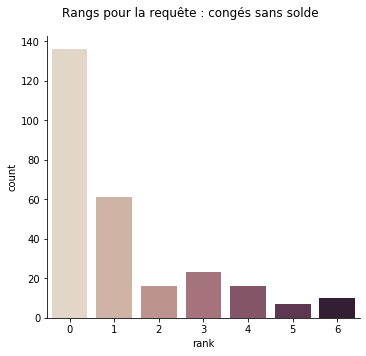

In [68]:
print_rangs('congés sans solde')

In [ ]:
pd.Series(list(filter(lambda x : x >=0, pd.DataFrame(logs)['rank'].values.tolist()))).describe()
sns.catplot(x="rank", kind="count", palette="ch:.25", data=pd.DataFrame(logs));

In [ ]:
actions[actions.idVisit == 67888]

In [ ]:
counts = df_searches['query'].apply(lambda x : str.lower(x)).value_counts()[1:].rename_axis('unique_values').reset_index(name='counts')
counts[counts.counts > 1].to_excel("most_popular_queries.xlsx")

In [ ]:
#in_search
actions[actions.idVisit == 66730]

In [ ]:
plot = sns.catplot(y="referrerTypeName", kind="count", palette="ch:.25", data=actions)#.set_title('Provenance des visites');
plt.subplots_adjust(top=0.9)
plot.fig.suptitle('Provenance des visites')



In [ ]:
plot = sns.catplot(y="type", kind="count", palette="ch:.25", data=actions, aspect=25.7/10.27, order=['visit', 'home', 'result_candidates', 'search', 'select_result', 'suggestion_candidates', 'select_suggestion', 'outlink', 'download', 'external_search', 'feedback']);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Types d'actions")


In [ ]:
actions[actions.type == 'search'].shape[0]

In [ ]:
visitLength = actions.groupby(["idVisit", "referrerTypeName"]).size().reset_index(name='countActions')

In [ ]:
visitLength[visitLength.countActions > 3]

In [ ]:
actions[actions.type == "select_suggestion"].prefix.apply(lambda x: len(x)).describe()


In [ ]:
actions.type.value_counts()

In [ ]:
result_candidates = actions[actions.type == "result_candidates"]
result_candidates[result_candidates["query"] != "undefined"].shape
#result_candidates["query"]

In [ ]:
actions.shape


In [ ]:
actions[actions.lastActionTimestamp == actions.lastActionTimestamp.max()]['timestamp']


In [ ]:
actions[actions.lastActionTimestamp == actions.lastActionTimestamp.min()]['timestamp']

In [ ]:
vl = visitLength[visitLength.countActions<30]

In [ ]:
#f, ax = plt.subplots(figsize=(20, 3))
#sns.set(rc={'figure.figsize':(11.1,80.0)})
plot = sns.catplot(x="countActions", kind="count", data=vl, aspect=20.7/8.27);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Nombre d'actions")

In [ ]:
visitLength[visitLength.countActions == 1].referrerTypeName.value_counts()


In [ ]:
visitLength[visitLength.countActions == 2].referrerTypeName.value_counts()



In [ ]:
cdt = actions[actions.type == "select_result"]
#cdt[cdt['query'] == "licenciement"].idVisit
cdt.shape


In [ ]:
visitLength[visitLength.countActions == 7]



In [ ]:
set(actions[actions.type=='select_result'][:20].idVisit.tolist())


In [ ]:
actions[actions.type=='select_suggestion'].sugg_selection.value_counts()[:20]



In [ ]:
actions.type.unique()


In [ ]:
# get id visits where contains at least a select search result or a select suggestion
actions[(actions.type == "select_result") | (actions.type == "select_suggestion")].idVisit.unique()

In [ ]:
actions.idVisit.unique().shape

In [ ]:
id_results = actions[actions.type == "result_candidates"].idVisit.unique()

In [ ]:
id_select = actions[actions.type == "select_result"].idVisit.unique()

In [ ]:
id_results[:10]

In [ ]:
id_select[:10]

In [ ]:
actions[actions.type == "select_result"].res_selection[:1]

In [ ]:
id_results.shape

## Suggestions

In [ ]:
# number of suggestions selection vs number of searches

In [ ]:
n_unique_suggestions = actions[(actions.type == "select_suggestion")][["sugg_selection", "idVisit", "type"]].drop_duplicates()


In [ ]:
# isolate unique searches (to avoid 'return to search')
n_unique_searches = actions[(actions.type == "search")][["query", "idVisit", "type"]].drop_duplicates()
# remove random to mark the positive suggestions and only get right number or non suggested
non_suggested = n_unique_searches[n_unique_suggestions.shape[0]:]
# TODO isolate actual searches without suggestion (not only the count)

In [ ]:
sugg_data = pd.concat([n_unique_suggestions, non_suggested])
sugg_data['Search type'] = sugg_data.type.apply(lambda x : 'Recherche suggérée' if x != 'search' else 'Recherche directe')
plot = sns.catplot(y="Search type", kind="count", palette="ch:.25", data=sugg_data);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Nombre de recherches directes & recherches suggérées")

In [ ]:
# prefix size

In [ ]:
prefix_size = pd.DataFrame(actions[actions.type=='select_suggestion'].prefix.apply(lambda x : len(x)))
prefix_size = prefix_size[prefix_size<50]
sns.catplot(x="prefix", kind="violin", data=prefix_size);
plt.subplots_adjust(top=0.8)
plot.fig.suptitle("Longueur du prefix de suggestion.")

## Results selection : check number of : pre-qualified / semantic / fulltext

In [ ]:
def get_type(element, keyword='url'):
    #parsed = json.loads(element)
    if 'algo' in element:
        return element['algo']
    elif element[keyword].startswith('http'):
        return 'http'
    else:
        # special case for theme search
        t = element[keyword][1:element[keyword].rfind('/')]
        if t == 'fiche-service-public' or t == 'fiche-ministere-travail' :
            return 'theme'
        else:
            return t
        
select_actions = actions[(actions.type == "select_result") & (actions.query != "undefined")]
selection_types = select_actions.res_selection.apply(lambda e : get_type(e))

In [ ]:
st_df = pd.DataFrame({'selection_type':selection_types})
st_df["search_engine"] = st_df['selection_type'].apply(lambda x : 'search engine' if x in ['fulltext', 'both', 'semantic'] else x)

plot = sns.catplot(y='selection_type', kind="count", data=st_df, order=['both', 'fulltext', 'semantic']);
                    #order=['pre-qualified', 'search engine'])

plt.subplots_adjust(top=0.9)
#plot.fig.suptitle("Répartition des selections pre-qualified / moteur de recherche.")
plot.fig.suptitle("Répartition des sélections des résultats du moteur de recherche.")

## Number of results in candidates for each type

In [ ]:
def read_candidates(cands):
    docs = cands['documents']
    themes = cands['themes']
    
    doc_types = [get_type(d, 'slug') for d in docs]
    theme_types = [get_type(t, 'slug') for t in themes]
    
    preq = 'pre-qualified' in doc_types
    n_docs = len(doc_types)
    
    return [preq, n_docs, doc_types, theme_types]
    
result_candidates_all = actions[actions.type == "result_candidates"]    
result_candidates = result_candidates_all[result_candidates_all['query'] != 'undefined']
parsed_candidates = result_candidates['result_candidates'].apply(lambda cands : read_candidates(cands))


In [ ]:
result_candidates_all.shape
result_candidates.shape

In [ ]:
parsed_candidates_df = pd.DataFrame(parsed_candidates.tolist(), columns = ['isPreq', 'nDoc', 'doc_types', 'theme_types'])

In [ ]:
parsed_candidates_df[parsed_candidates_df.theme_types.apply(lambda n : len(n)) == 0].shape

In [ ]:
parsed_candidates_df.isPreq

plot = sns.catplot(y="isPreq", kind="count", palette="ch:.25", data=parsed_candidates_df);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Proportion de recherches prequalifiées")

In [ ]:
#actions[actions.type == "result_candidates"][['type', 'query', 'result_candidates']][:30]

In [ ]:
preq_length = parsed_candidates_df[parsed_candidates_df.isPreq].doc_types.apply(lambda x : len(x))

In [ ]:
preq_length_df = pd.DataFrame({'pre-qualified-n-results':preq_length})

In [ ]:
plot = sns.catplot(x="pre-qualified-n-results", kind="violin", data=preq_length_df, aspect=18.7/8.27);
plt.subplots_adjust(top=0.8)
plot.fig.suptitle("Nombre de résultats pour les recherches préqualifiées.")

## check number of results with less than X results

## check feedback

In [ ]:
actions[actions.type == 'feedback']
plot = sns.catplot(y="feedback_type", kind="count", palette="ch:.25", data=actions[actions.type == 'feedback'], aspect=5.7/3.27);
plt.subplots_adjust(top=0.9)
plot.fig.suptitle("Retours explicites des utilisateurs.")

In [ ]:
neg_visits = actions[actions.feedback_type == 'negative'].idVisit.unique()
actions[actions.idVisit == neg_visits[32]]

## get most frequent queries (more than 3) to add to suggestions

In [ ]:
n_unique_searches['query'].apply(lambda x: x.lower()).value_counts()[:30]

# Print ranks for most frequent suggestion selected

In [ ]:
for e in actions[actions.type=='select_suggestion'].sugg_selection.value_counts()[:50].index.tolist():
    print_rangs(e)

In [ ]:
print_rangs("rupture à l'amiable")

In [ ]:
# most frequent queries without hit
for g, rows in df_searches[df_searches['rank'] == -1].groupby(["query"]):
    n = rows.shape[0]
    if (n > 10):
        print(f'{g} -> {n}')

In [ ]:
df_searches.groupby(["query"])

In [ ]:
# test : 
# reordonner les resultats DF de maniere factice et comparer la difference entre les scores

In [ ]:
import requests

params = {
    "y_pred" : ["b", "a", "c", "w", "k","e"], # y_pred (array): list of documents id predicted by the system
    "y_true" : ["a", "b", "c", "e"], # y_true (array): documents id scored by humans sorted from most relevant to least relevant
    "y_score" : {
        "a":15,
        "b":3,
        "c":2,
        "e":2
            }, # y_score is a dict {"doc_id":"score"} of documents assigned as relevant y humans with the associated scores (ordered internally)
    "method" : "all", # one of ["precision", "recall", "dcg", "mrr", "all"]
    "k": 4 # k integer preferaly =< to length(y_pred)
}

r = requests.post("http://localhost:4545/api/score", json = params)
r.json()

# Synthèse Catherine

In [ ]:
actions.idVisit.unique().shape

In [ ]:
actions.timestamp[:2]

In [ ]:
actions[(actions.timestamp > datetime.datetime(2020, 1, 27)) & (actions.timestamp < datetime.datetime(2020, 2, 1))].idVisit.unique().shape

In [ ]:
import datetime

x = datetime.datetime(2020, 1, 27)

actions_before = actions[actions.timestamp < x]

In [ ]:
actions_before.timeSpent

In [ ]:
def run_stats(data):
    visitesUniques = data.idVisit.unique()
    print(f"Visites uniques : {visitesUniques.shape[0]}")
    visitLength = data.groupby(["idVisit", "referrerTypeName"]).size().reset_index(name='countActions')
    survol = visitLength[visitLength.countActions == 1].shape[0] / visitLength.shape[0]
    print(f"Visites survolées : {survol}")
    print(f"Actions par visite : {visitLength.countActions.mean()}")
    print(f"Téléchargements : {data[data.type == 'download'].shape[0]}")
    unique_queries = []
    for (g,r) in data[data.type == 'search'].groupby(["idVisit", "query"]):
        unique_queries.append(g[1].lower())
    print(pd.Series(unique_queries).value_counts()[0:30])

In [ ]:
run_stats(actions)

In [ ]:
actions.type.unique()

In [ ]:
visitLength = actions_before.groupby(["idVisit", "referrerTypeName"]).size().reset_index(name='countActions')

visitLength[visitLength.countActions > 1].countActions.mean()

In [ ]:
#actions_before['query'].apply(lambda x : str(x).lower()).value_counts()[:32]


In [ ]:
actions[actions.type == 'visit_content'].shape